Units used: GeV for masses, s for time, cm for distances

In [1]:
import os
import glob
import importlib

import matplotlib as mlib
import matplotlib.pyplot as plt

# plt.rcParams["text.usetex"] = True
# plt.rcParams["text.latex.preamble"] = r"\usepackage{slashed}"

import numpy as np
from numpy import genfromtxt
from numpy import loadtxt
import re
import csv
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import matplotlib.lines as mlines


import sys
sys.path.insert(1, '/home/stasya/prj/alps-running/TdAlps-Internal/')
os.system('git -C /home/stasya/prj/alps-running/TdAlps-Internal/ fetch;\
git -C /home/stasya/prj/alps-running/TdAlps-Internal/ status')
import TdAlps
from collections import OrderedDict

import scipy
import scipy.integrate as integrate
import scipy.optimize as optimize

import csv

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [2]:
#Plotting settings

font = {
        'weight' : 'normal',
        'size'   : 16}

mlib.rc('font', **font)

In [3]:
def importNotebook(name):
    
    currentDir=os.getcwd()
    notebookDir=os.path.dirname(name)
    os.chdir(notebookDir)
    os.system('git fetch; git status')
    notebookName=os.path.basename(name).split('.')[0]
    module = importlib.import_module(f"ipynb.fs.full.{notebookName}")
    
    os.chdir(currentDir)
    
    globals().update(vars(module))

In [4]:
importNotebook("/home/stasya/prj/alps/Python/ALPs_base.ipynb")

On branch main
Your branch is behind 'origin/main' by 6 commits, and can be fast-forwarded.
  (use "git pull" to update your local branch)

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	ALPs_BRs-check.ipynb
	ALPs_wip-Nastya.ipynb

nothing added to commit but untracked files present (use "git add" to track)


From github.com:rrschaefer/alps
   257b857..83f507c  main       -> origin/main


On branch main
Your branch is behind 'origin/main' by 6 commits, and can be fast-forwarded.
  (use "git pull" to update your local branch)

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	ALPs_BRs-check.ipynb
	ALPs_wip-Nastya.ipynb

nothing added to commit but untracked files present (use "git add" to track)


/home/stasya/prj/alps/Python/ALPs_base.ipynb:642: ComplexWarning: Casting complex values to real discards the imaginary part
  "\n",
/home/stasya/prj/alps/Python/ALPs_base.ipynb:682: ComplexWarning: Casting complex values to real discards the imaginary part
  "    return float(gamma)\n",
/home/stasya/prj/alps/Python/ALPs_base.ipynb:695: ComplexWarning: Casting complex values to real discards the imaginary part
  "    alphaEM = readAlphaEM(coeffs)\n",
/home/stasya/prj/alps/Python/ALPs_base.ipynb:669: ComplexWarning: Casting complex values to real discards the imaginary part
  {


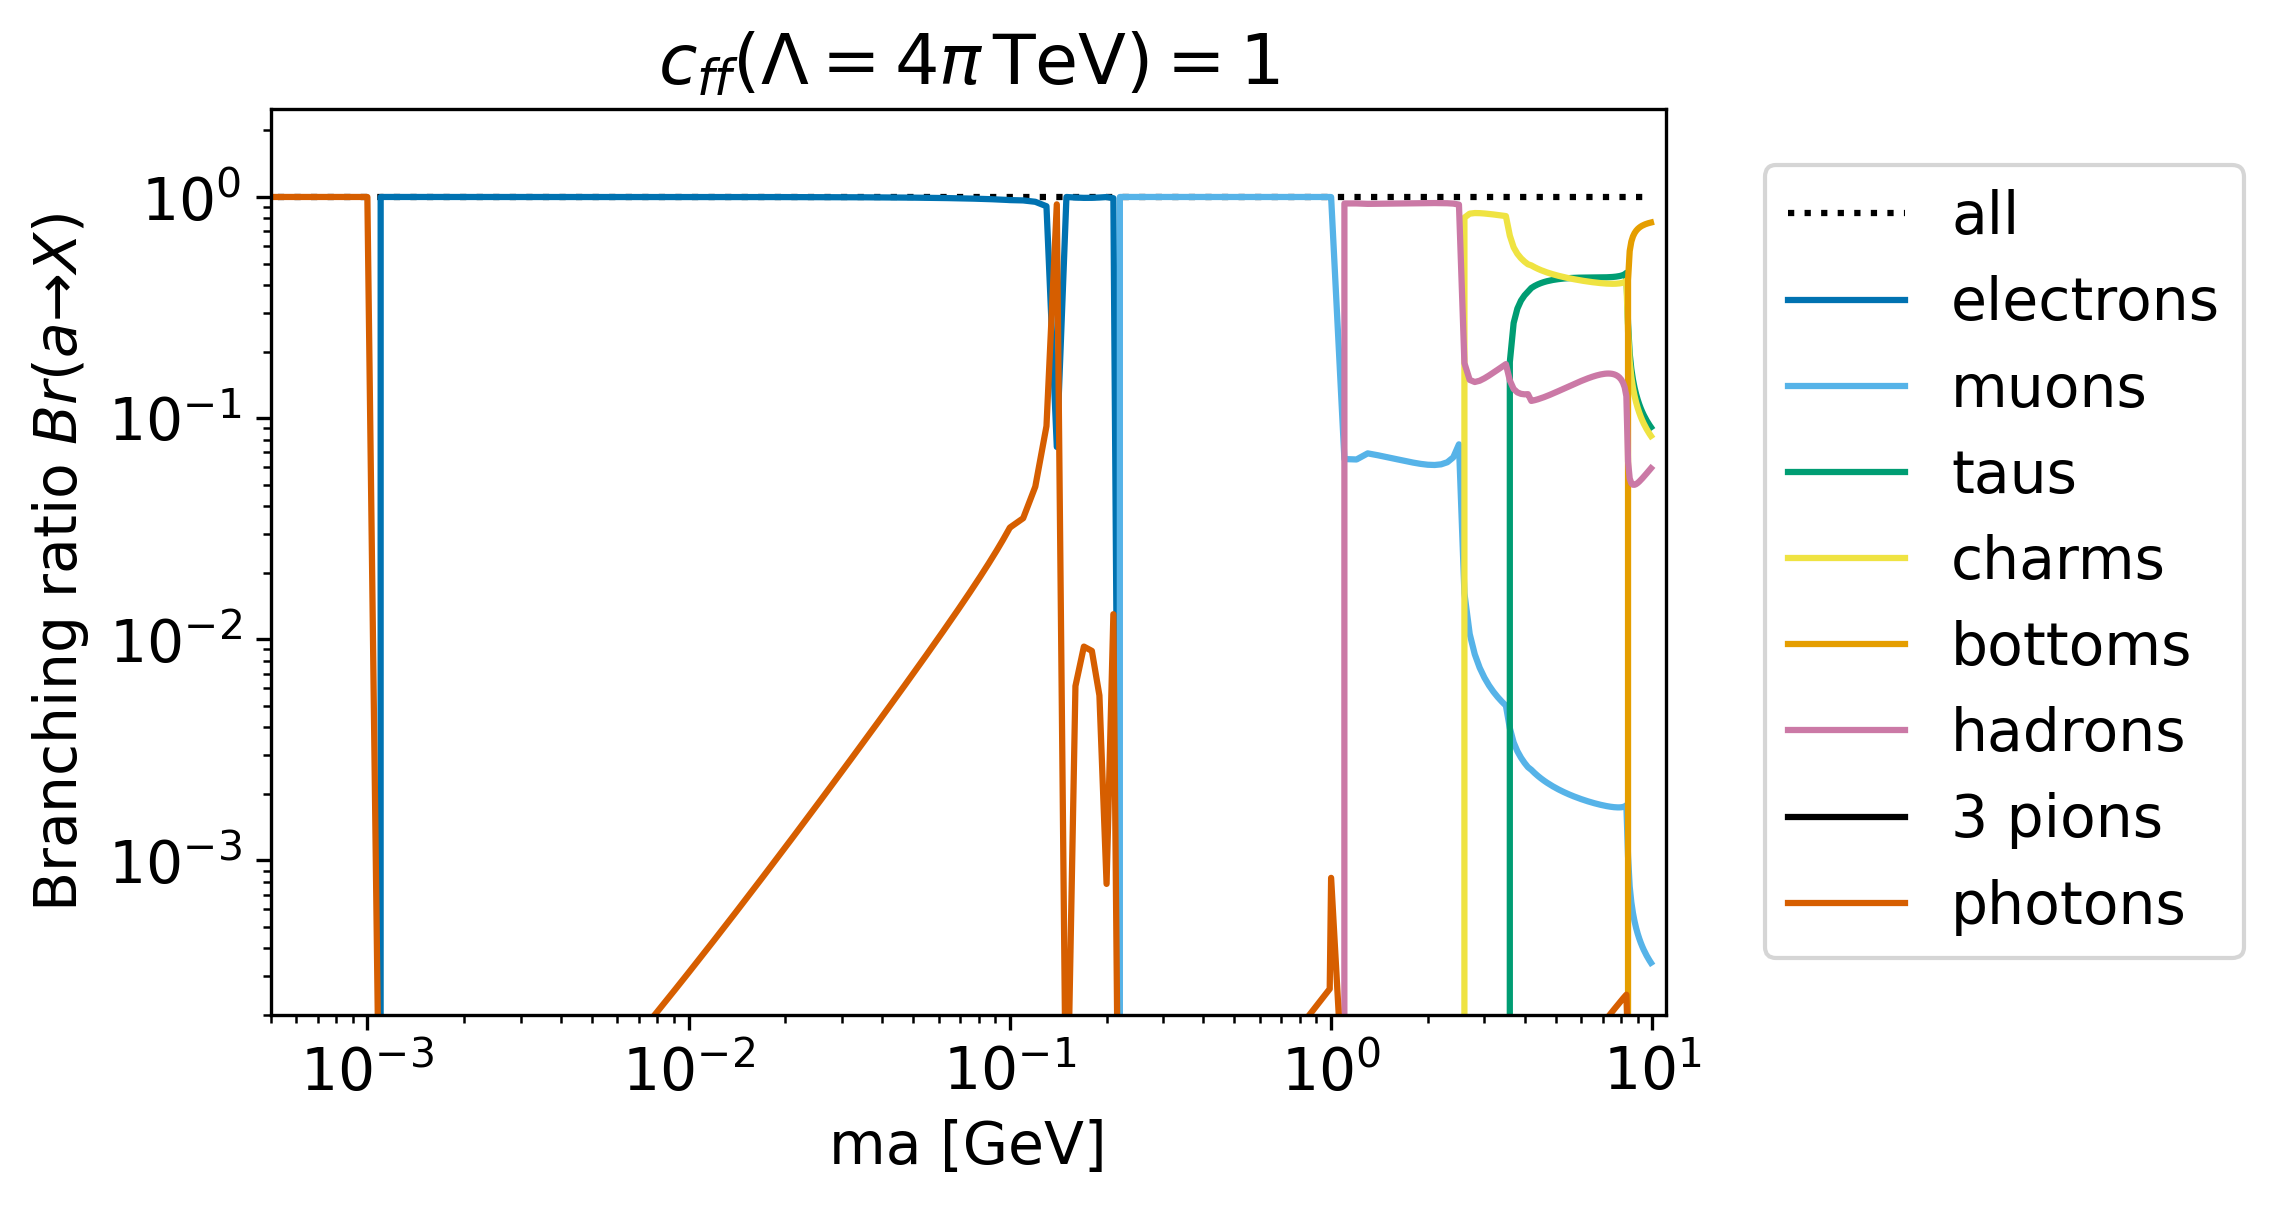

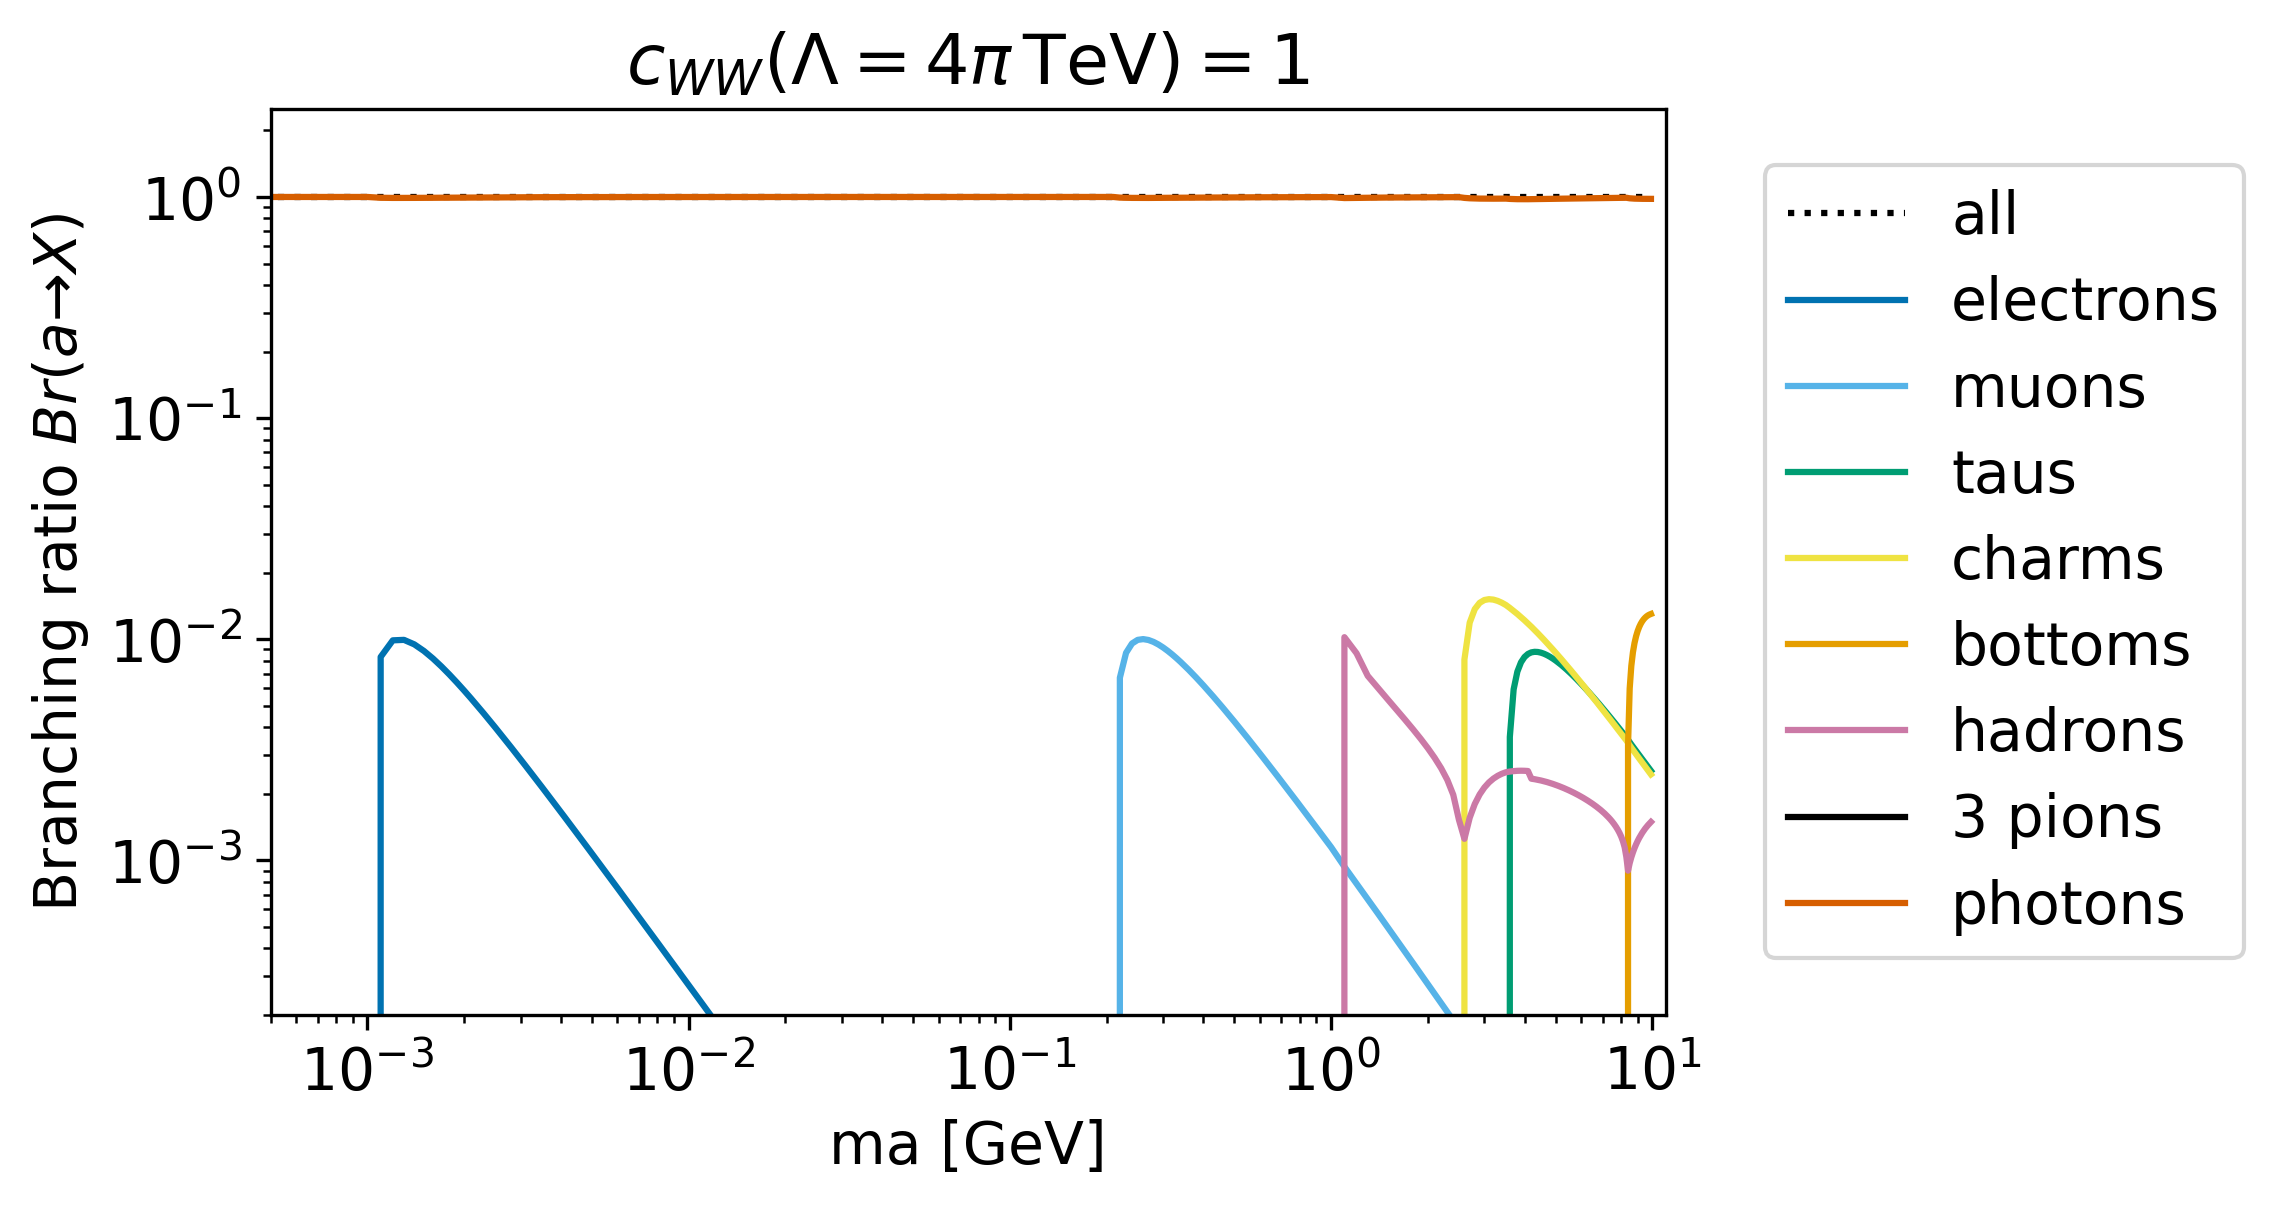

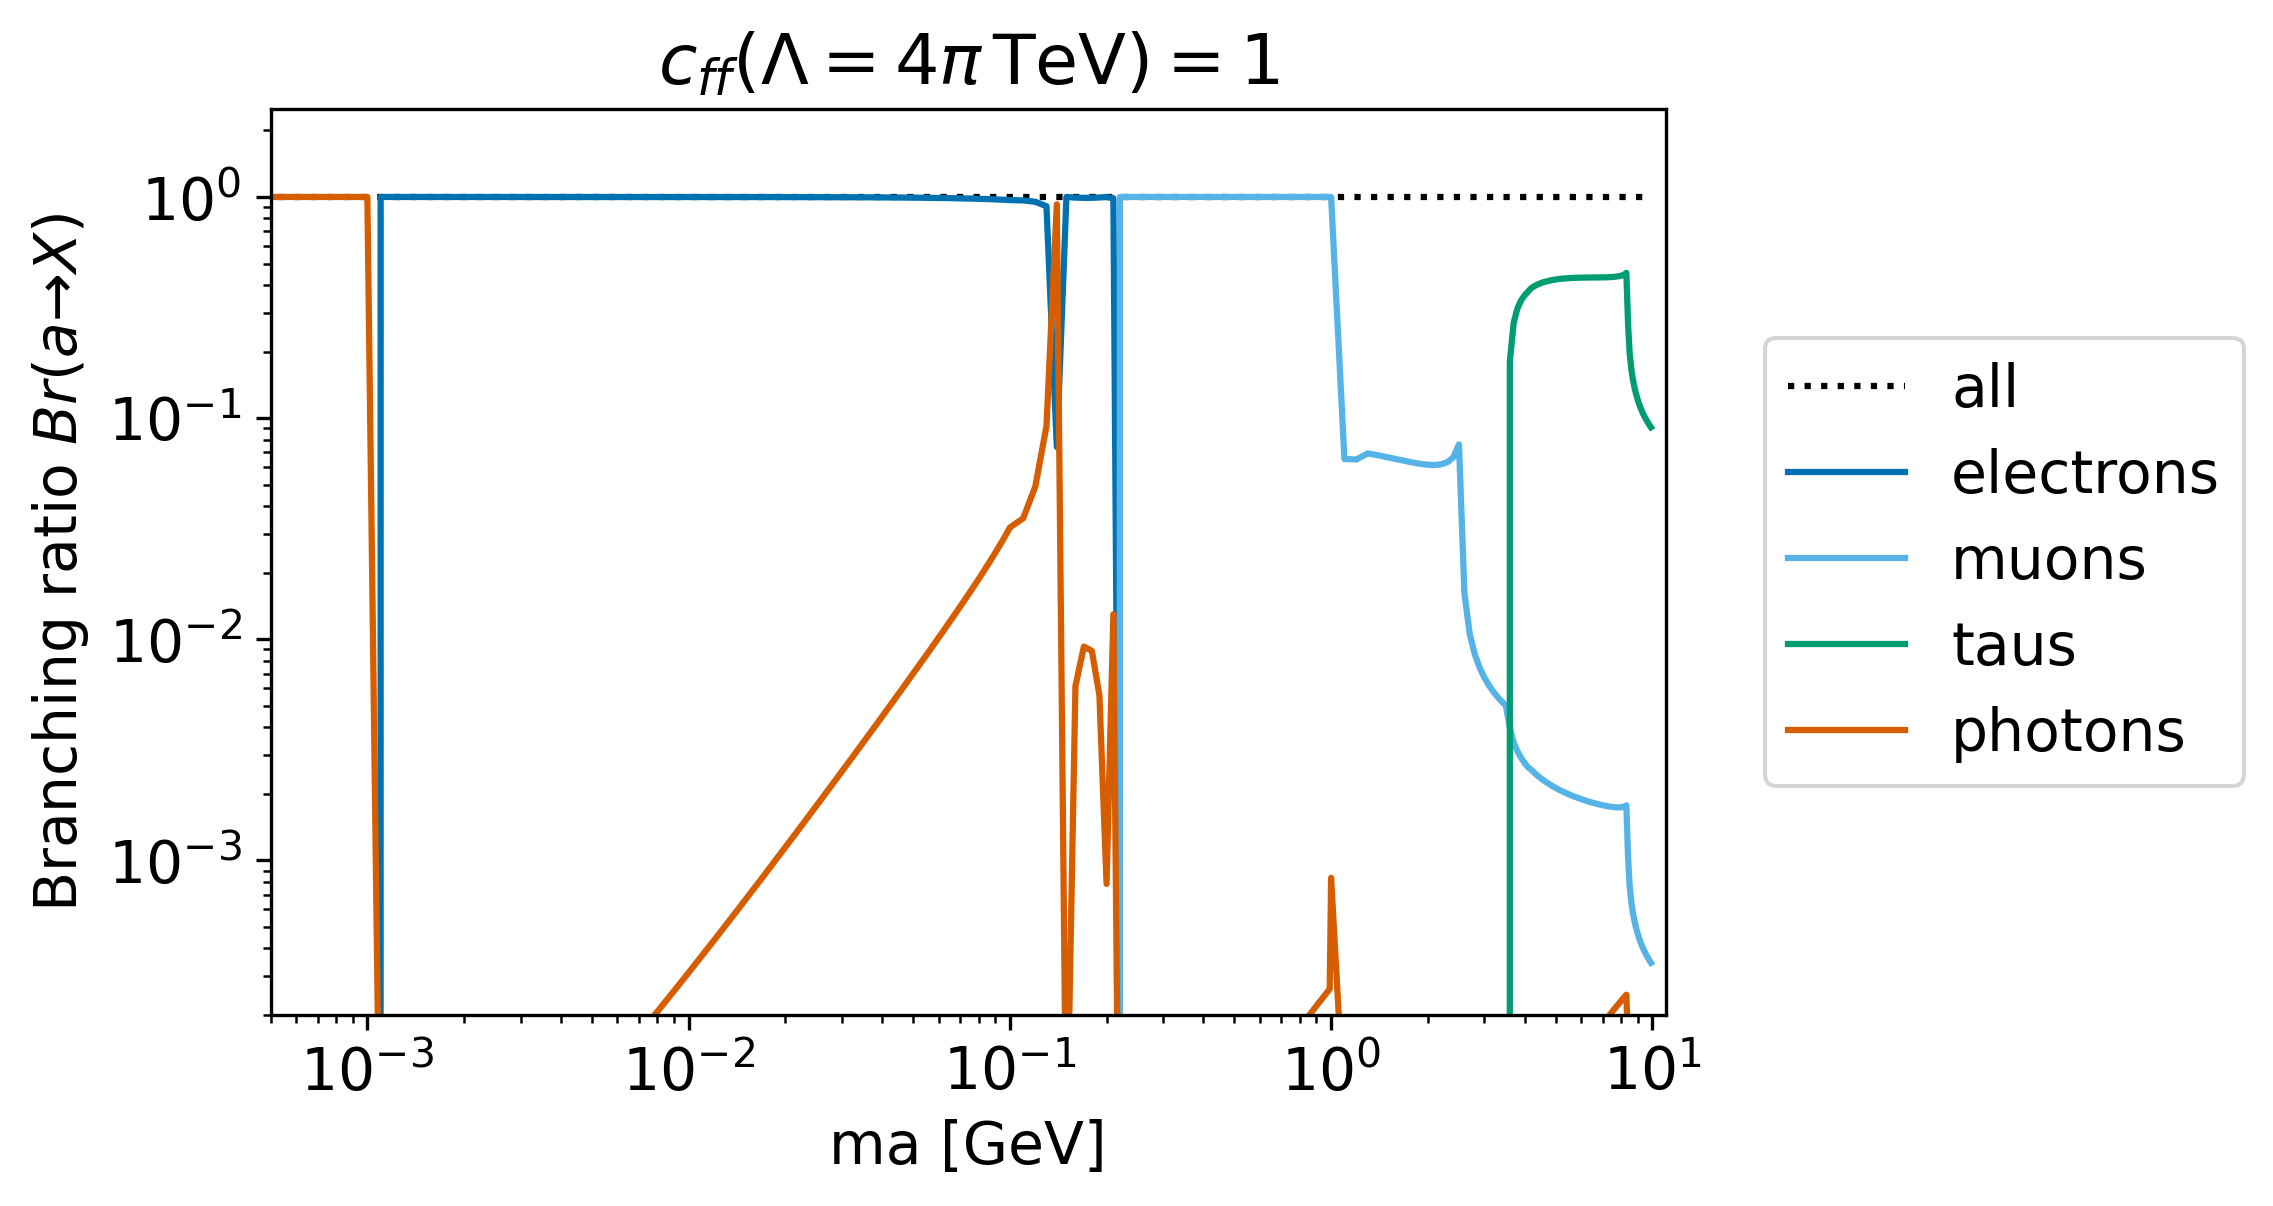

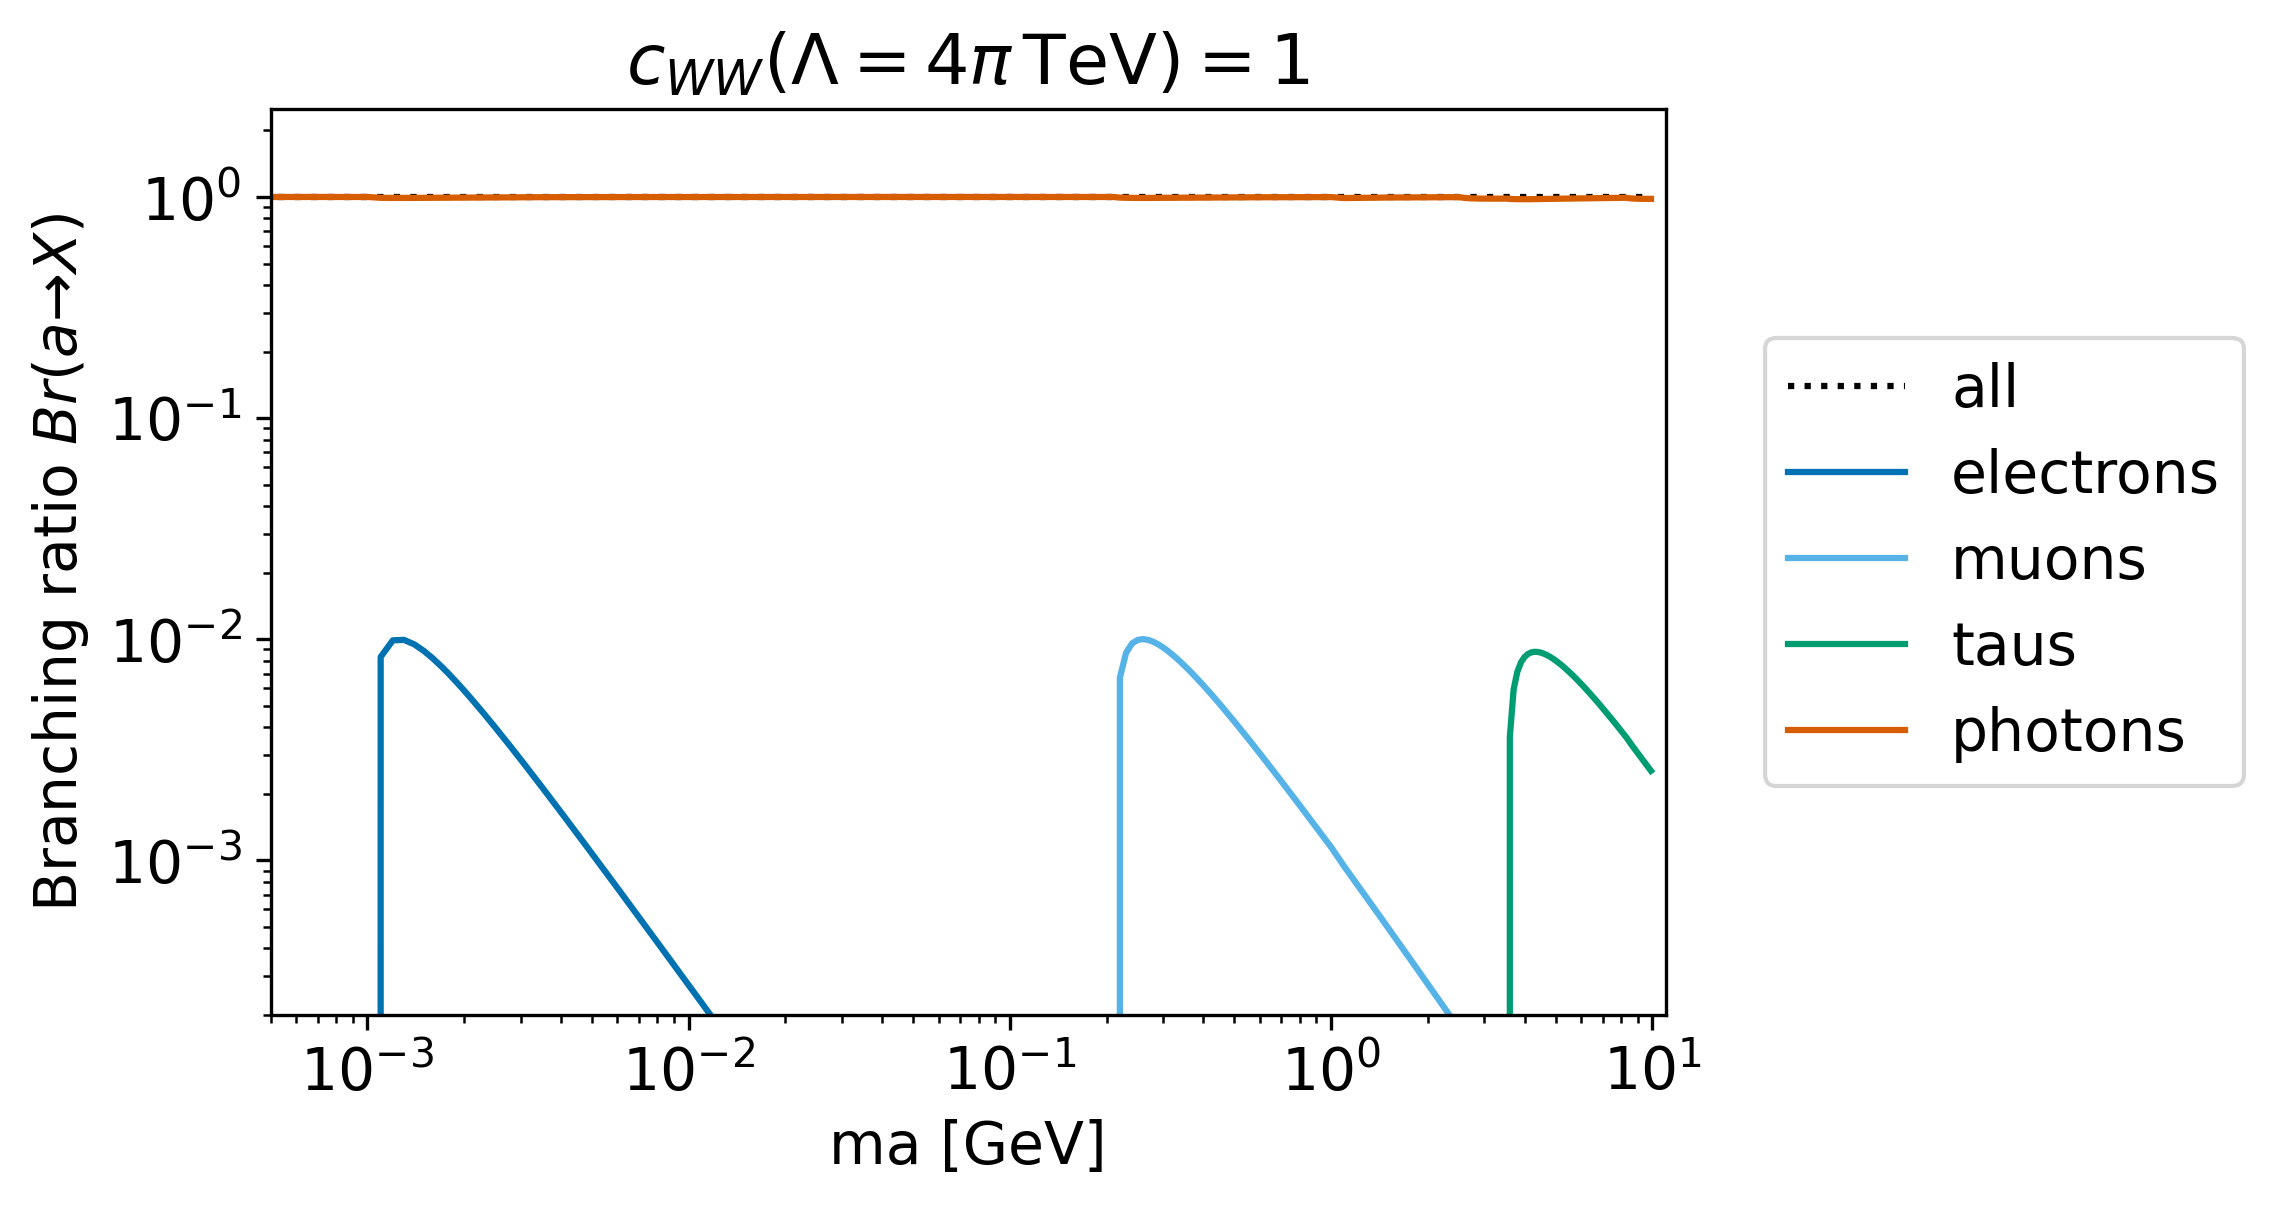

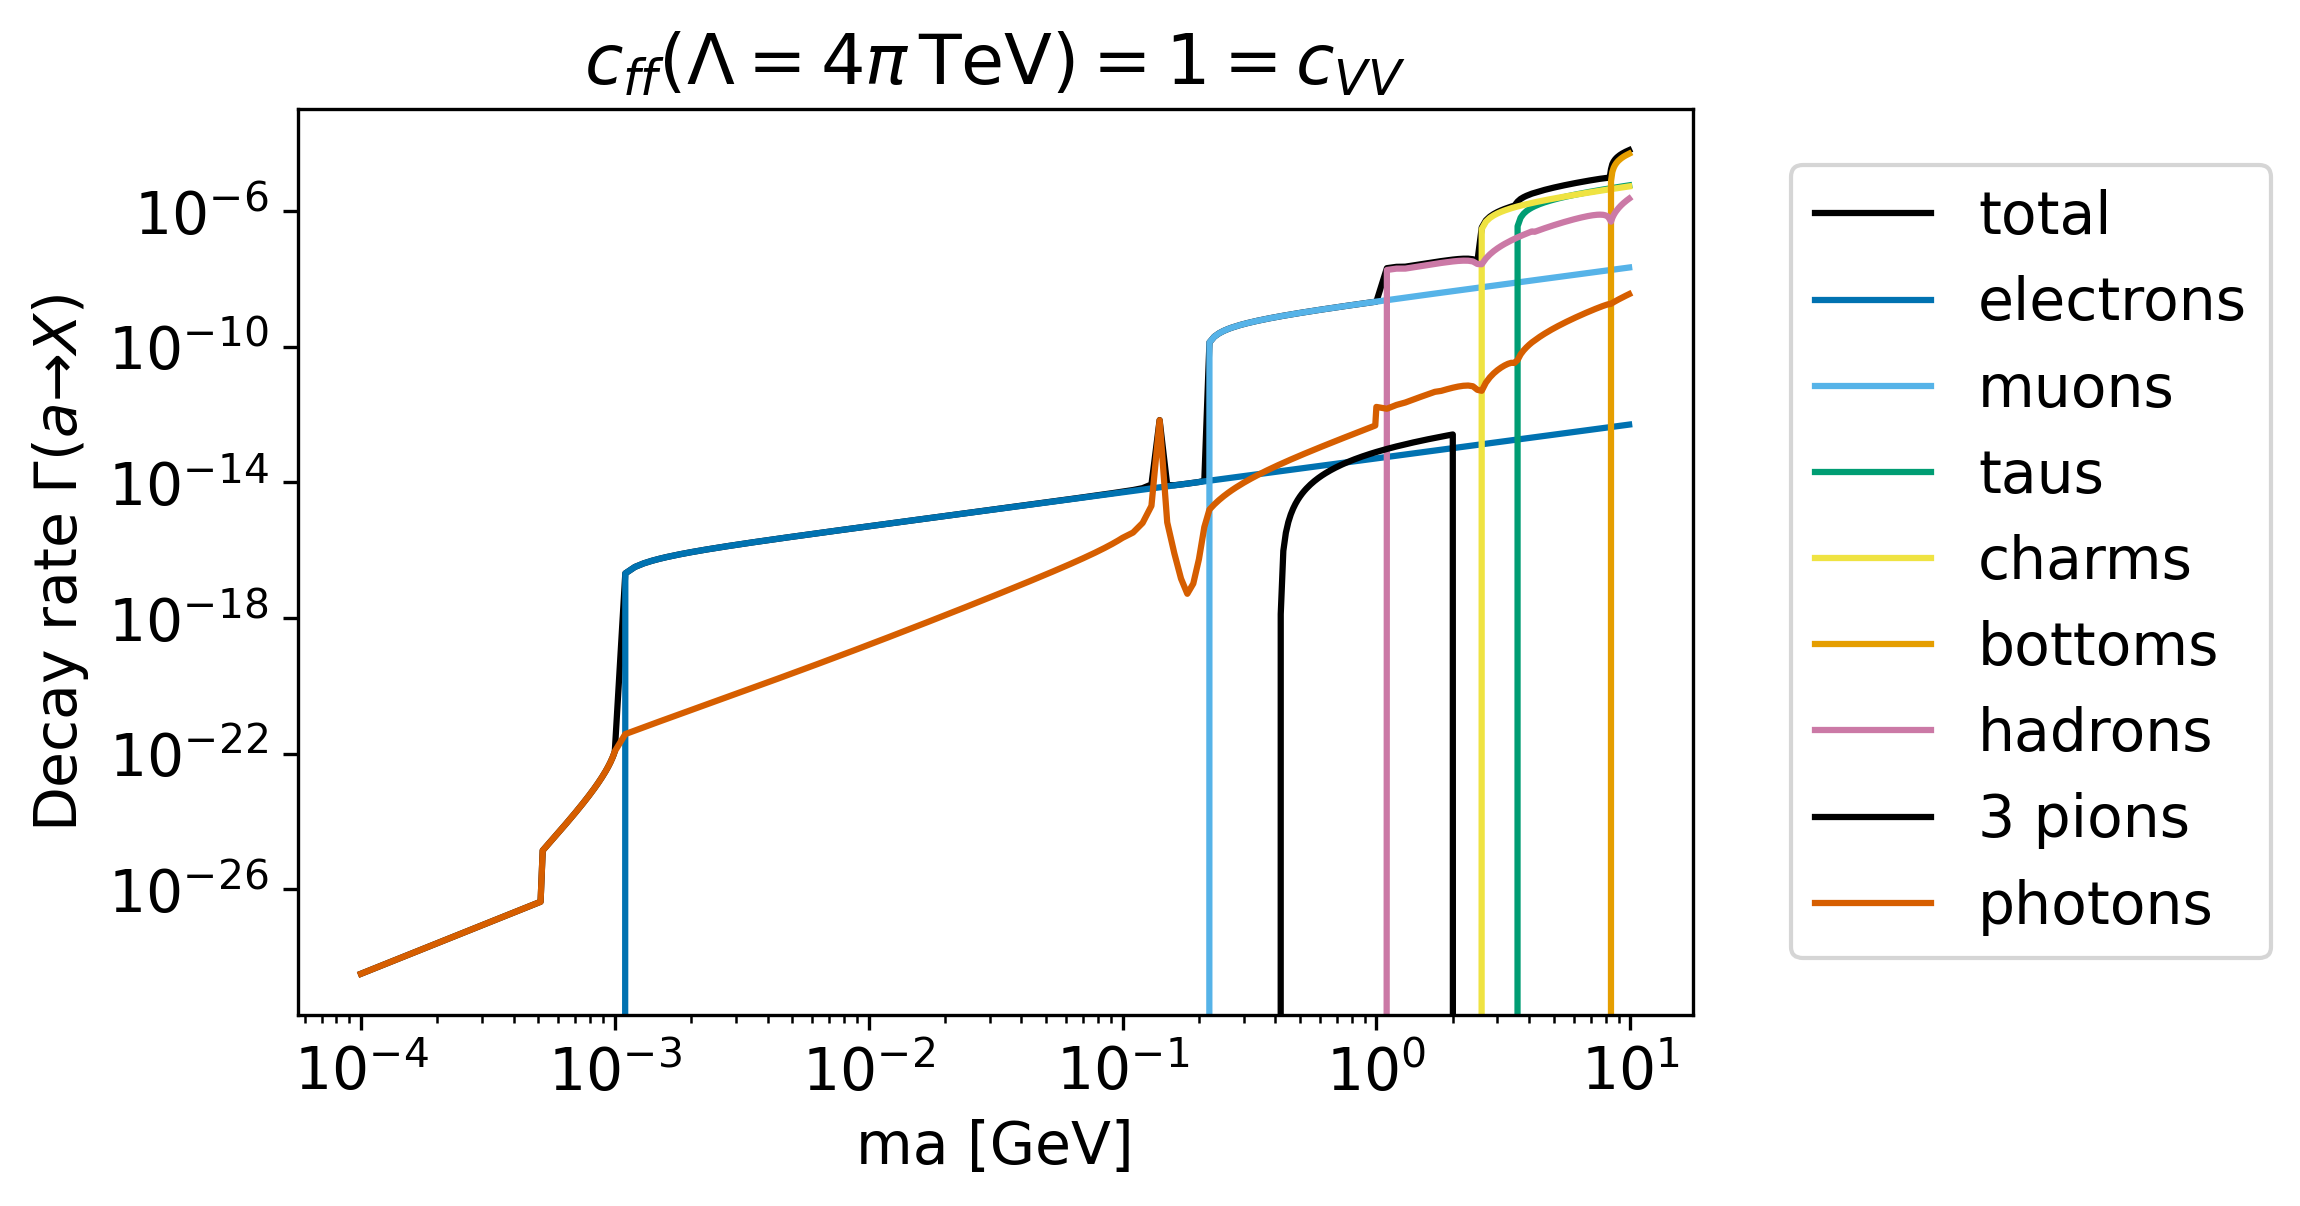

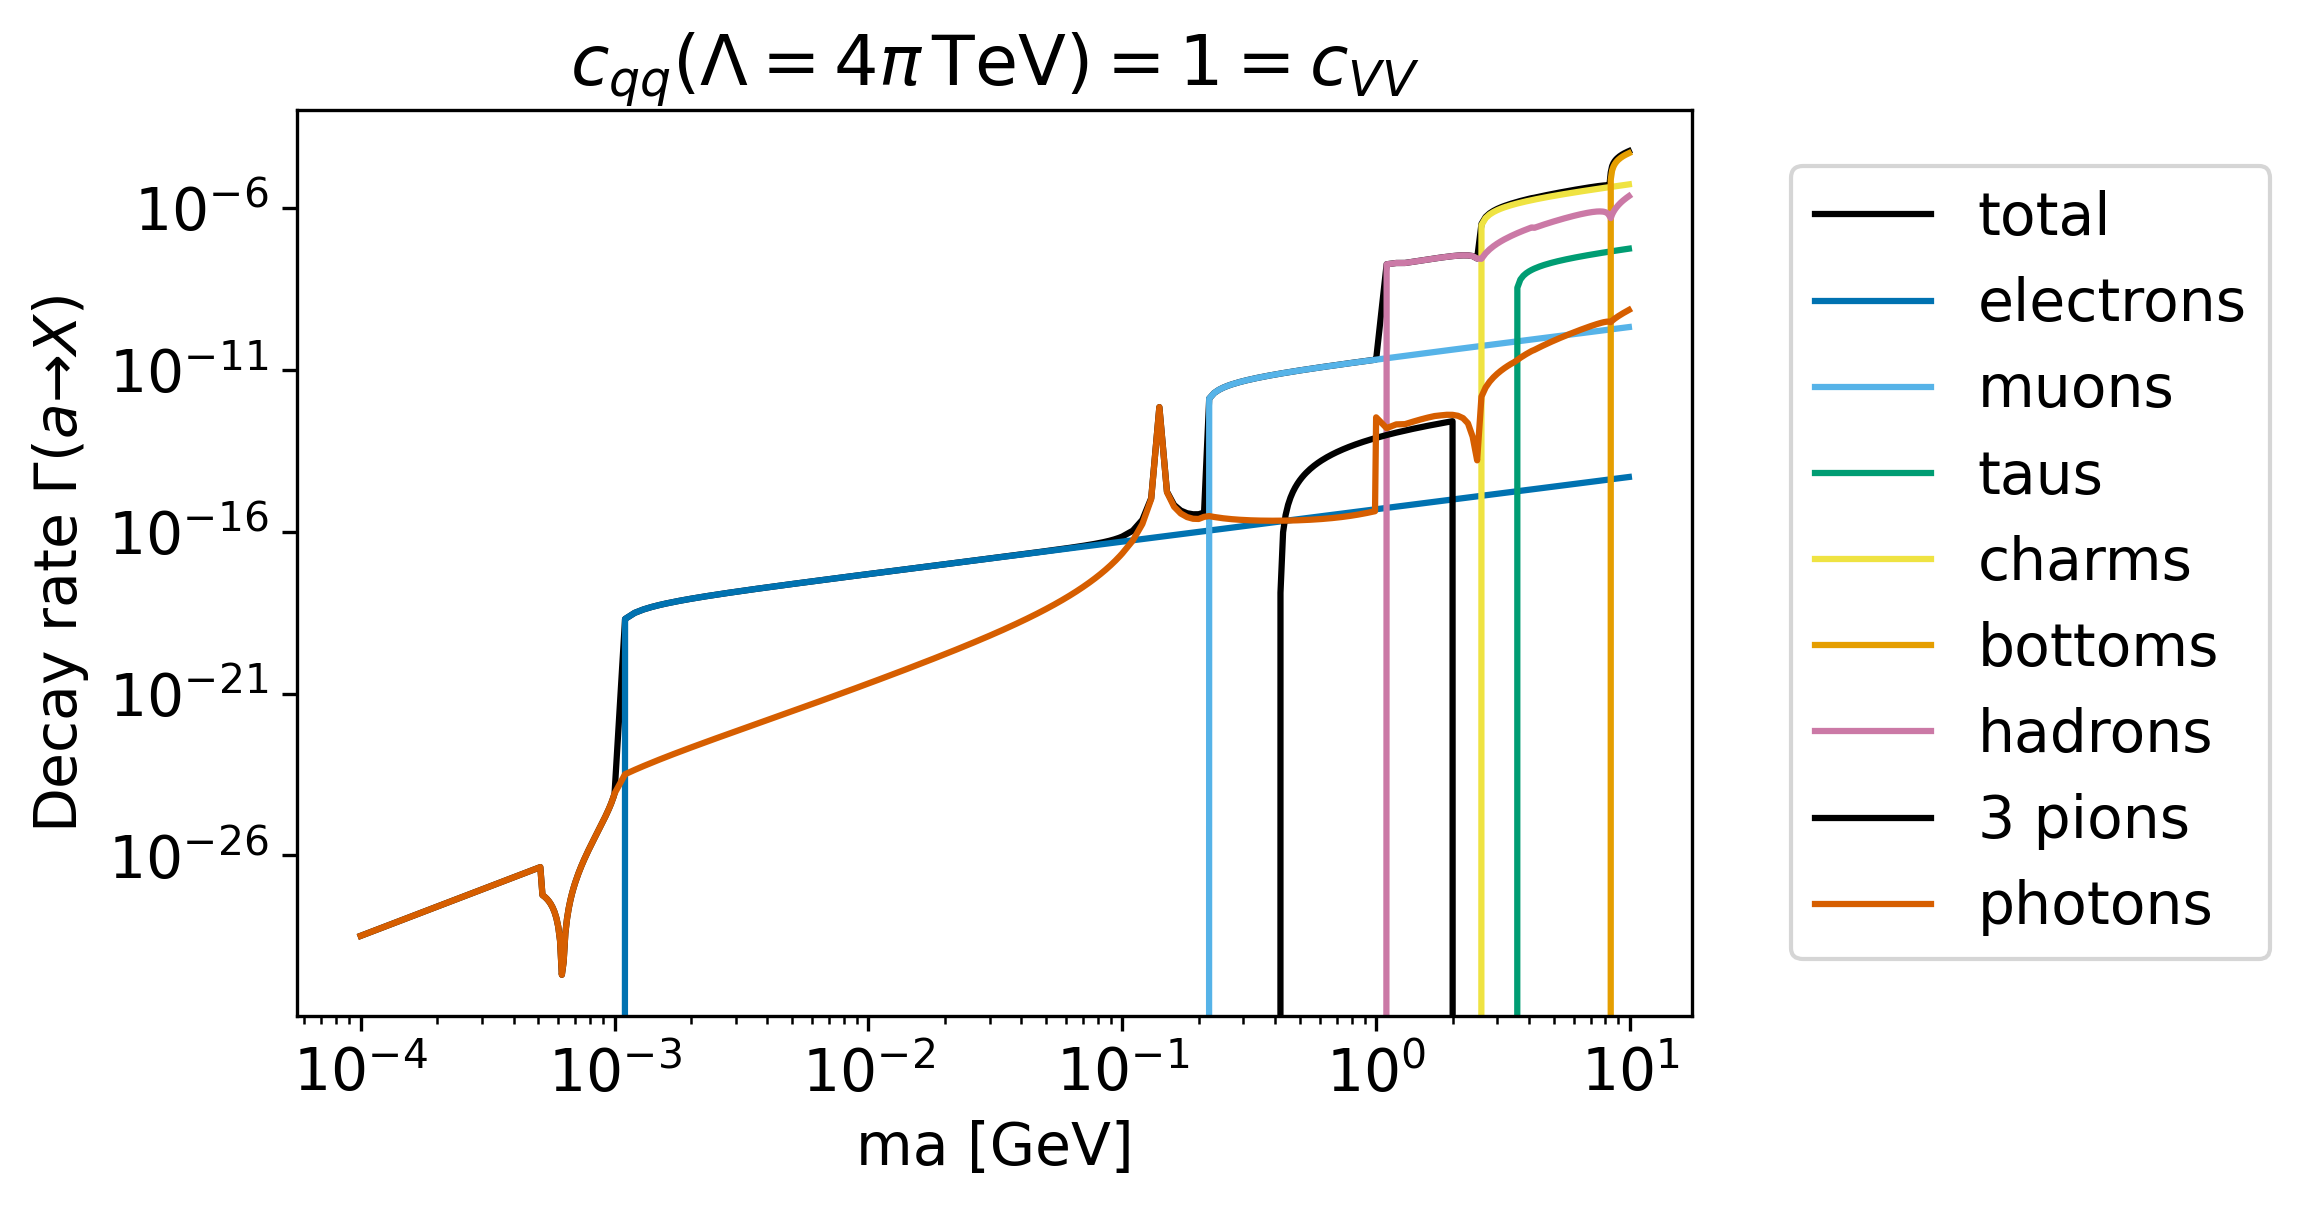

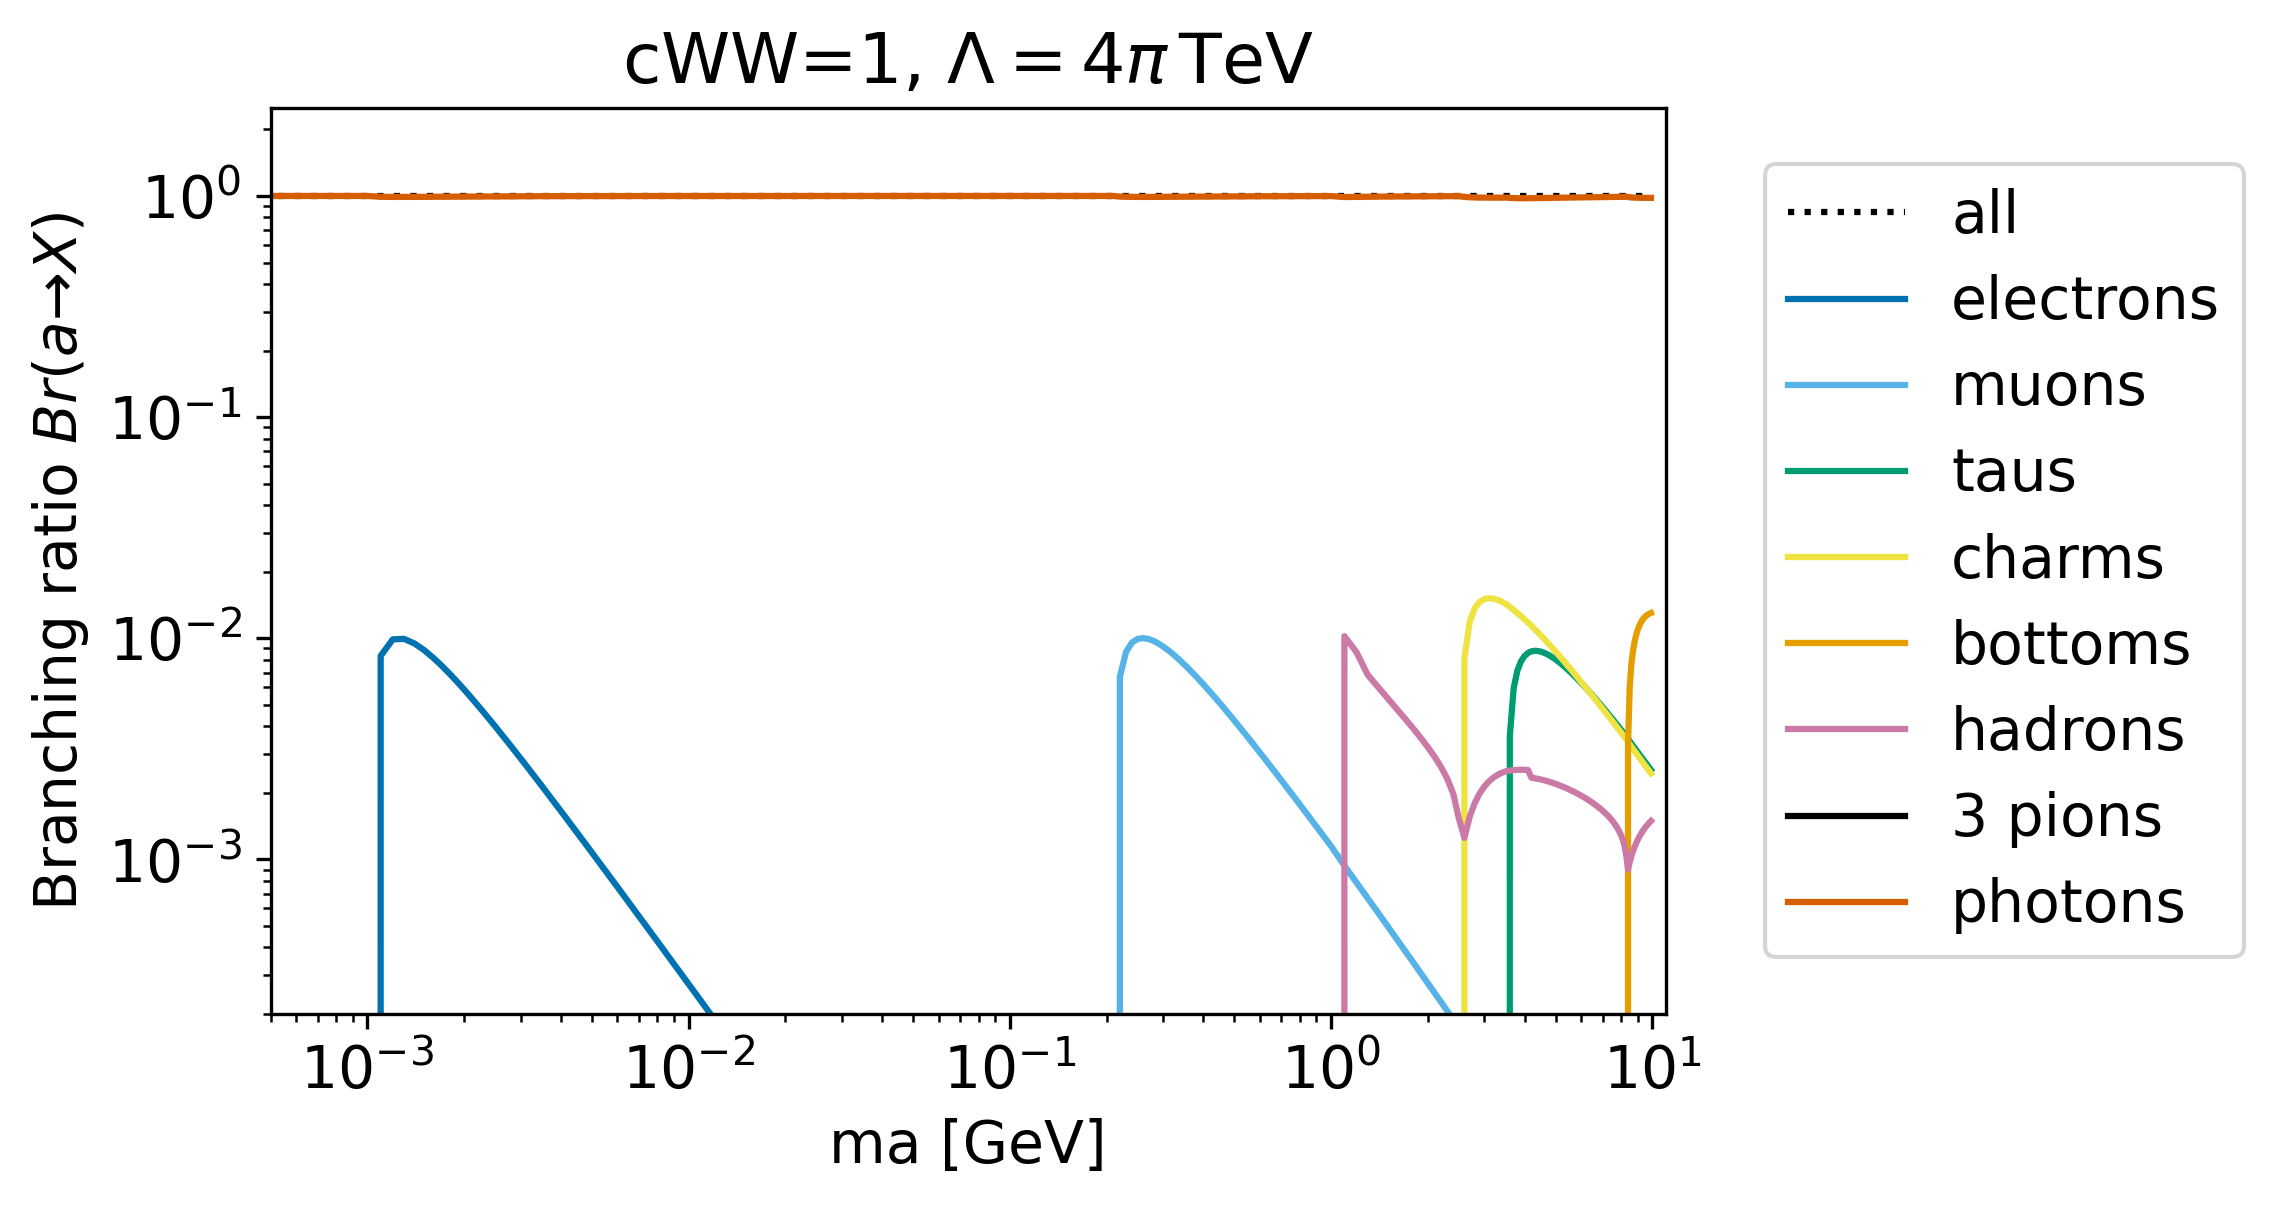

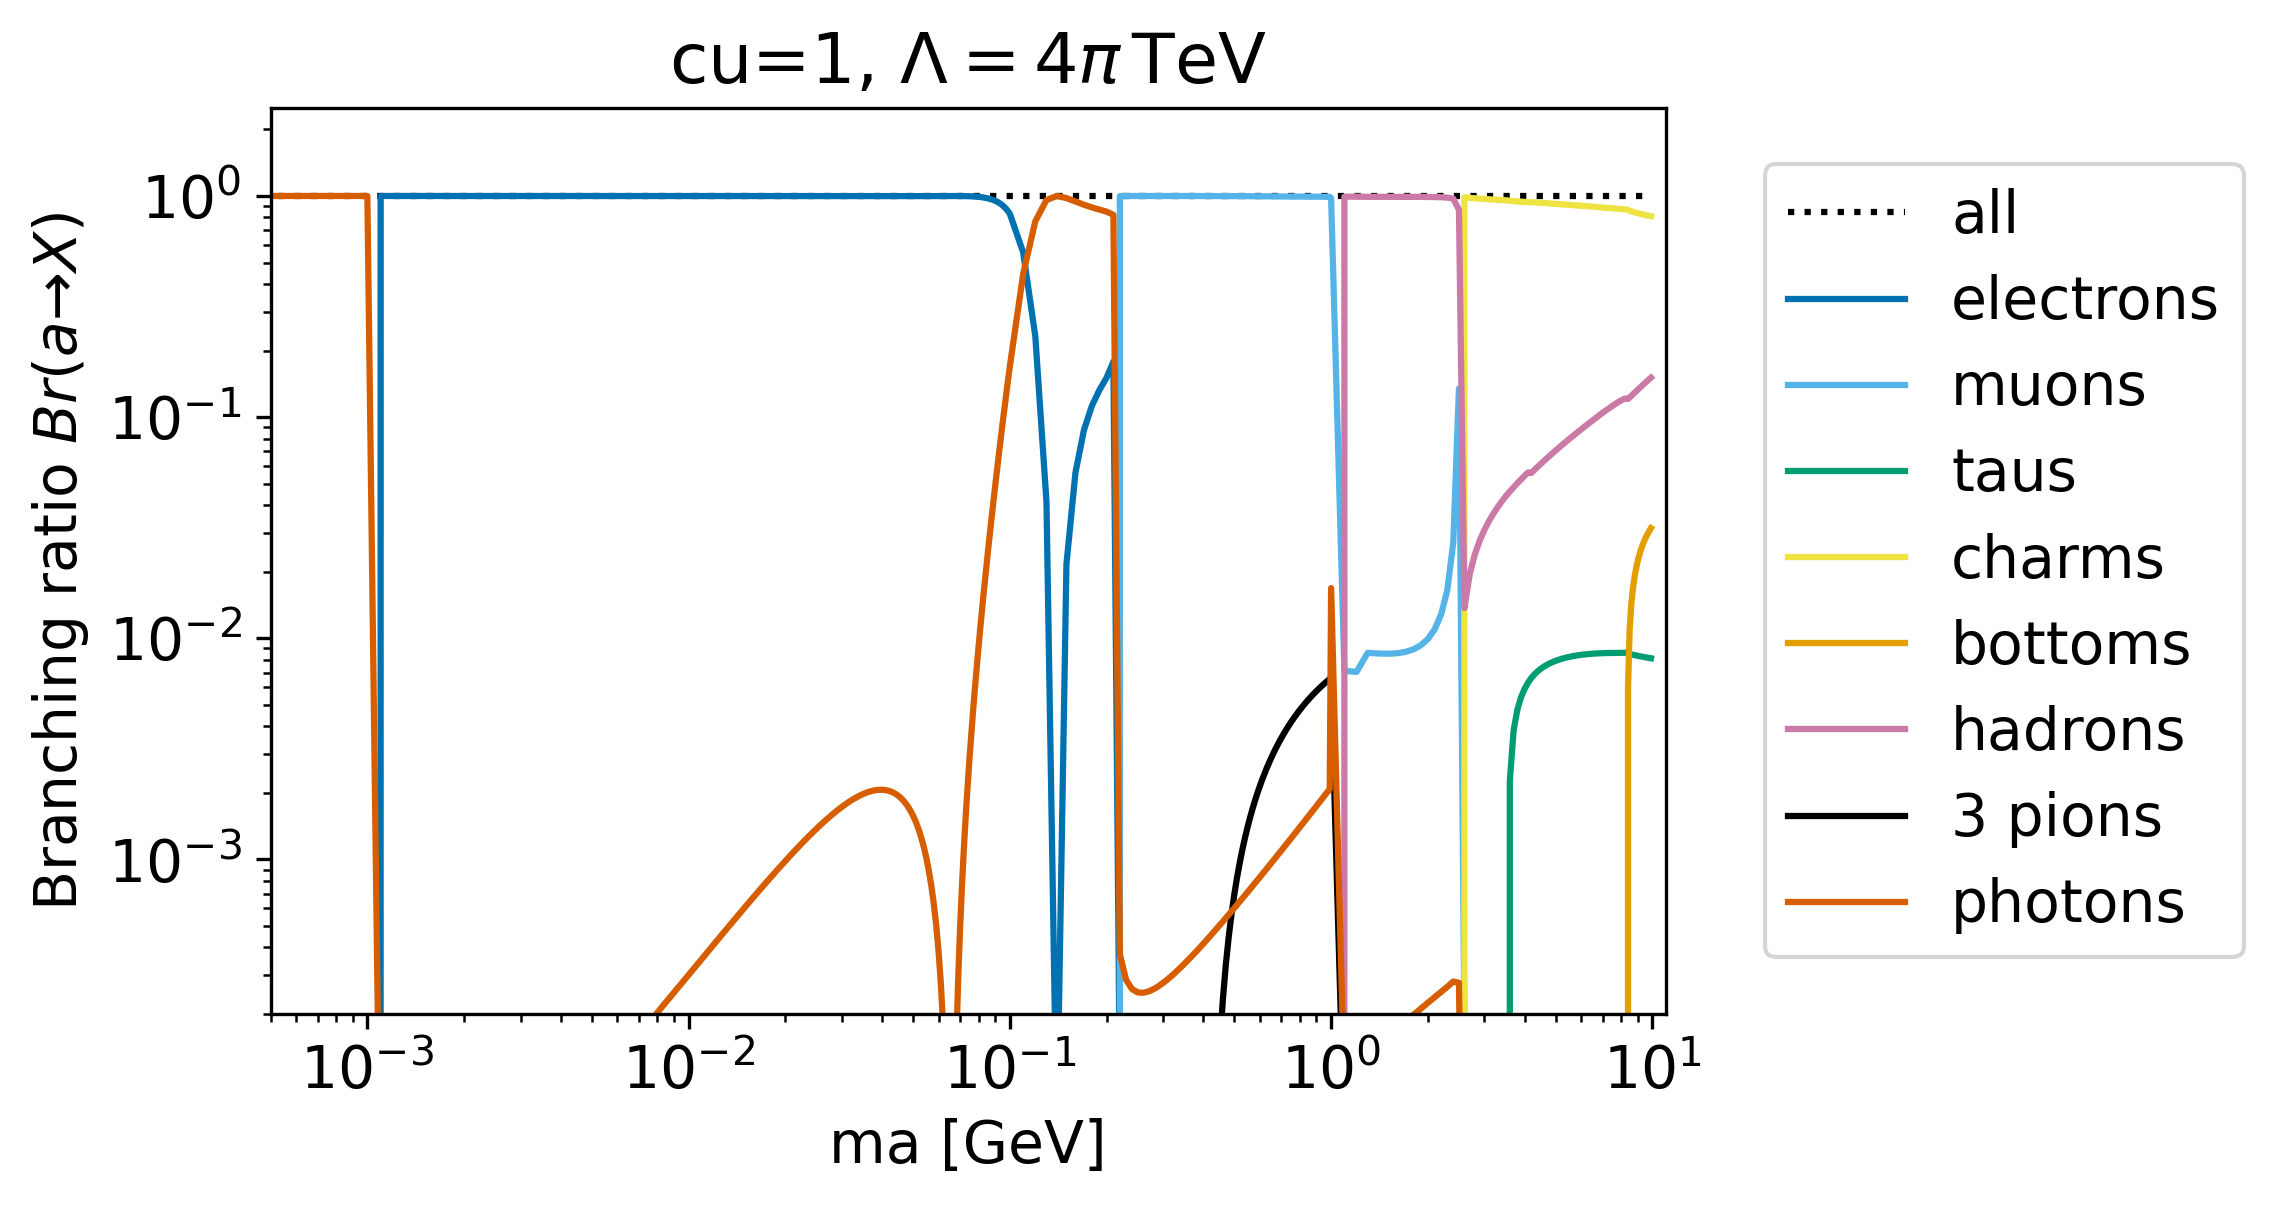

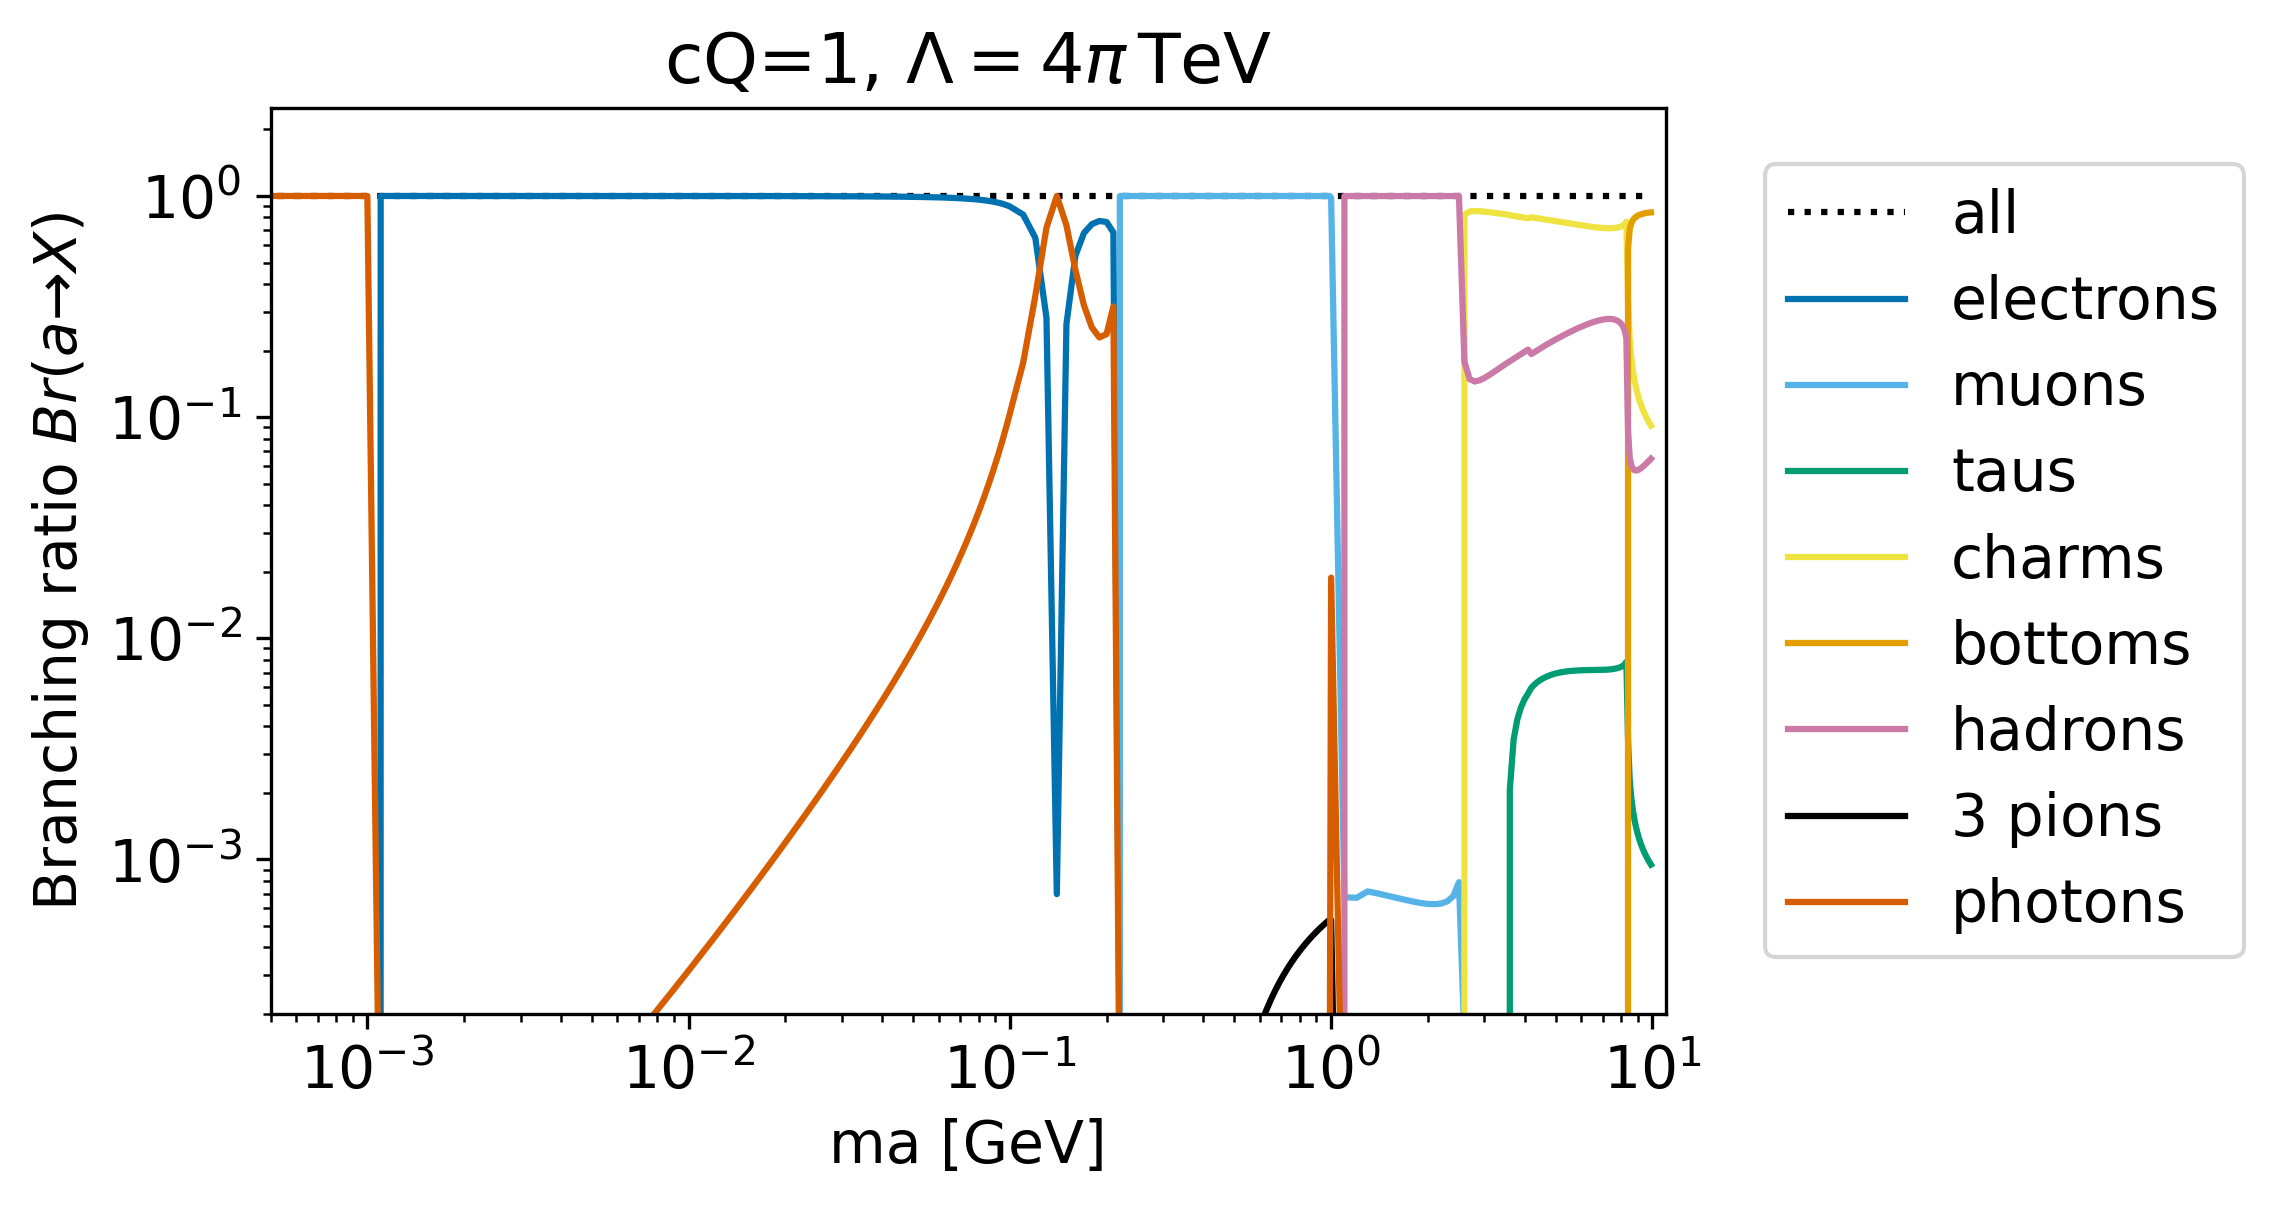

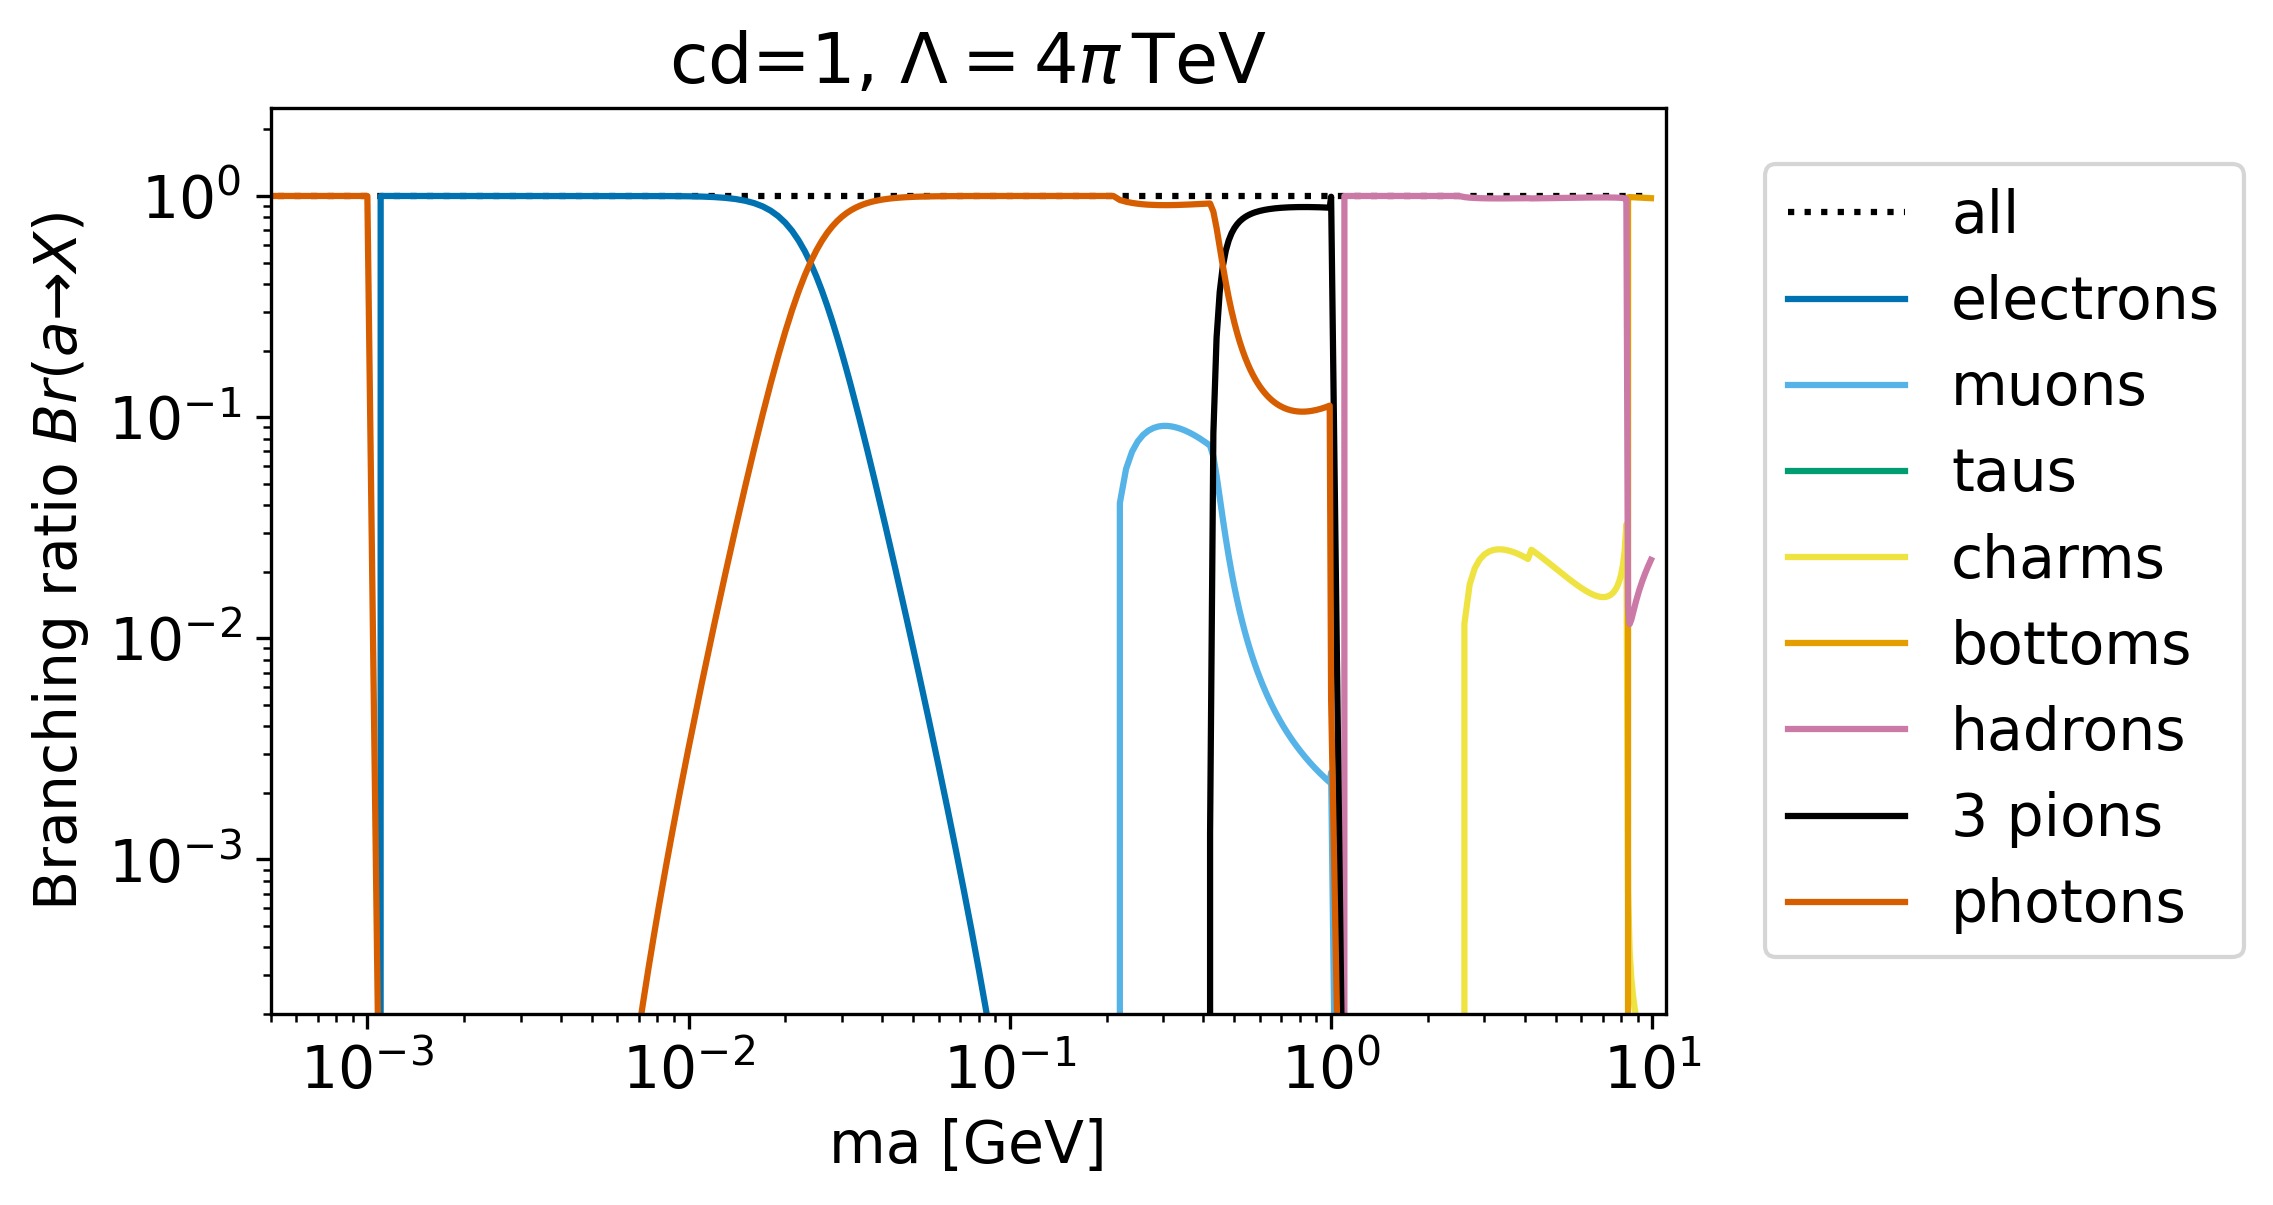

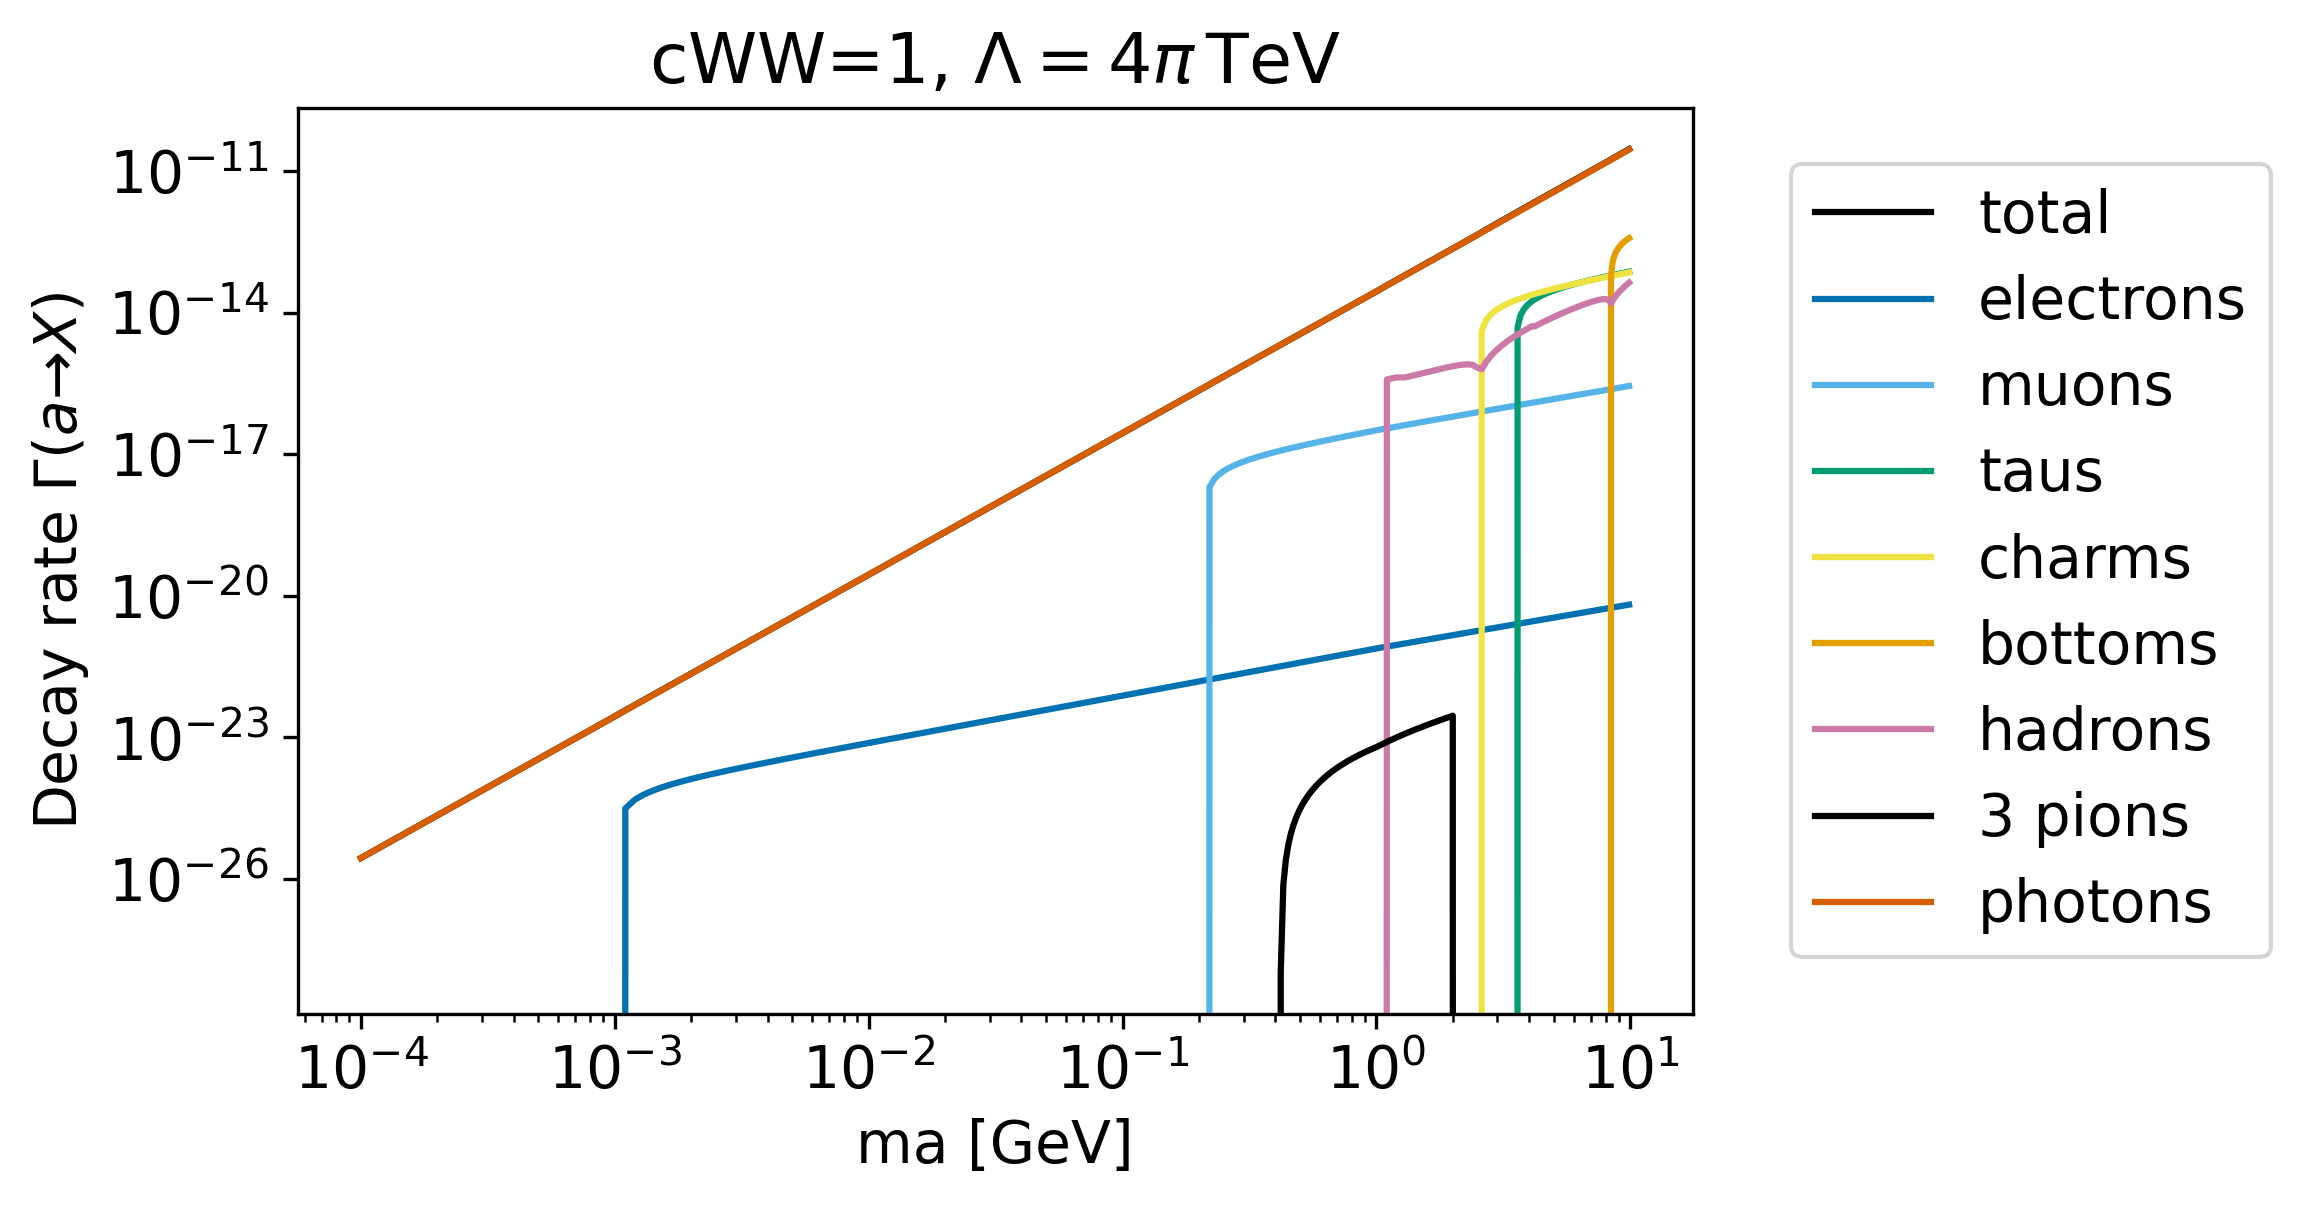

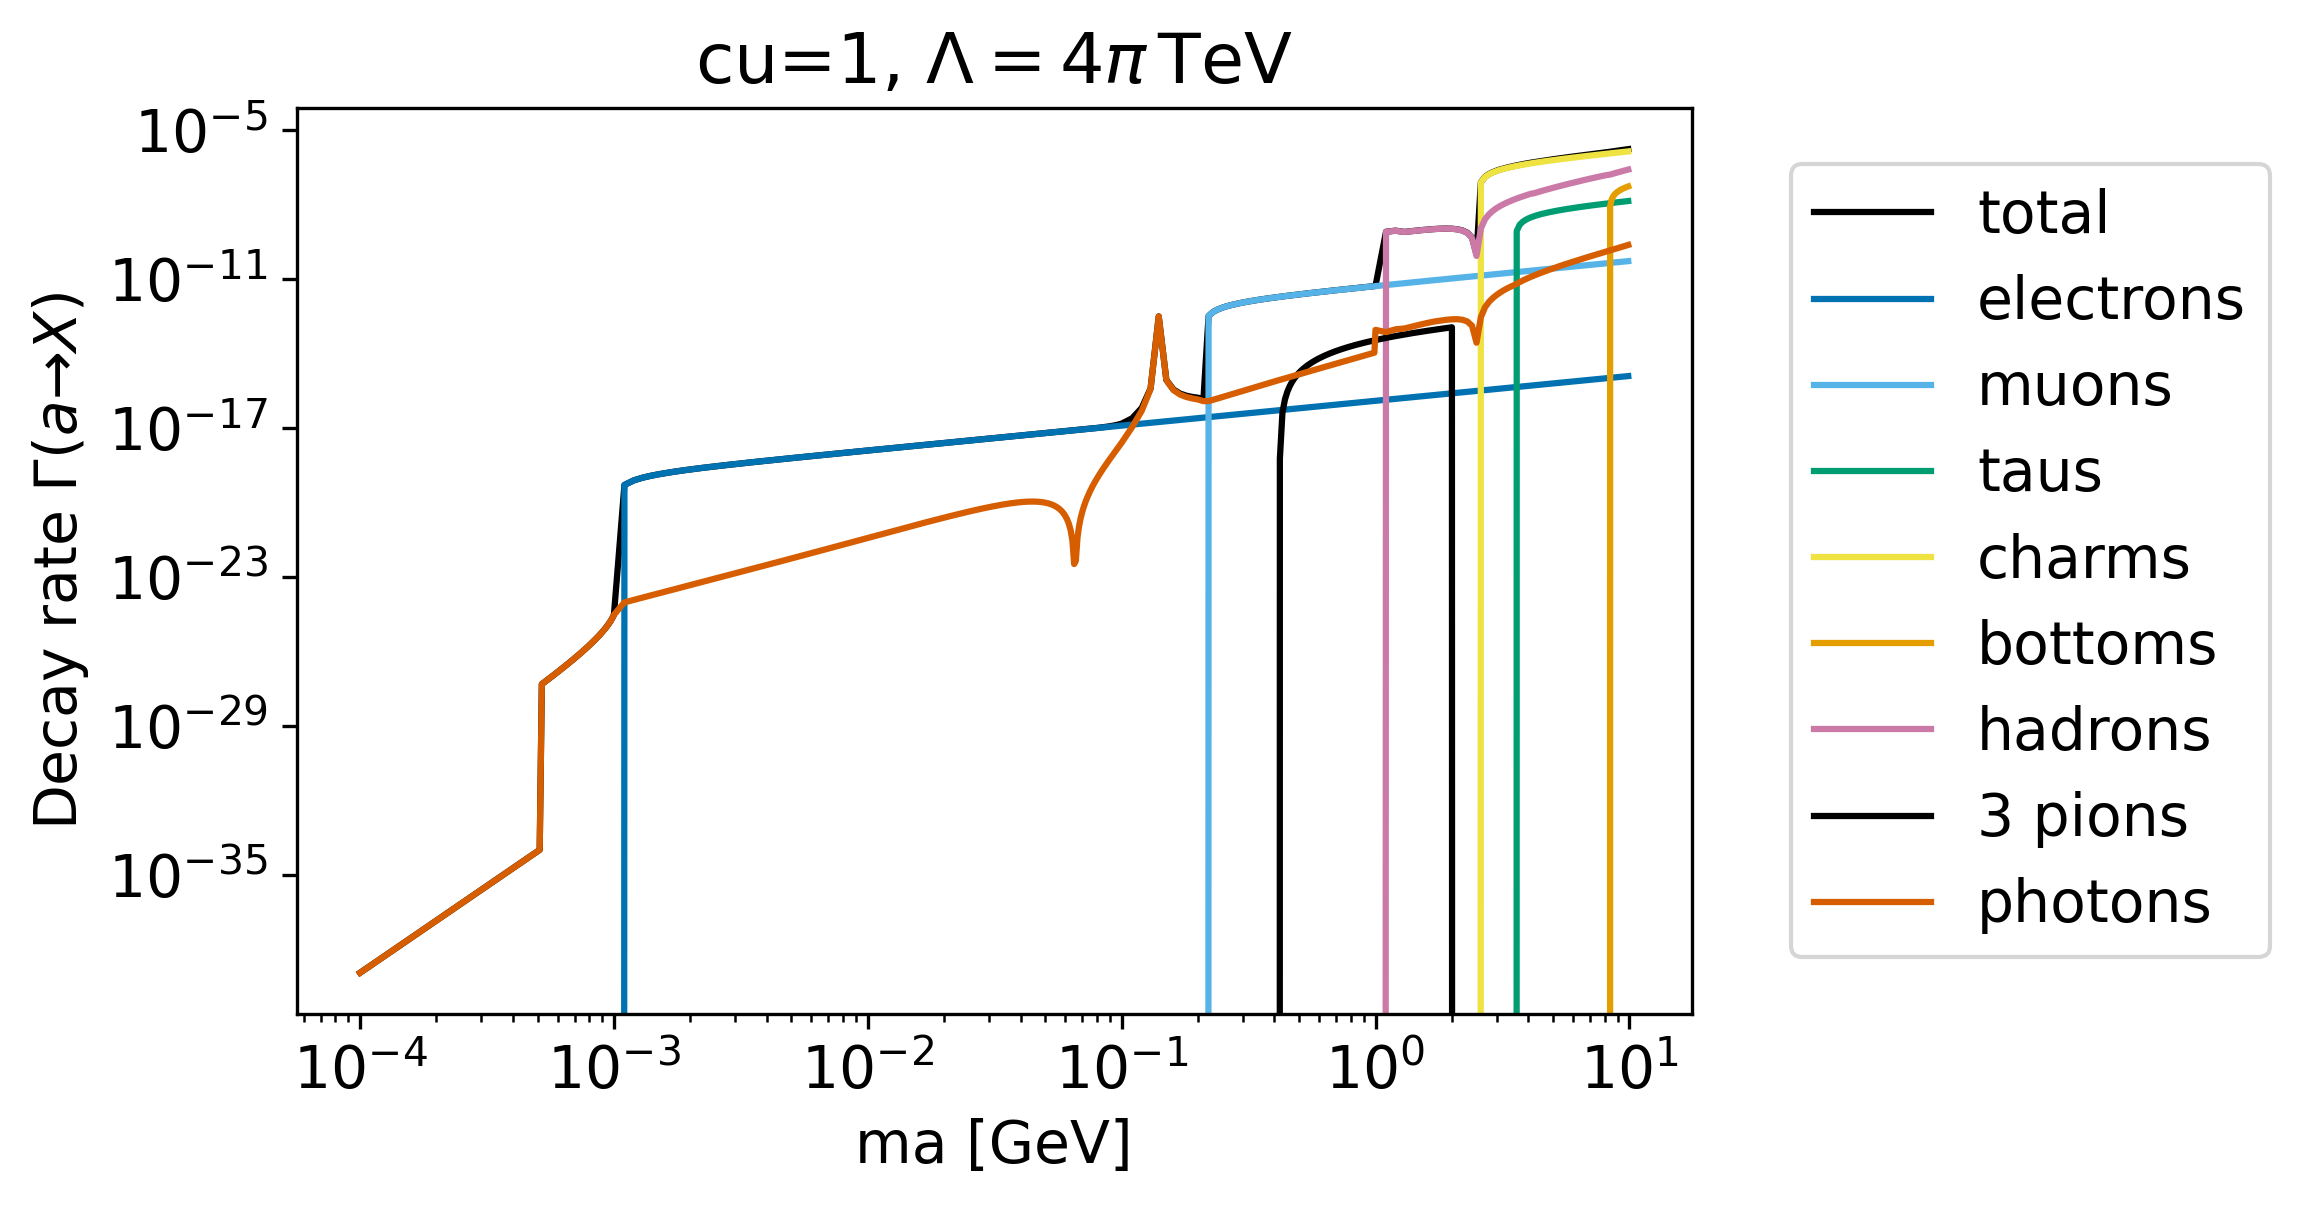

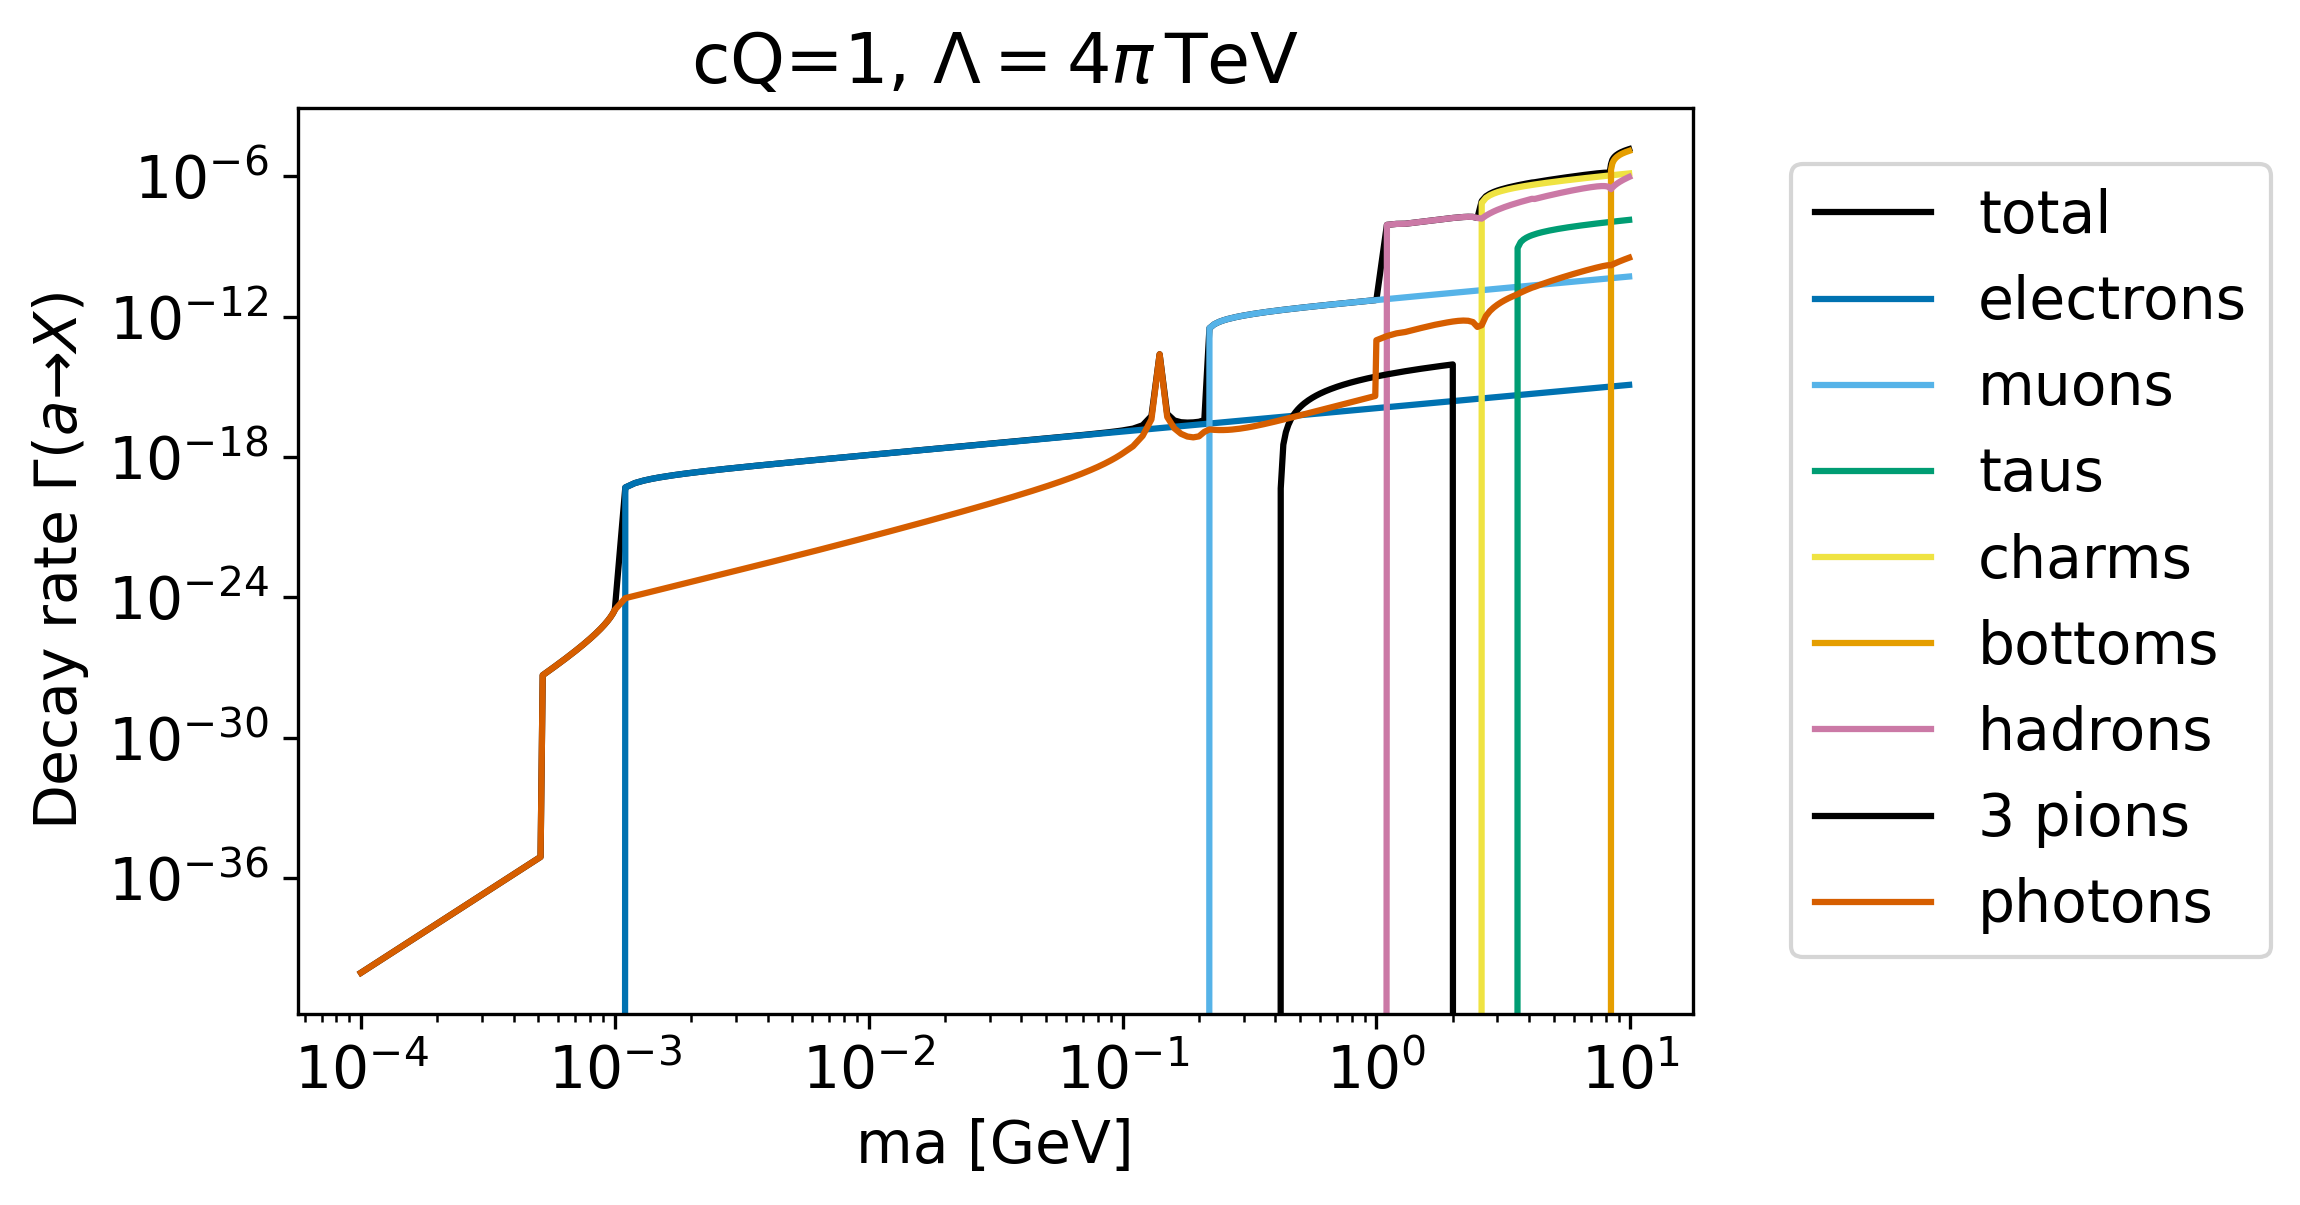

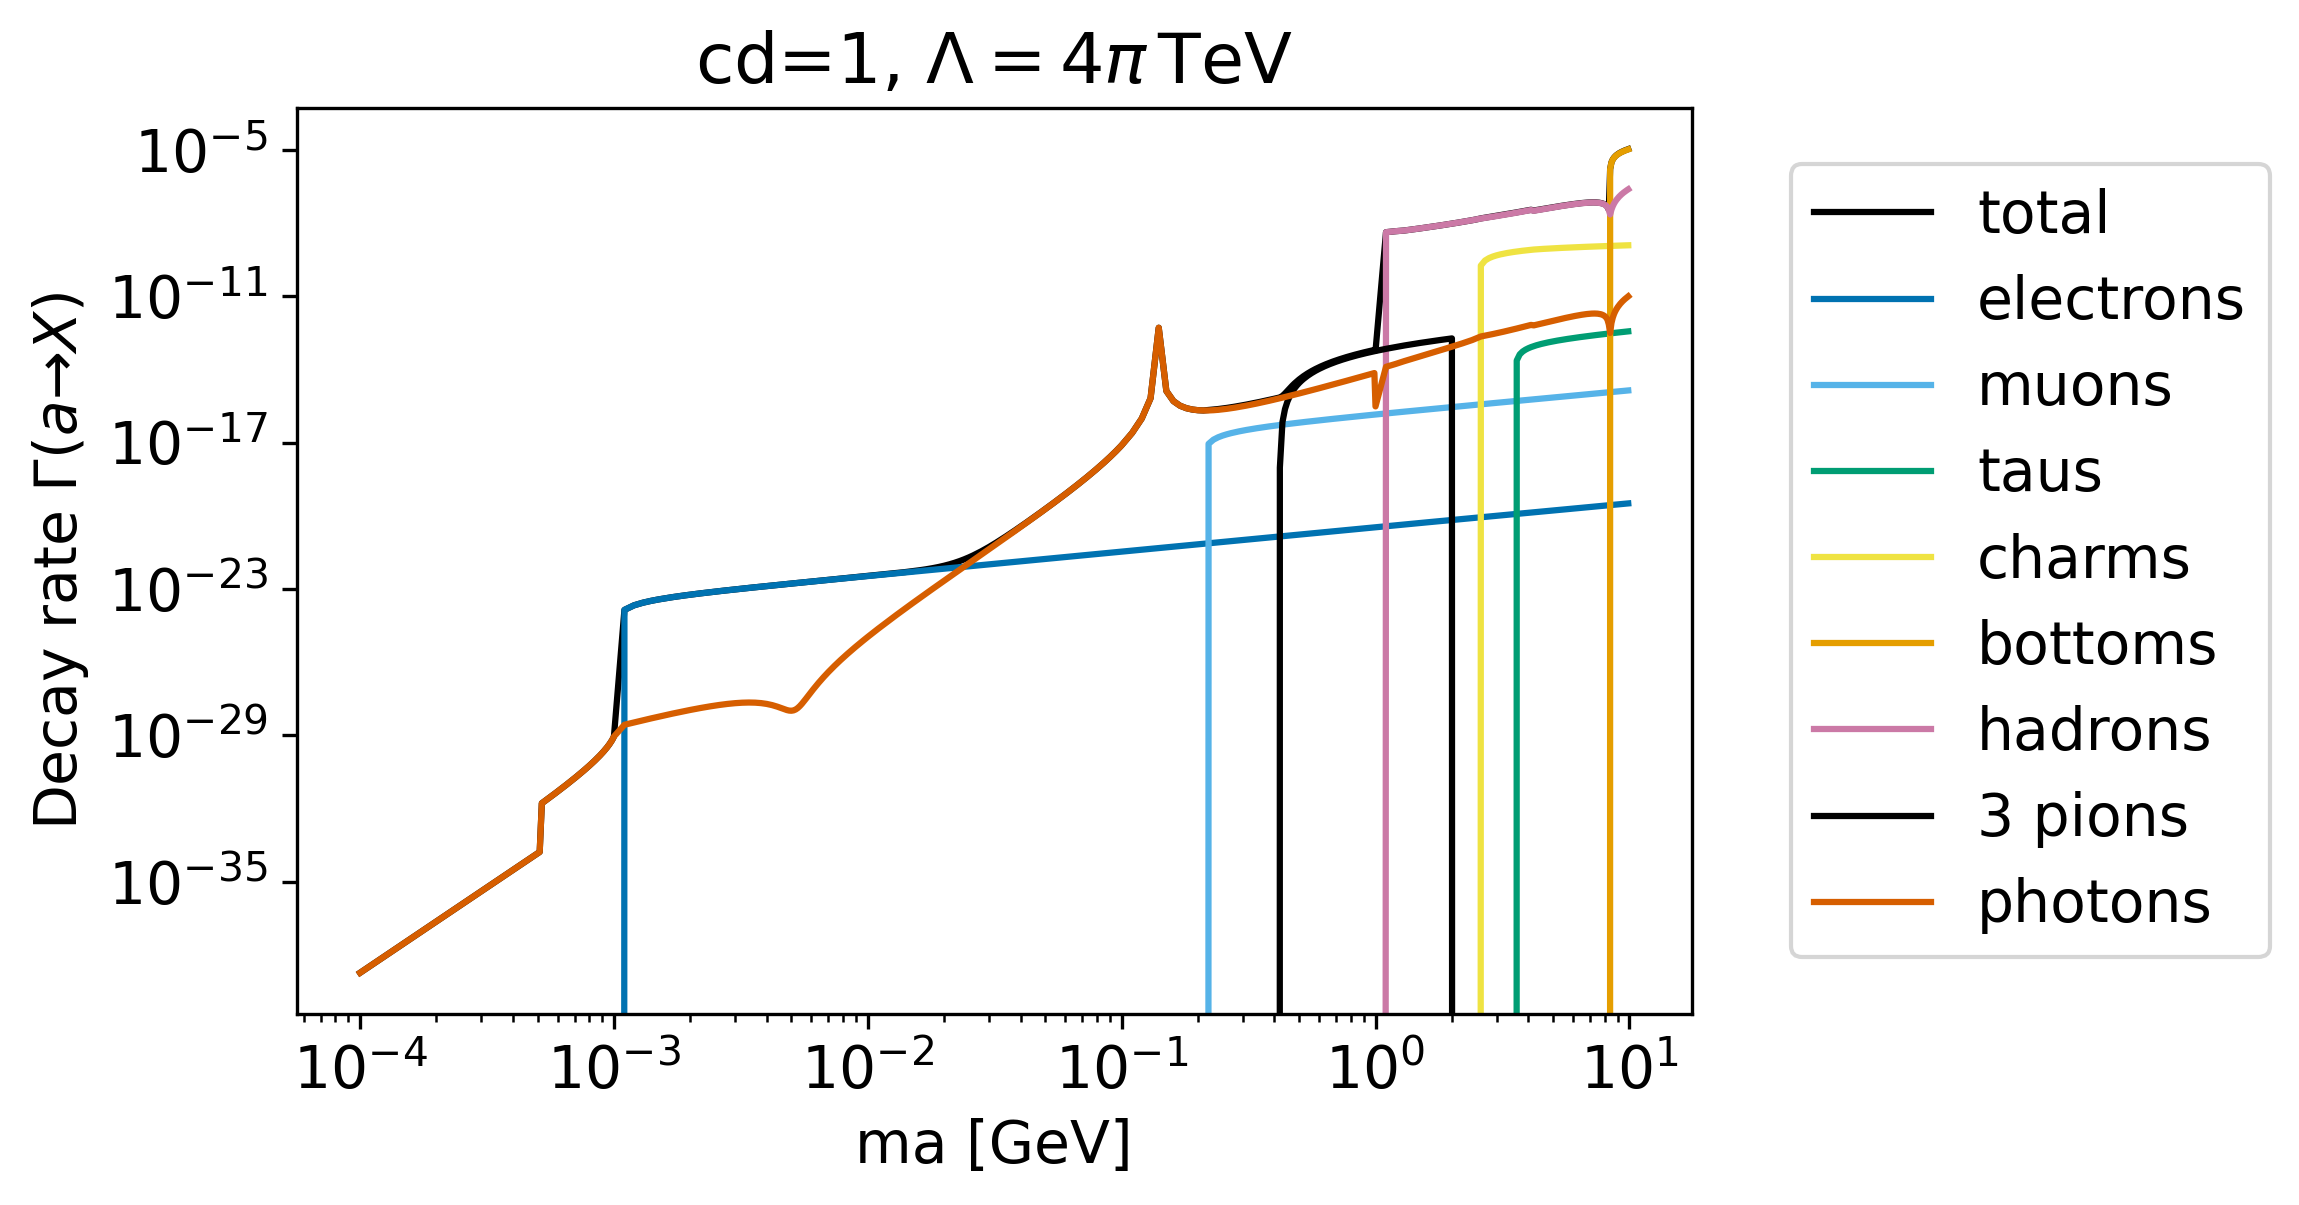

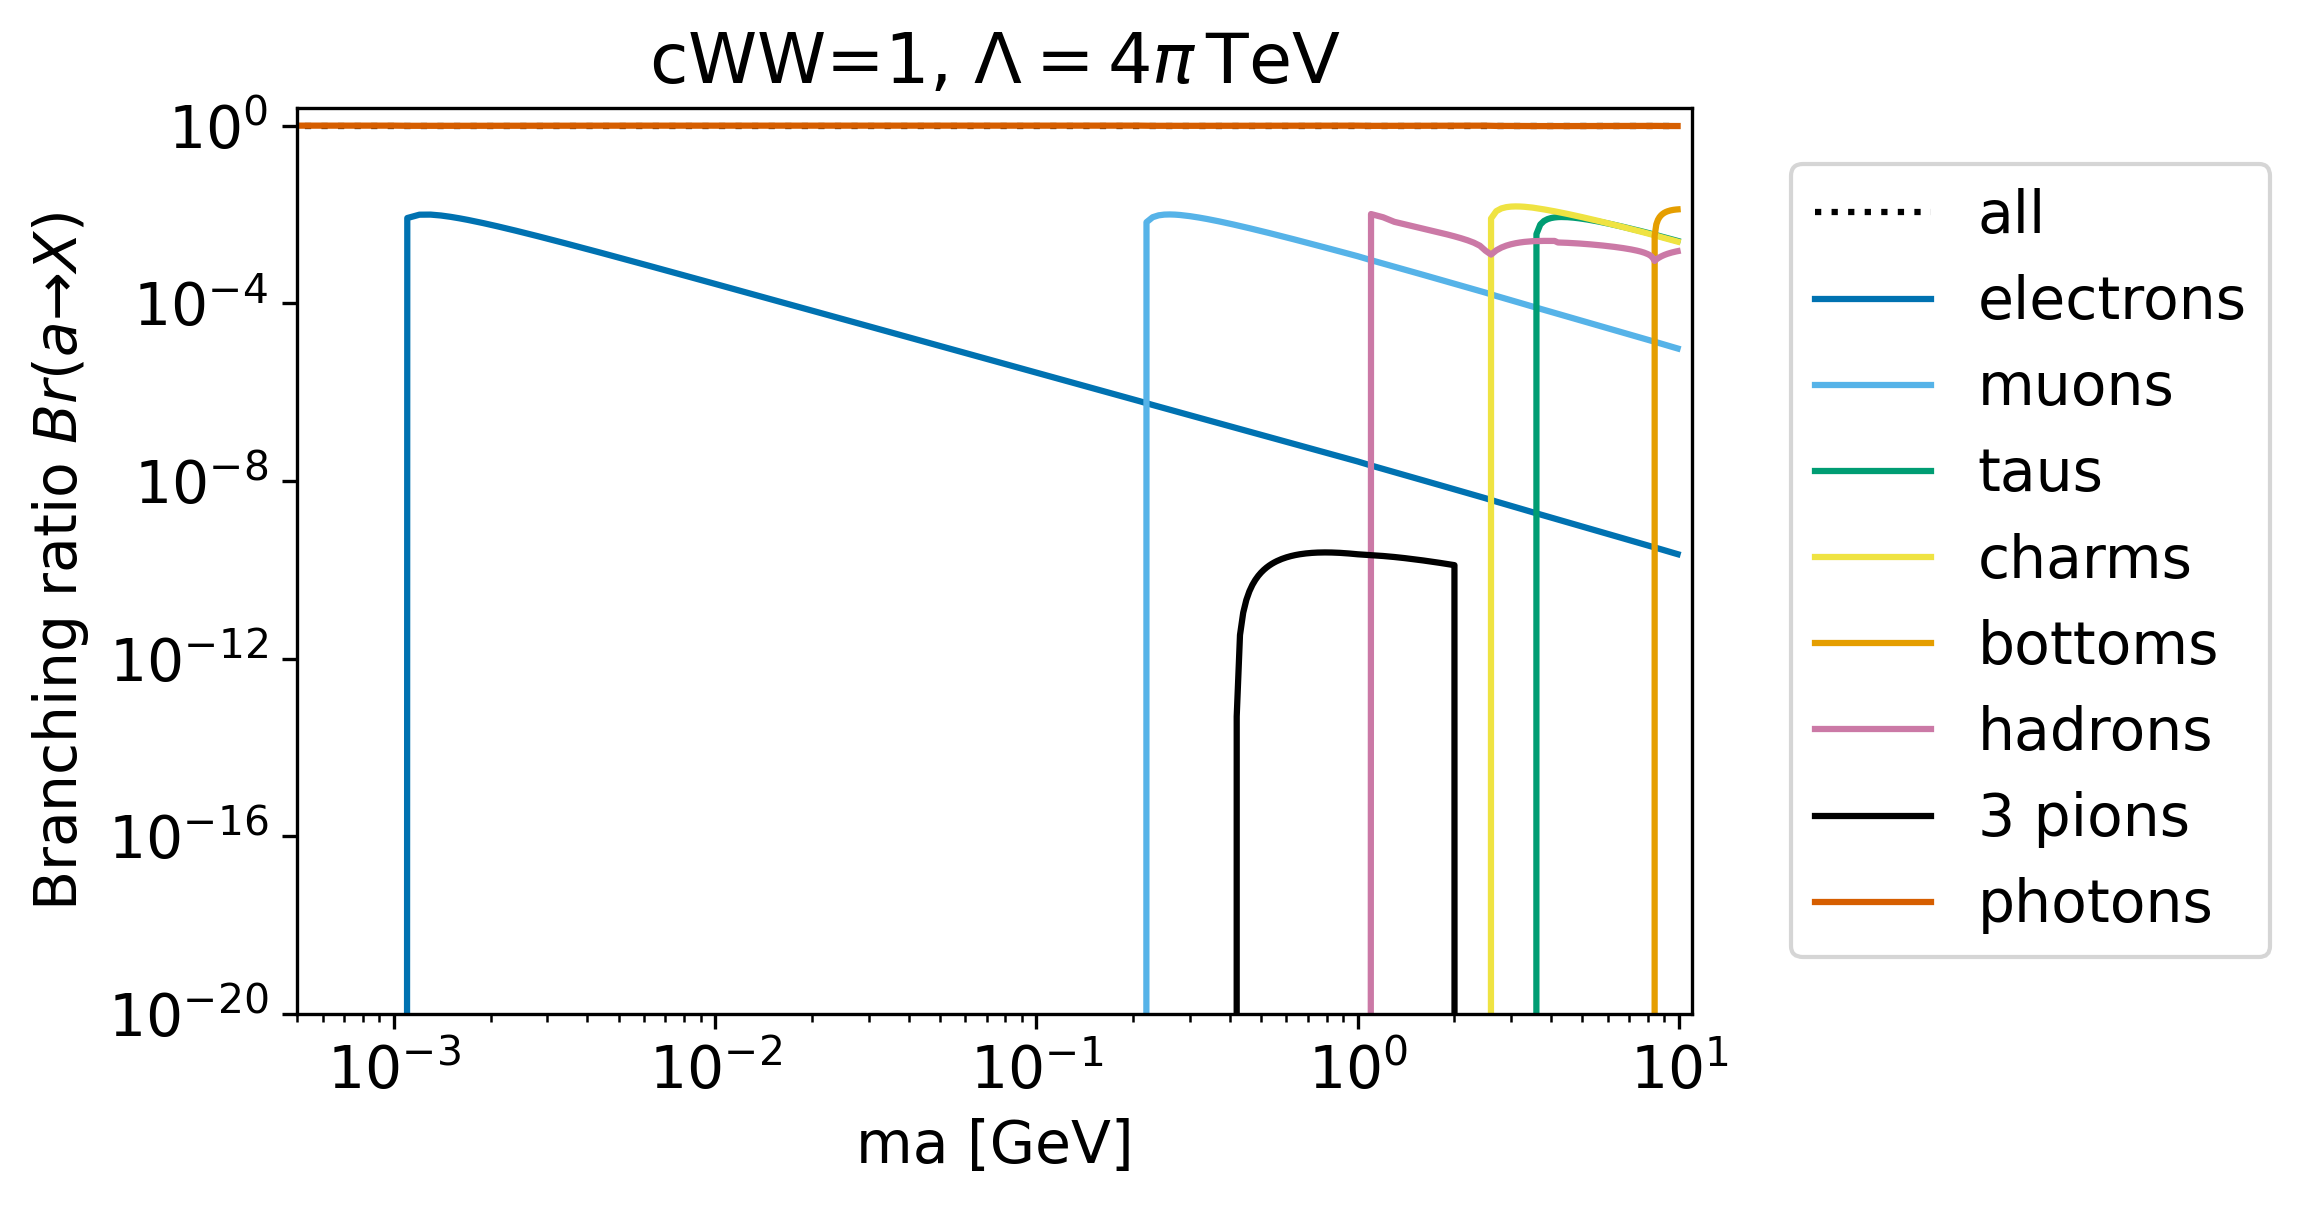

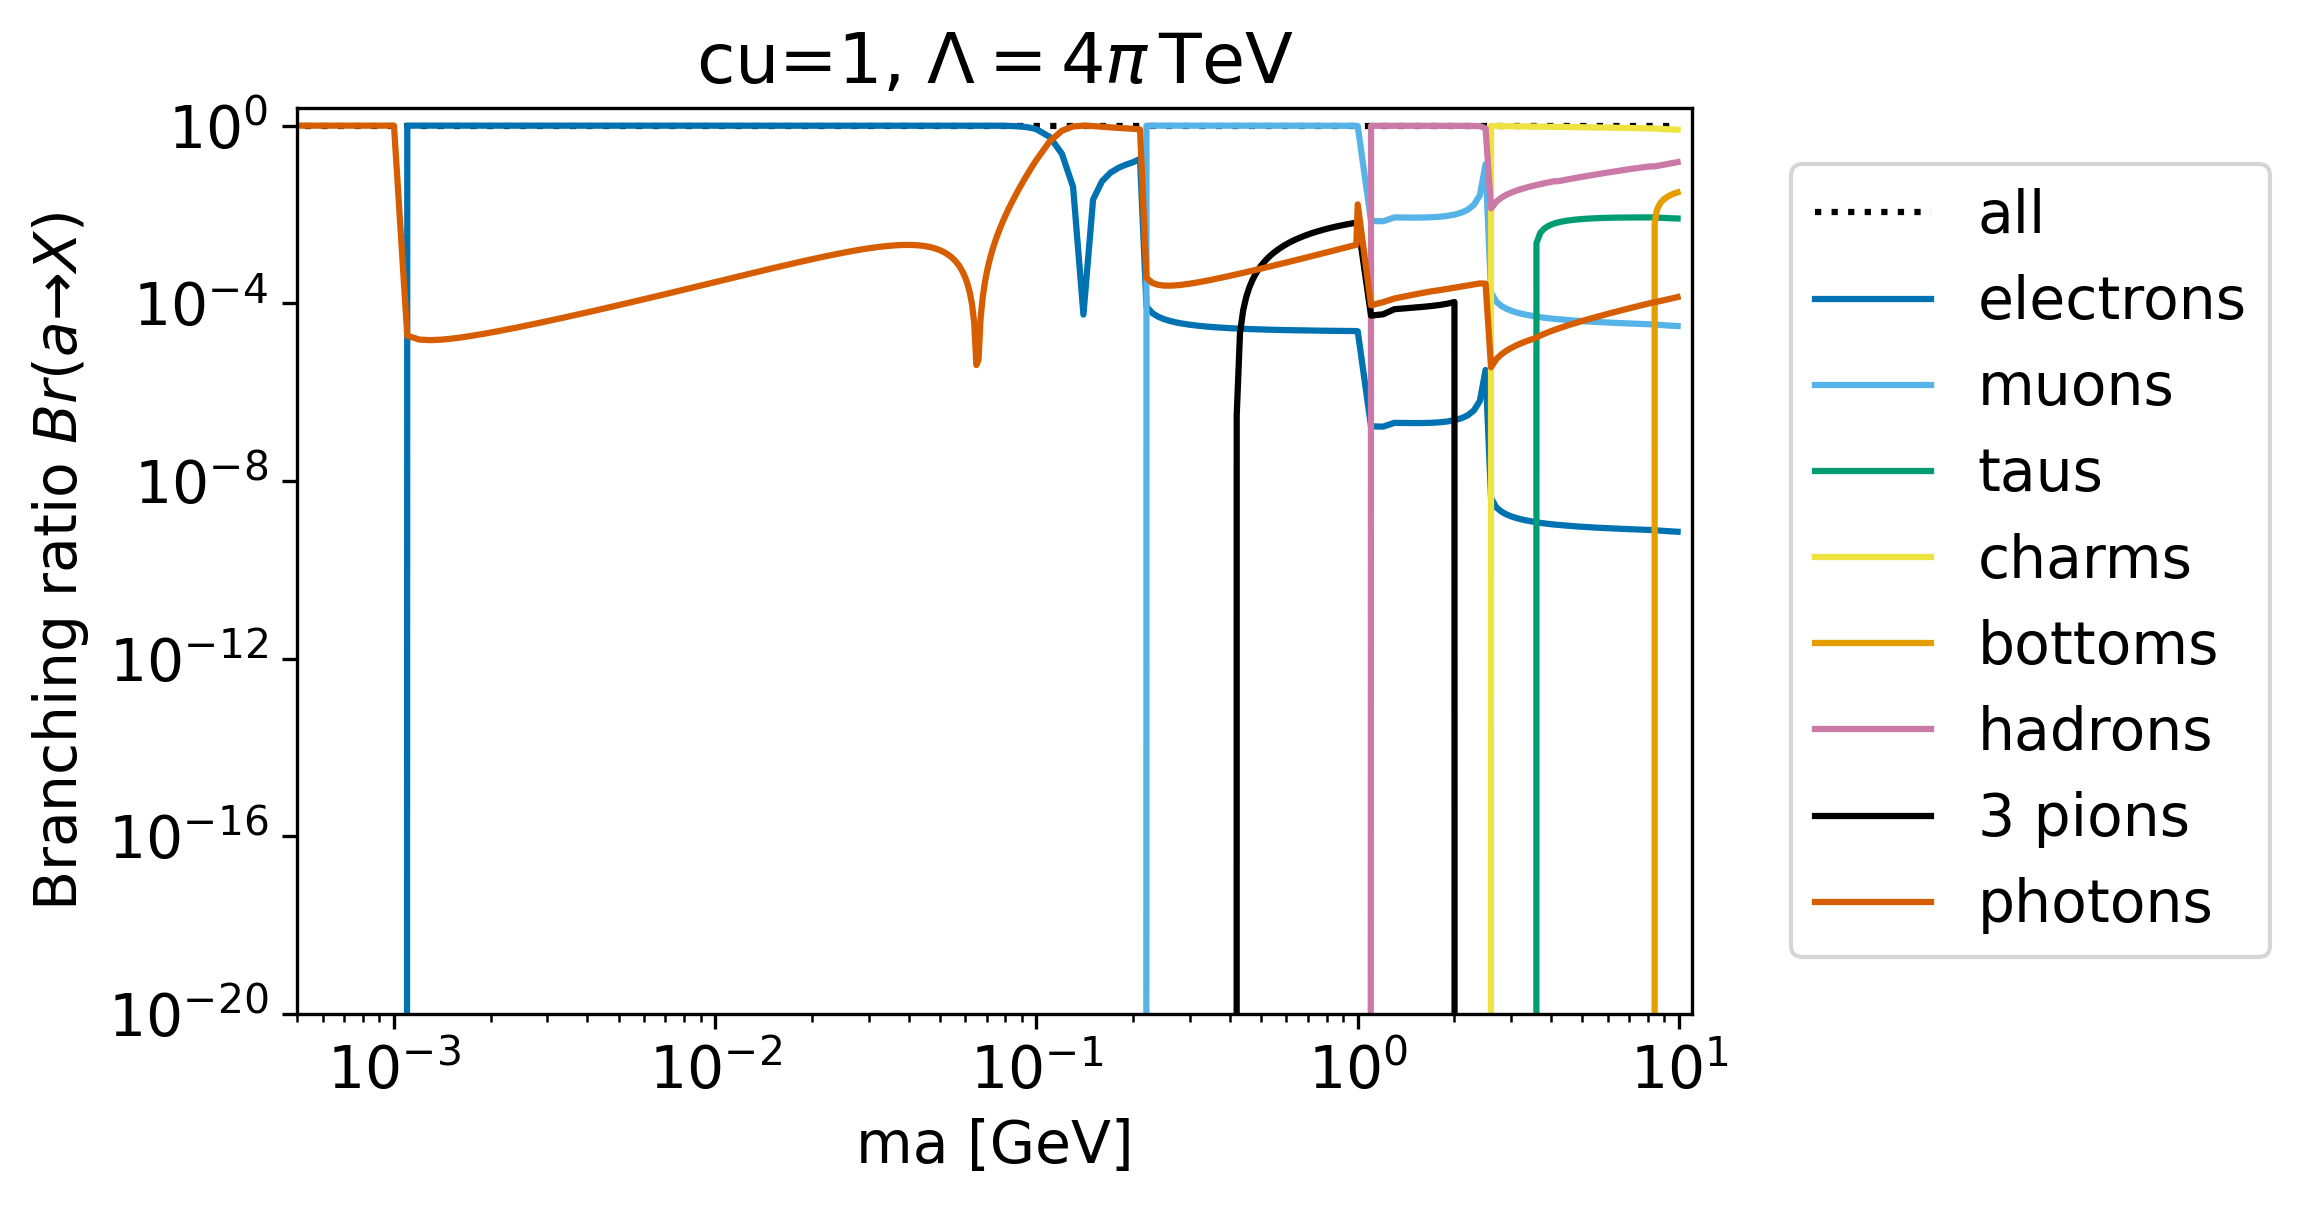

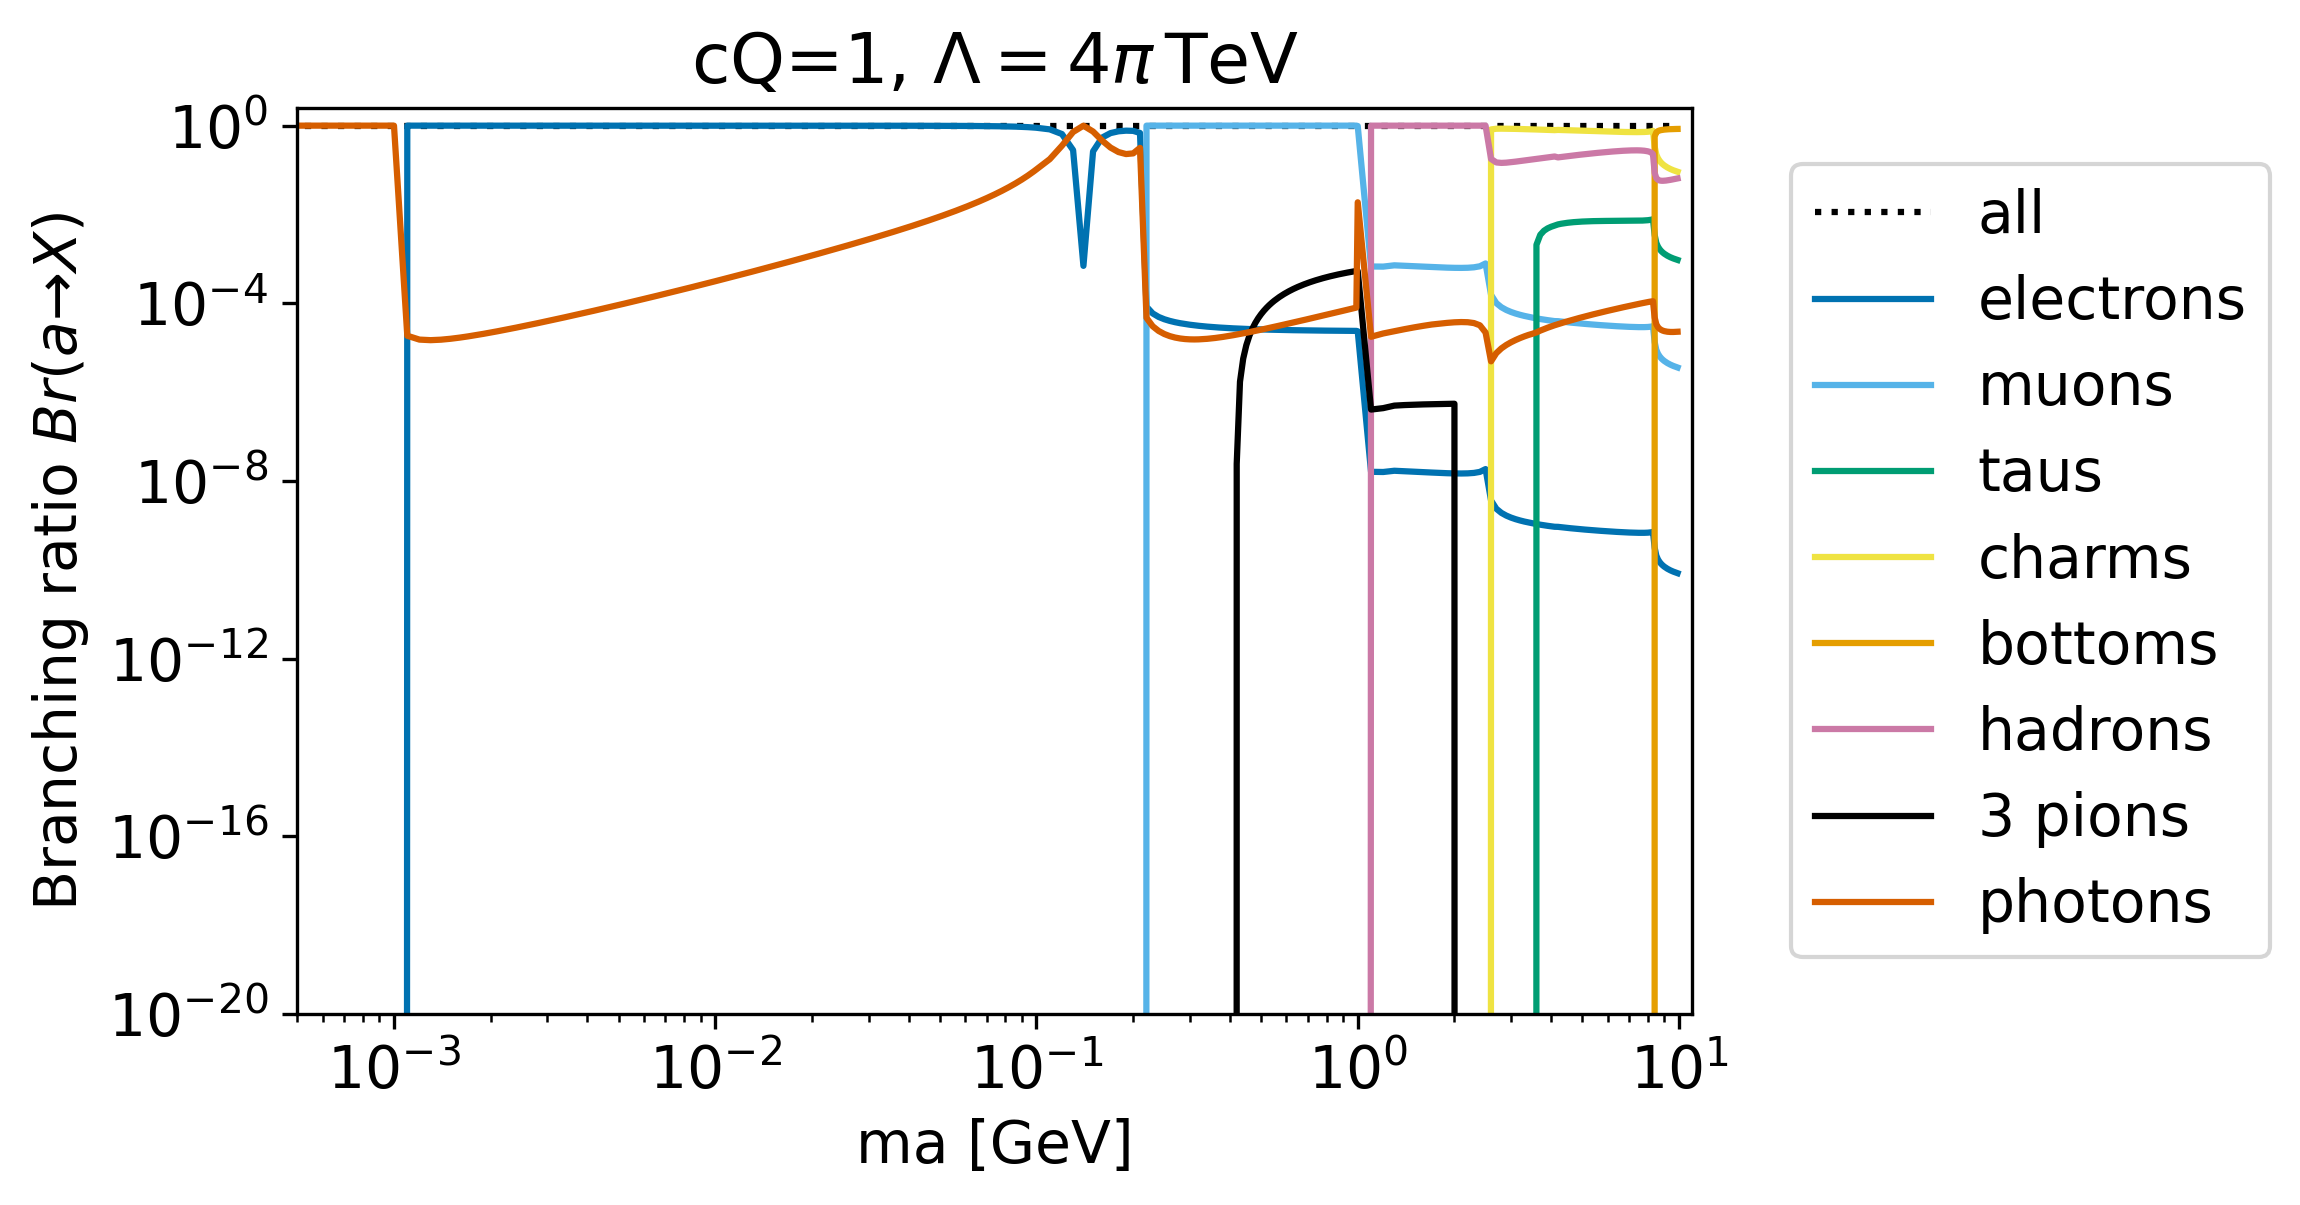

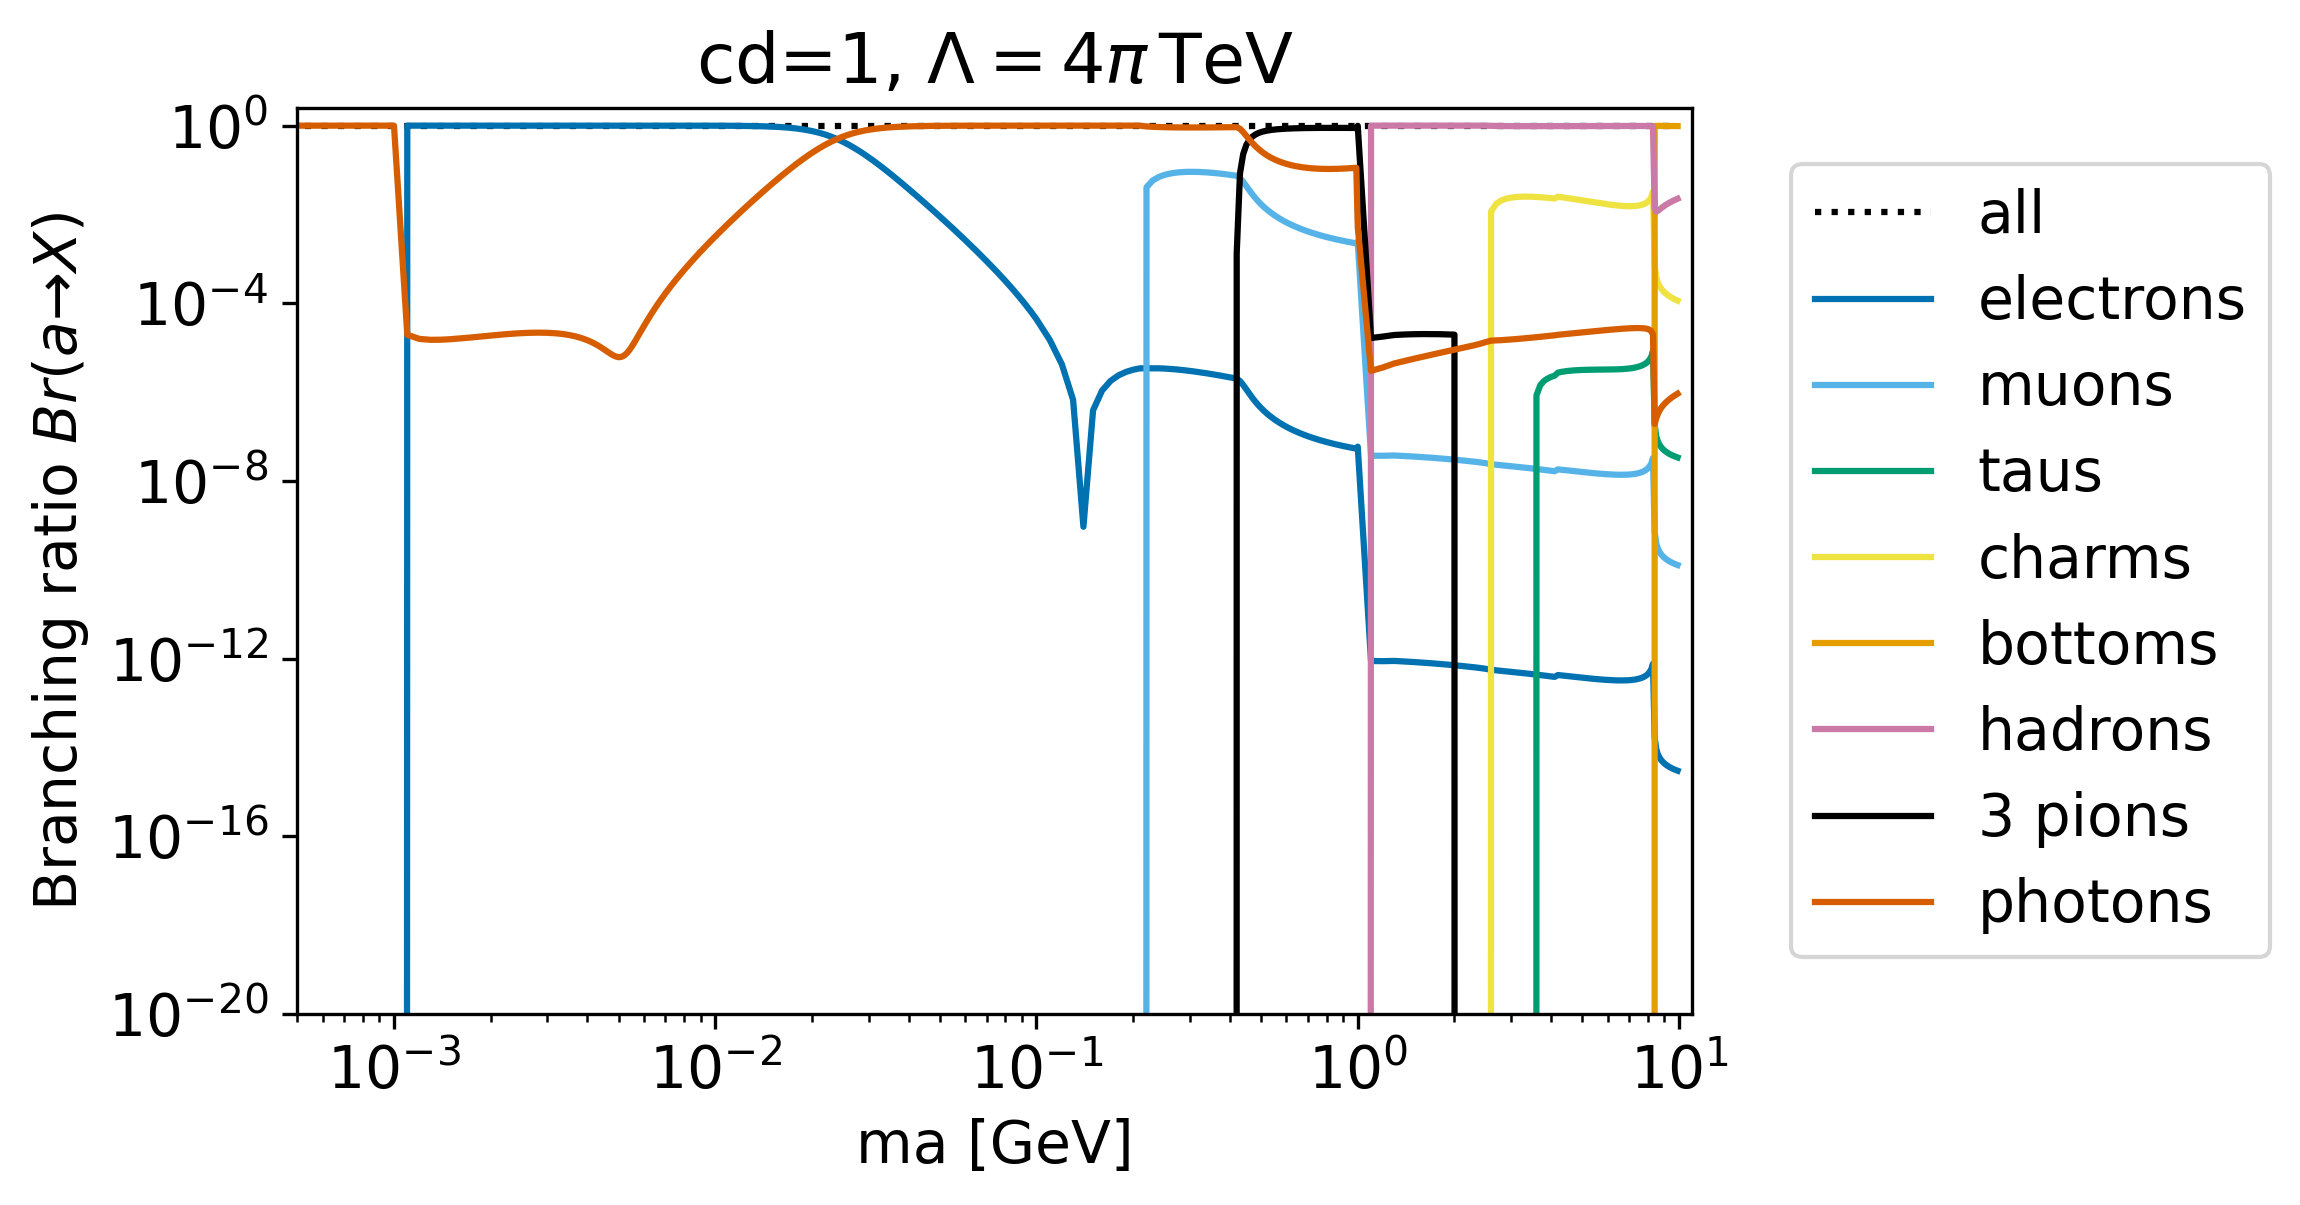

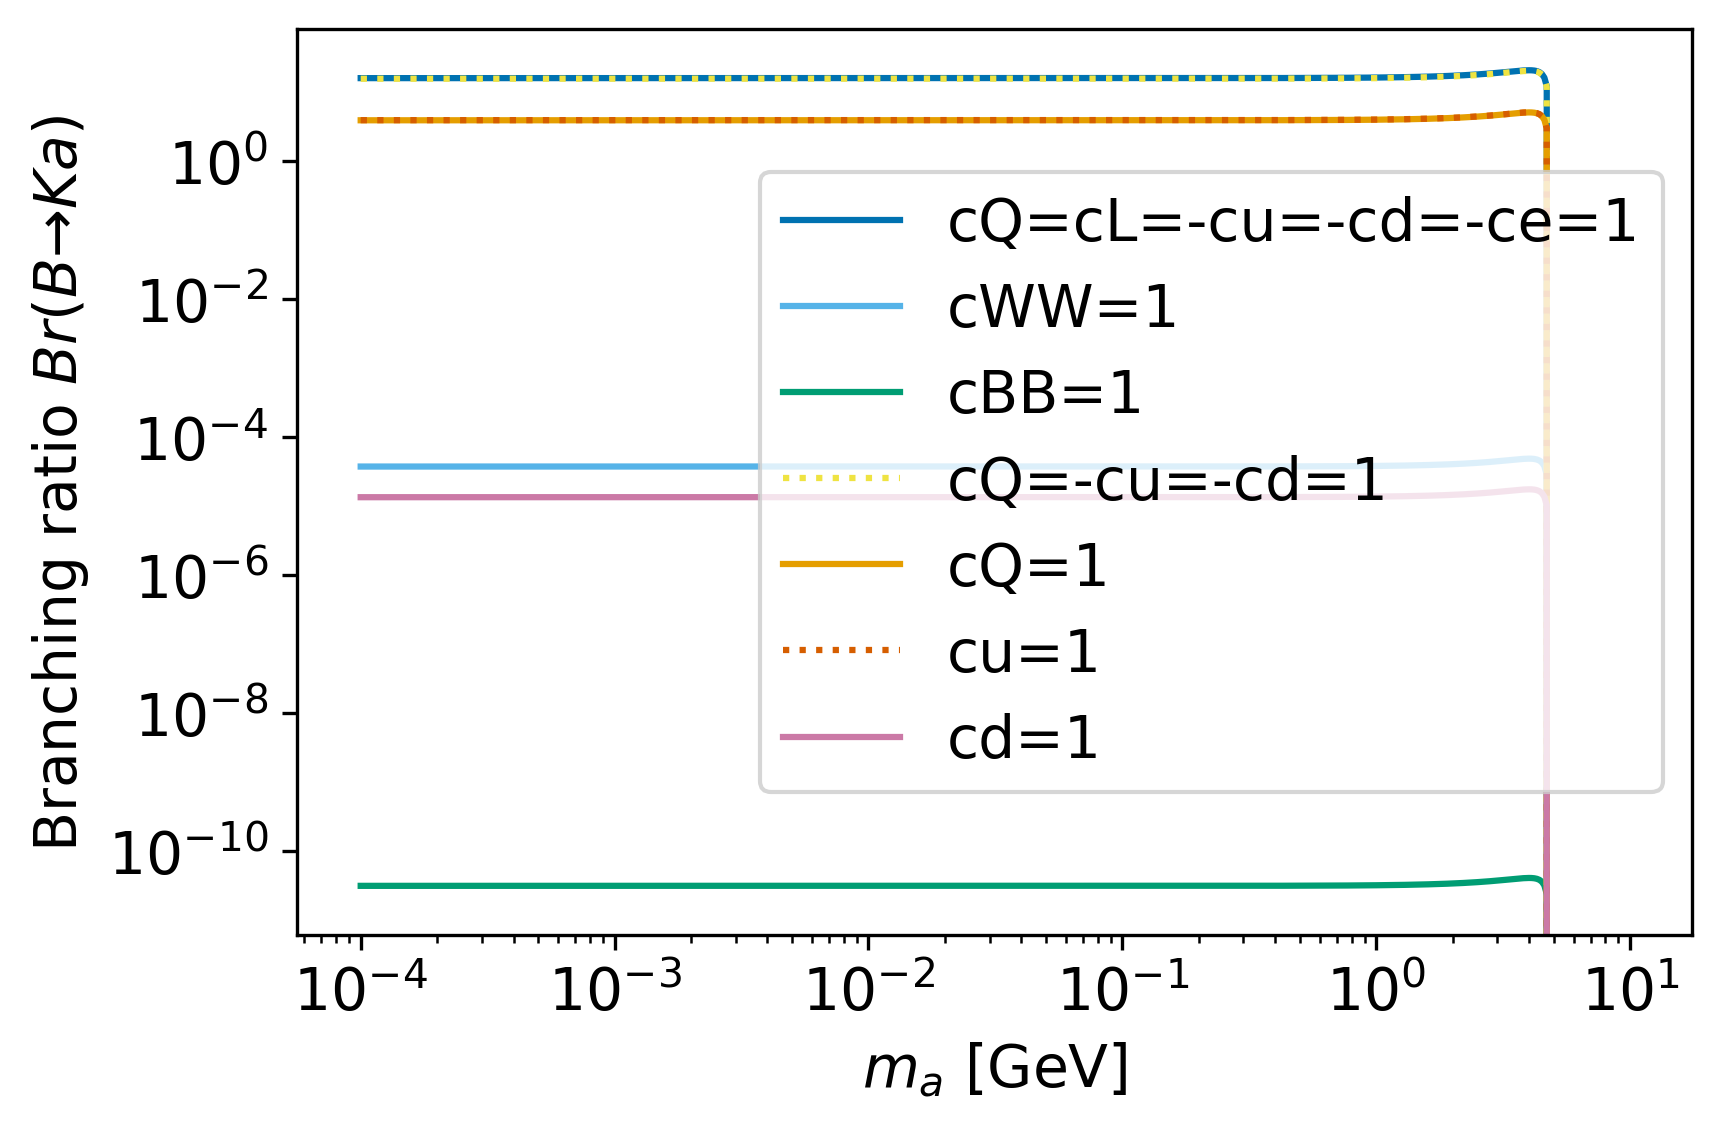

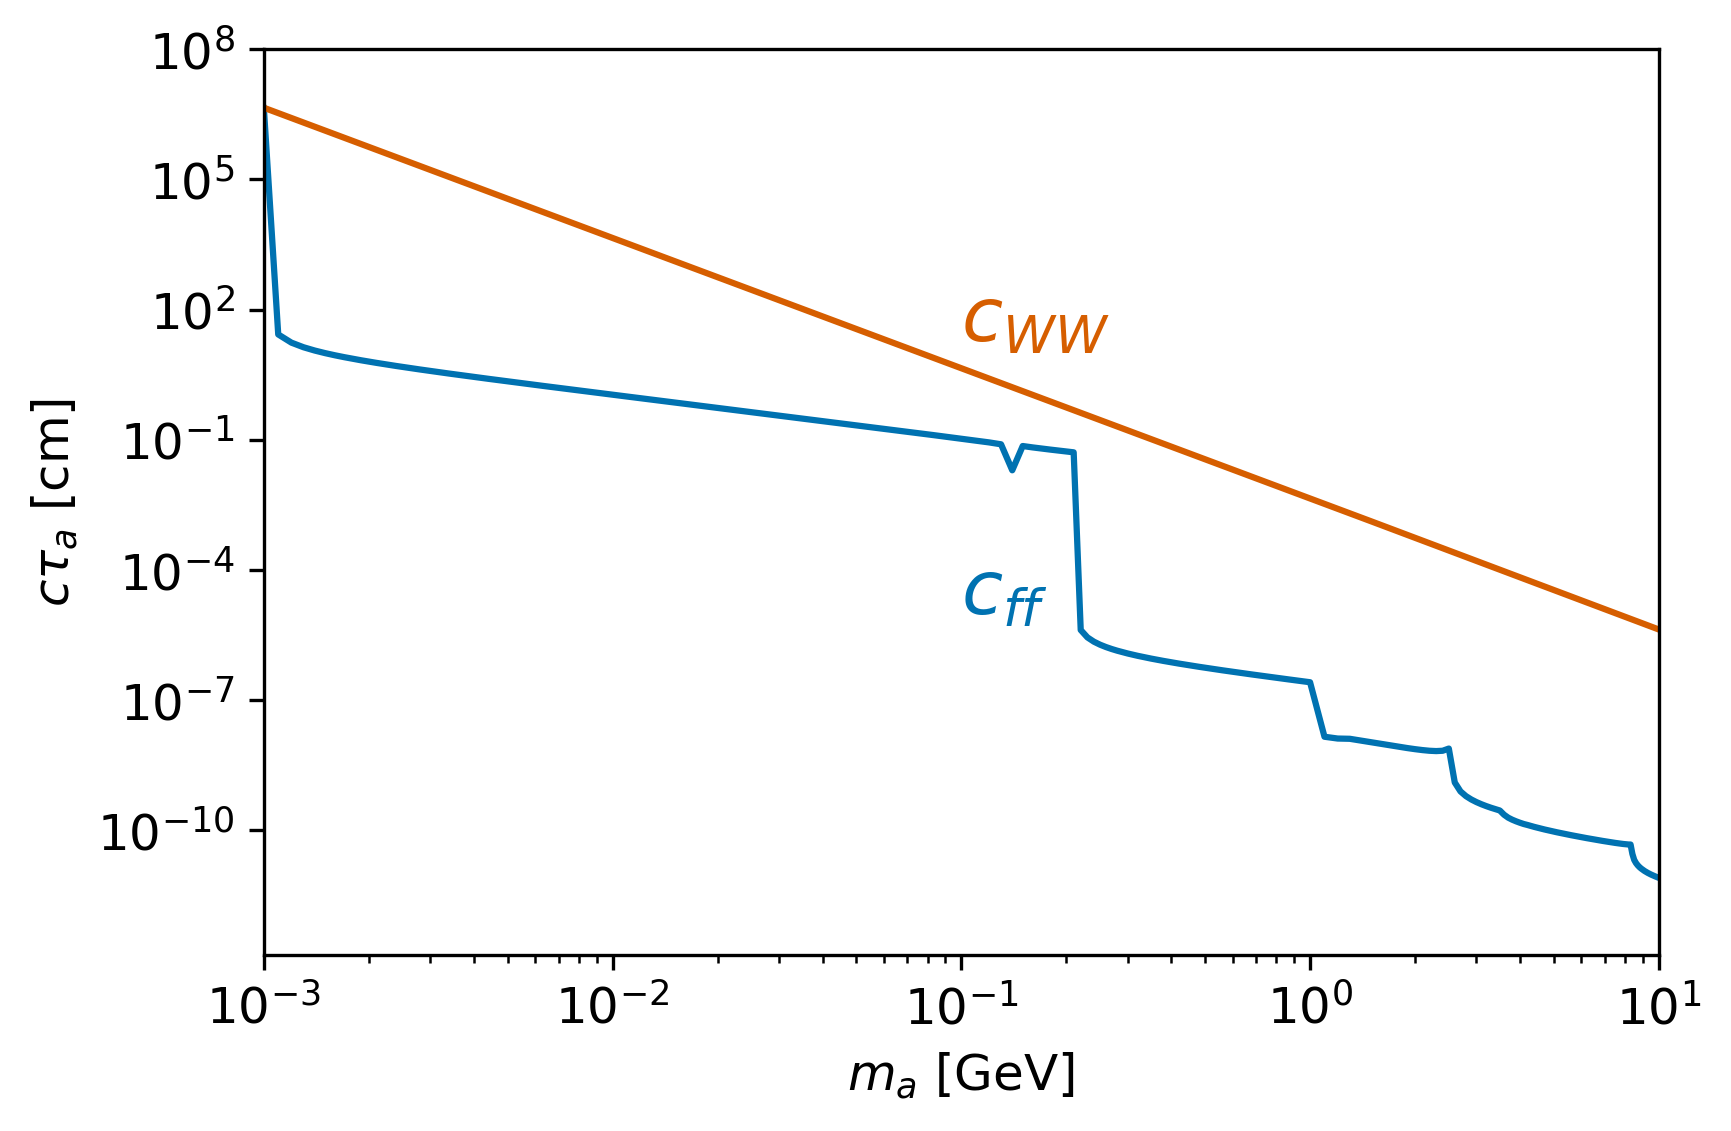

/home/stasya/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


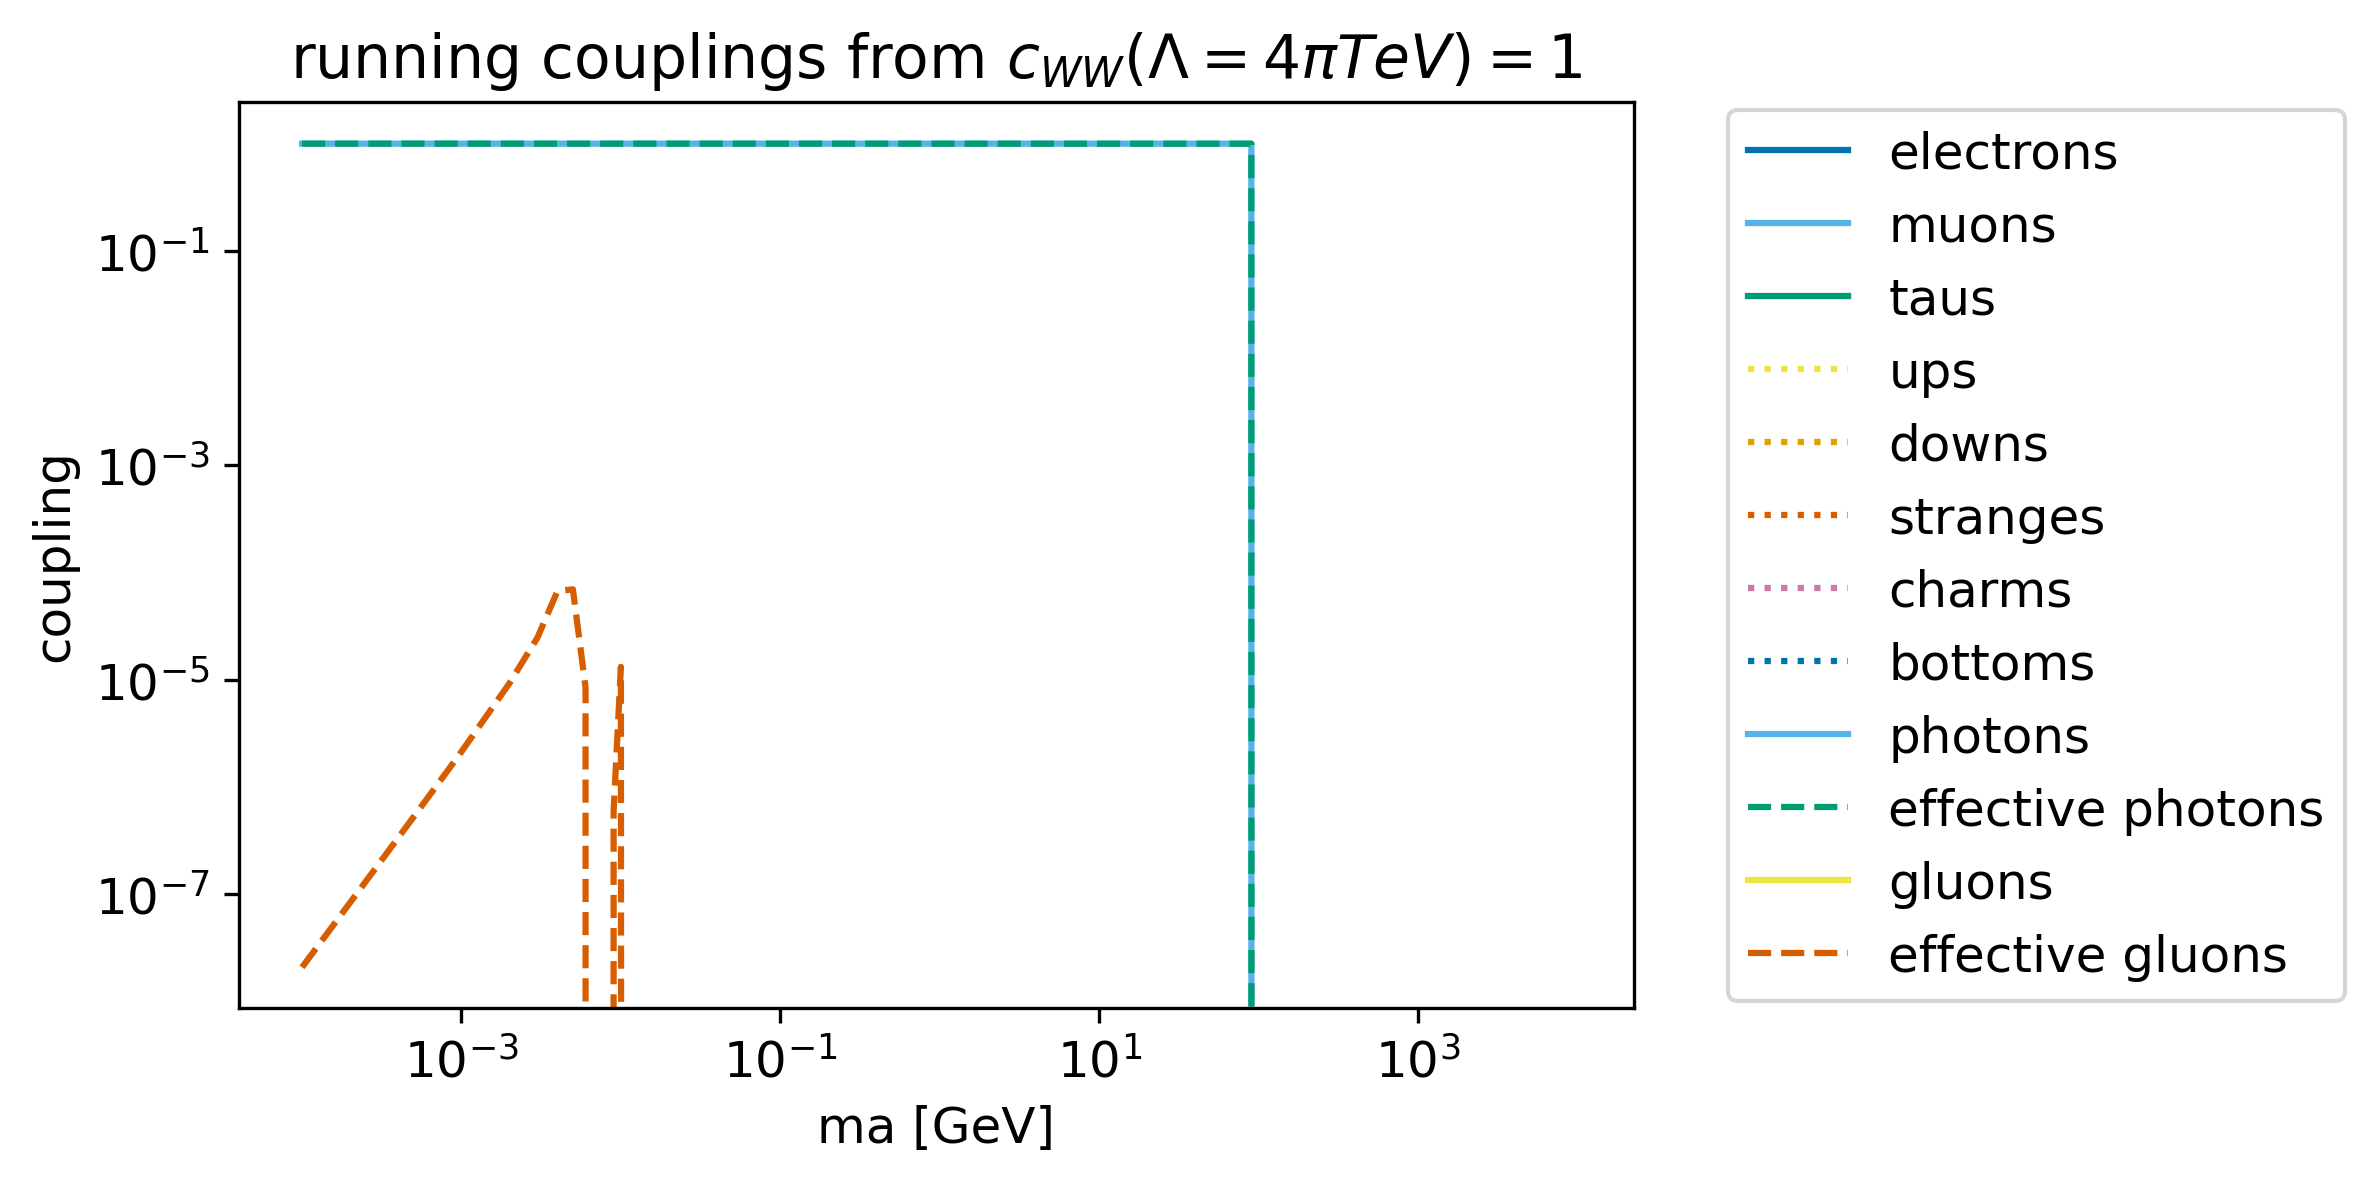

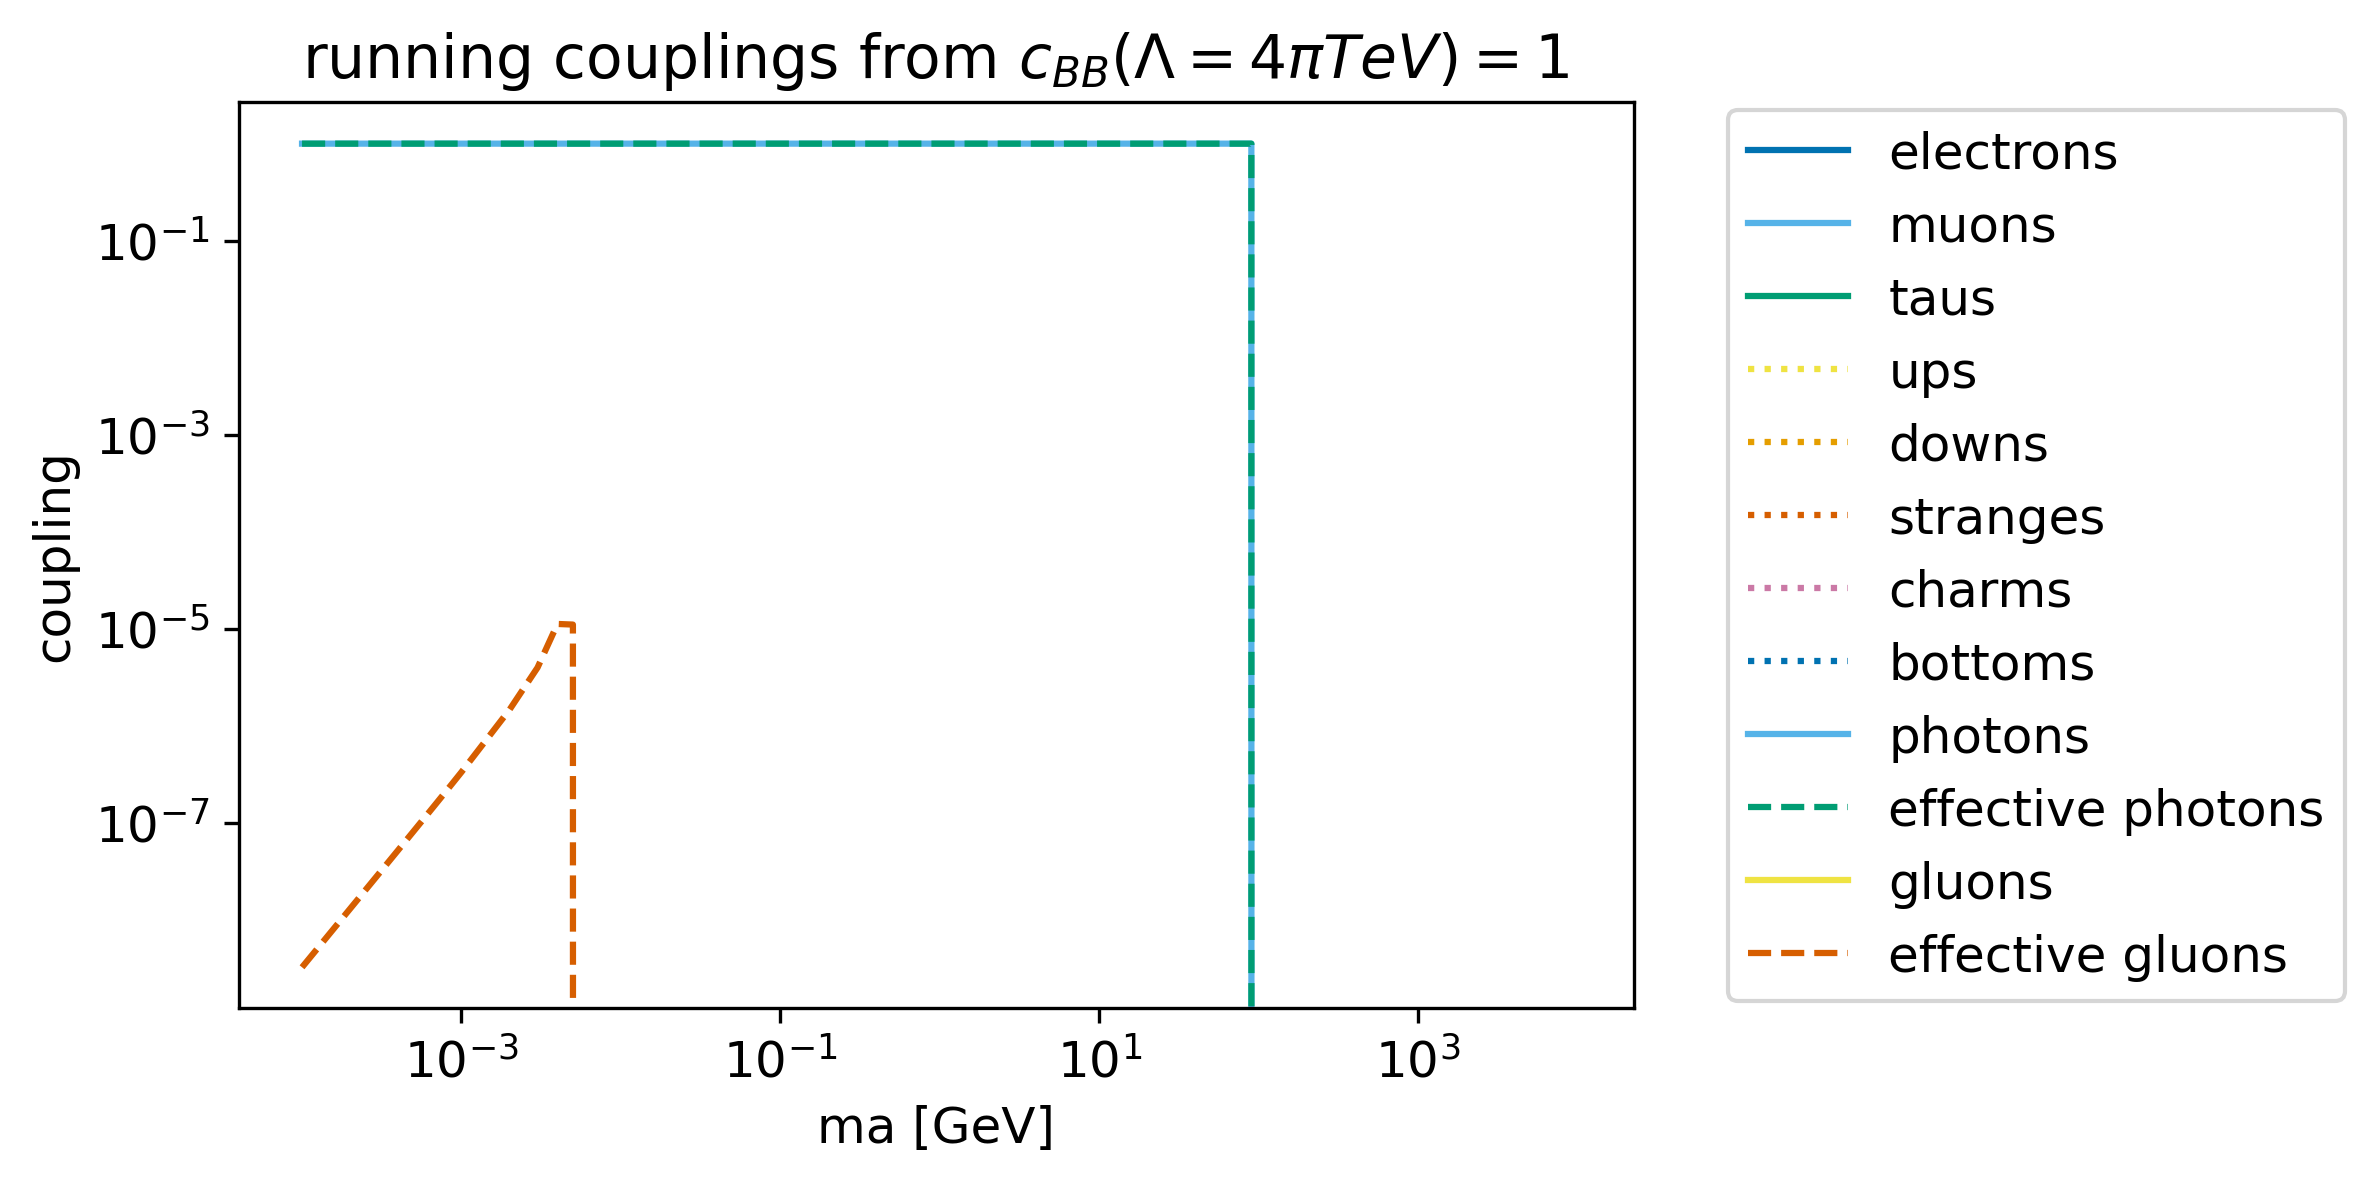

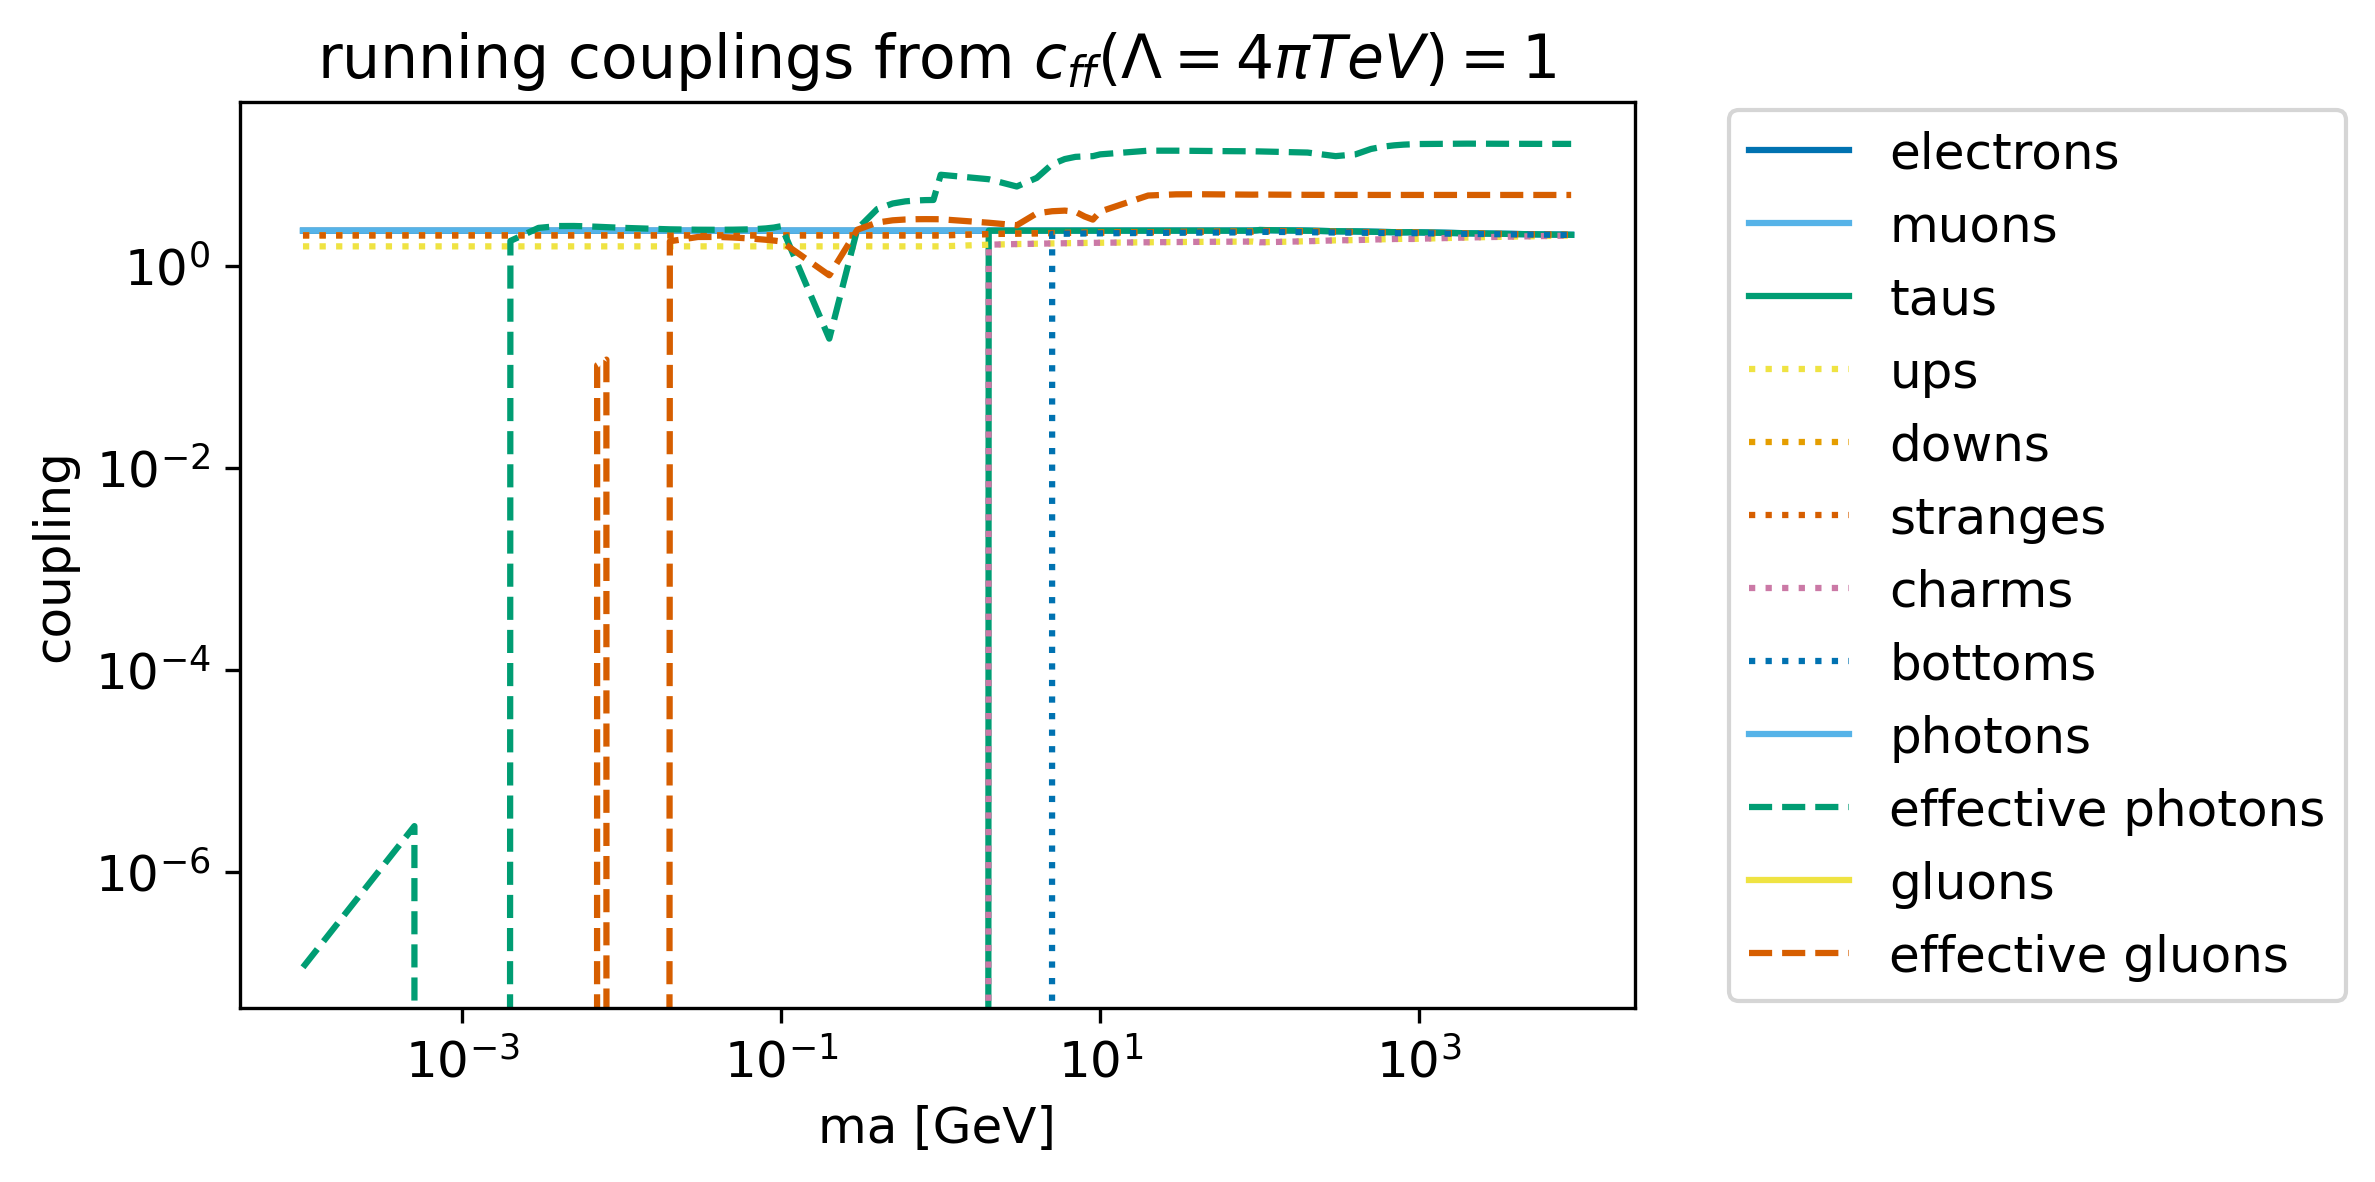

In [5]:
importNotebook("/home/stasya/prj/alps/Python/ALPs_BRs.ipynb")

### mass-coupling grid

In [6]:
#masslist= [0.05, 0.05, 0.1, 0.2, 0.3, 0.5, 1., 2., 4.]
masslist=np.sort(np.append(np.logspace(-2, 0, 25),[0.09, 0.101, 0.43, 0.47,0.55,\
                                                   0.95, 1, 1.5, 2, 2.5, 3, 3.2, 3.5, 4,\
                                                   0.0935, 0.095, 0.63, 0.65]))
masslistShort=np.logspace(-2,np.log(2.1), 40)
masslistcWWcheck= np.linspace(0.3,0.4,1)
particleCodes=[*range(0,7,1)]

masslistCheck=np.logspace(-2,np.log10(2.1), 3)

masslistPrompt=np.logspace(np.log10(0.2),np.log10(5))

In [55]:
couplingList=np.sort(np.append(np.logspace(-6, 4, 20),np.logspace(-1, 2, 20)))

couplingListcWW=np.logspace(-1, 2, 20)
couplingListcff=np.logspace(np.log(0.02), np.log(0.5), 20)

couplingListShort=np.logspace(np.log(8*10**-4), np.log(1.7), 25)
couplingListcWWcheck=np.arange(0,190)*0.5+0.5
couplingListcWWcheckShort=np.array([0.5,1,1.5,2,2,5.3,50,80,85,90,95])

couplingListcWWprompt=np.logspace(0,2, 40)
couplingListcffprompt=np.logspace(-4, 0, 40)

In [50]:
couplingListcWWprompt

array([  1.        ,   1.12533558,   1.26638017,   1.42510267,
         1.60371874,   1.80472177,   2.03091762,   2.28546386,
         2.57191381,   2.89426612,   3.25702066,   3.66524124,
         4.12462638,   4.64158883,   5.22334507,   5.87801607,
         6.61474064,   7.44380301,   8.3767764 ,   9.42668455,
        10.60818355,  11.93776642,  13.43399333,  15.11775071,
        17.0125428 ,  19.14481976,  21.5443469 ,  24.24462017,
        27.28333376,  30.7029063 ,  34.55107295,  38.8815518 ,
        43.75479375,  49.23882632,  55.4102033 ,  62.35507341,
        70.17038287,  78.96522868,  88.86238163, 100.        ])

In [8]:
constants={
    'InvGeVtocm': 1/(5.06 * 10**(13))
}

In [28]:
sm['tauB+'] = 1.638*10**(-12)
sm['ctauB+']= 3 * 10**10 * 1.638*10**(-12)

sm['mB0'] = 5.27965
sm['tauB0'] = 1.519*10**(-12)

sm['mK0'] = 0.89166

## based on https://github.com/rrschaefer/alps (formulas taken from 2012.12272 and 1708.00443)

### Alps running implemented in https://github.com/TdAlps

### ALP and B-> Ka decay rates

In [31]:
def fzStar(t):
    tplus = (sm['mB0']+sm['mK0'])**2
    tminus = (sm['mB0']-sm['mK0'])**2
    tzero = tplus * (1-math.sqrt(1-tminus/tplus))
    return (math.sqrt(tplus-t) - math.sqrt(tplus-tzero))/(math.sqrt(tplus-t) + math.sqrt(tplus-tzero))


def formFactorAzeroBstar(qsqr):
    tmp = 0.34339
    tmp += -1.1296 * (fzStar(qsqr) - fzStar(0))
    tmp += 2.32629 * (fzStar(qsqr) - fzStar(0))**2
    tmp = tmp/(1-qsqr/5.27**2)
    return tmp

In [32]:
def BrBtoKaplus(ma, cbs, Lambda):
    return (np.pi/4)*abs(cbs)**2/(Lambda**2) * abs(formFactorFzeroBplus(ma**2))**2 \
            * (sm['mB+']**2-sm['mK+']**2)**2/sm['mB+']**3 * np.sqrt(sm['mB+']**4+sm['mK+']**4+ma**4\
            -2*(sm['mB+']**2 * sm['mK+']**2 + sm['mK+']**2 * ma**2 + ma**2 * sm['mB+']**2))\
            /sm['hbar']*sm['tauB+']

In [33]:
def BrB0toK0aplus(ma, cbs, Lambda):
    return (np.pi/4)*abs(cbs)**2/(Lambda**2) * abs(formFactorAzeroBstar(ma**2))**2 \
            * (sm['mB0']**2-sm['mK0']**2)**2/sm['mB0']**3 * np.sqrt(sm['mB0']**4+sm['mK0']**4+ma**4\
            -2*(sm['mB0']**2 * sm['mK0']**2 + sm['mK0']**2 * ma**2 + ma**2 * sm['mB0']**2))\
            /sm['hbar']*sm['tauB0']

In [34]:
def BrBtoKaplusForPrefactor(ma, cbs, Lambda):
    return abs(formFactorFzeroBplus(ma**2))**2 \
            * np.sqrt(sm['mB+']**4+sm['mK+']**4+ma**4\
            -2*(sm['mB+']**2 * sm['mK+']**2 + sm['mK+']**2 * ma**2 + ma**2 * sm['mB+']**2))\
            /(sm['mB+']**2-sm['mK+']**2)

In [35]:
def Z(ma, cbs, Lambda):
    return np.sqrt(BrBtoKaplus(ma, cbs, Lambda)/BrBtoKaplusForPrefactor(ma, cbs, Lambda))

### ALP branching ratios

### decays under consideration encoded as
 - 0: e 
 - 1: mu
 - 2: tau
 - 3: charm
 - 4: bottom
 - 5: photon
 - 6: hadron
 - 7: 3 pions

In [13]:
def brALPtoOneFinalState(ma,finalStateCode,cQ,cu,cd,cL,ce,cGG,cWW,cBB,Lambda,lscsPassed=None):
    print("Lambda=",Lambda)
    with HiddenPrints():
        HC = OrderedDict()
        HC['Q'] = np.array([[cQ,0,0],[0,cQ,0],[0,0,cQ]])
        HC['u'] = -np.array([[cu,0,0],[0,cu,0],[0,0,cu]])
        HC['d'] = -np.array([[cd,0,0],[0,cd,0],[0,0,cd]])
        HC['L'] = np.array([[cL,0,0],[0,cL,0],[0,0,cL]])
        HC['e'] = -np.array([[ce,0,0],[0,ce,0],[0,0,ce]])
        HC['GG'] = cGG
        HC['WW'] = cWW
        HC['BB'] = cBB

        brs = [[],[],[],[],[],[],[],[],[]]
        
        if (lscsPassed is not None):
            lscs=lscsPassed
        else:
            if ma<1:
                mu = 1
            else:
                mu=ma
            lscs = TdAlps.RunRotateMatchRun(HC, Lambda, mu, 3)
        
#         print("mu= ",mu)
#         print("readCee= ",readCee(lscs),", readCmumu= ",readCmumu(lscs))
#         print([ma,readCee(lscs),sm['me'],Lambda])
#         print("Gamma_ll= ",Gammaatoll(ma,readCee(lscs),sm['me'],Lambda))
        
        brs[0].append(Gammaatoll(ma,readCee(lscs),sm['me'],Lambda))
        brs[1].append(Gammaatoll(ma,readCmumu(lscs),sm['mmu'],Lambda))
        try:
            ctautau = readCtautau(lscs)
        except IndexError:
            ctautau = 0
        brs[2].append(Gammaatoll(ma,ctautau,sm['mtau'],Lambda))
        try:
            ccc = readCcc(lscs)
        except IndexError:
            ccc = 0
        brs[3].append(Gammaatoqq(ma,ccc,sm['mc'],Lambda))
        try:
            cbb = readCbb(lscs)
        except IndexError:
            cbb = 0
        brs[4].append(Gammaatoqq(ma,cbb,sm['mb'],Lambda))
        brs[5].append(Gammaatogamgam(ma,lscs,Lambda))
        brs[6].append(Gammaatohad(ma,lscs,Lambda))
        brs[7].append(Gammaato3pi000(ma,lscs,Lambda)+Gammaato3pi0pm(ma,lscs,Lambda))
        brs[8].append(brs[0][-1]+brs[1][-1]+brs[2][-1]+brs[3][-1]+brs[4][-1]+brs[5][-1]\
                      +brs[6][-1]+brs[7][-1])
            

#         print("br[0][-1]= ",brs[0][-1])
        
        ctauAlp=constants['InvGeVtocm']/brs[8][-1]

        return [brs[finalStateCode][-1]/brs[8][-1],ctauAlp]
#         return [brs[finalStateCode][-1],ctauAlp]

In [38]:
print("BR(a->e e)= ",brALPtoOneFinalState(0.3,0,0,0,0,0,0,0,1,0,4*np.pi*1000)[0])
print("BR(a->mu mu)= ",brALPtoOneFinalState(0.3,1,0,0,0,0,0,0,1,0,4*np.pi*1000)[0])
print("BR(a->tau tau)= ",brALPtoOneFinalState(0.3,2,0,0,0,0,0,0,1,0,4*np.pi*1000)[0])
print("BR(a->c c)= ",brALPtoOneFinalState(0.3,3,0,0,0,0,0,0,1,0,4*np.pi*1000)[0])
print("BR(a->b b)= ",brALPtoOneFinalState(0.3,4,0,0,0,0,0,0,1,0,4*np.pi*1000)[0])
print("BR(a->gamma gamma)= ",brALPtoOneFinalState(0.3,5,0,0,0,0,0,0,1,0,4*np.pi*1000)[0])
print("BR(a->hadrons)= ",brALPtoOneFinalState(0.3,6,0,0,0,0,0,0,1,0,4*np.pi*1000)[0])
print("BR(a-> 3 pions)= ",brALPtoOneFinalState(0.3,7,0,0,0,0,0,0,1,0,4*np.pi*1000)[0])

Lambda= 12566.370614359172
BR(a->e e)=  3.023535553558155e-07
Lambda= 12566.370614359172
BR(a->mu mu)=  0.009175505470266354
Lambda= 12566.370614359172
BR(a->tau tau)=  0.0
Lambda= 12566.370614359172
BR(a->c c)=  0.0
Lambda= 12566.370614359172
BR(a->b b)=  0.0
Lambda= 12566.370614359172
BR(a->gamma gamma)=  0.9908241921761783
Lambda= 12566.370614359172
BR(a->hadrons)=  0.0
Lambda= 12566.370614359172
BR(a-> 3 pions)=  0.0


In [19]:
print("W(a->e e)= ",brALPtoOneFinalState(0.3,0,0,0,0,0,0,0,1,0,4*np.pi*1000)[0])
print("W(a->mu mu)= ",brALPtoOneFinalState(0.3,1,0,0,0,0,0,0,1,0,4*np.pi*1000)[0])
print("W(a->tau tau)= ",brALPtoOneFinalState(0.3,2,0,0,0,0,0,0,1,0,4*np.pi*1000)[0])
print("W(a->c c)= ",brALPtoOneFinalState(0.3,3,0,0,0,0,0,0,1,0,4*np.pi*1000)[0])
print("W(a->b b)= ",brALPtoOneFinalState(0.3,4,0,0,0,0,0,0,1,0,4*np.pi*1000)[0])
print("W(a->gamma gamma)= ",brALPtoOneFinalState(0.3,5,0,0,0,0,0,0,1,0,4*np.pi*1000)[0])
print("W(a->hadrons)= ",brALPtoOneFinalState(0.3,6,0,0,0,0,0,0,1,0,4*np.pi*1000)[0])
print("W(a-> 3 pions)= ",brALPtoOneFinalState(0.3,7,0,0,0,0,0,0,1,0,4*np.pi*1000)[0])

Lambda= 12566.370614359172
W(a->e e)=  2.304843660946555e-22
Lambda= 12566.370614359172
W(a->mu mu)=  6.994495432420613e-18
Lambda= 12566.370614359172
W(a->tau tau)=  0
Lambda= 12566.370614359172
W(a->c c)=  0
Lambda= 12566.370614359172
W(a->b b)=  0
Lambda= 12566.370614359172
W(a->gamma gamma)=  7.553061037308655e-16
Lambda= 12566.370614359172
W(a->hadrons)=  0
Lambda= 12566.370614359172
W(a-> 3 pions)=  0


## Generate [ma, tau, c, BR(theory)] files

In [14]:
def generateLHCbFiles(mlist,clist,process,Lambda):
    
    with HiddenPrints():
    
        lhcbList=[['# m [GeV], tau [ps], c, BR_theo(B->K mu mu)\n']]
#         print("start")

        for ma in mlist:
            for c in clist:

#                 if process in ['cff=cWW=cBB']:
#                     #print("1")
#                     cQ=cL=cWW=cBB=cff=c
#                     ce=cd=cu=-c
#                     cGG=0

                if process in ['cWW']:
                    #print("2")
                    cQ=cL=cu=cd=ce=cGG=cBB=cff=0
                    cWW=c


                if process in ['cff']:
                    #print("3")
                    cGG=cWW=cBB=0
                    cQ=cL=cff=c
                    ce=cd=cu=c

                coefs=getLScoefficients(cff, cWW, cBB, Lambda, ma)
                cbs=getCbs(cff, cWW, cBB, Lambda, sm['mB+'])
#                 print("ma= ",ma,", cff= ",cff,", cWW= ",cWW,", cBB= ",cBB,", cbs= ",cbs)

                BR= BrBtoKaplus(ma, cbs, Lambda) \
                *brALPtoOneFinalState(ma,1,cQ,cu,cd,cL,ce,cGG,cWW,cBB,Lambda,None)[0]
                tau=ctaua(ma, cff, cWW, cBB, Lambda)/sm['c']*10**12

                lhcbList.append([ma,tau,c,BR])
        return lhcbList

In [36]:
def generateLHCbPromptFiles(mlist,clist,process,Lambda):
    
    with HiddenPrints():
    
        lhcbList=[['# m [GeV], tau [ps], c, BR_theo(B0->K0 mu mu)\n']]
#         print("start")

        for ma in mlist:
            for c in clist:

#                 if process in ['cff=cWW=cBB']:
#                     #print("1")
#                     cQ=cL=cWW=cBB=cff=c
#                     ce=cd=cu=-c
#                     cGG=0

                if process in ['cWW']:
                    #print("2")
                    cQ=cL=cu=cd=ce=cGG=cBB=cff=0
                    cWW=c


                if process in ['cff']:
                    #print("3")
                    cGG=cWW=cBB=0
                    cQ=cL=cff=c
                    ce=cd=cu=c

                coefs=getLScoefficients(cff, cWW, cBB, Lambda, ma)
                cbs=getCbs(cff, cWW, cBB, Lambda, sm['mB+'])
#                 print("ma= ",ma,", cff= ",cff,", cWW= ",cWW,", cBB= ",cBB,", cbs= ",cbs)

                BR= BrB0toK0aplus(ma, cbs, Lambda) \
                *brALPtoOneFinalState(ma,1,cQ,cu,cd,cL,ce,cGG,cWW,cBB,Lambda,None)[0]
                tau=ctaua(ma, cff, cWW, cBB, Lambda)/sm['c']*10**12

                lhcbList.append([ma,tau,c,BR])
        return lhcbList

In [15]:
def cbsFromFundamentalCouplings(cff,cWW,Lambda,ma):
    
    coefs=getLScoefficients(cff, cWW, 0, Lambda, ma)
    cbs=getCbs(cff, cWW, 0, Lambda, sm['mB+'])
    
    return cbs

In [16]:
cbs=[]
for m in masslistShort:
    cbs.append(abs(cbsFromFundamentalCouplings(1,0,4*np.pi*1000,m)))
print("cff=1, cbs=",cbs)

cbs=[]
for m in masslistShort:
    cbs.append(abs(cbsFromFundamentalCouplings(10**-3,0,4*np.pi*1000,m)))
print("cff=10**-3, cbs=",cbs)

cbs=[]
for m in masslistShort:
    cbs.append(abs(cbsFromFundamentalCouplings(0,1,4*np.pi*1000,m)))
print("cWW=1, cbs=",cbs)

cbs=[]
for m in masslistShort:
    cbs.append(abs(cbsFromFundamentalCouplings(0,10**-3,4*np.pi*1000,m)))
print("cWW=10**-3, cbs=",cbs)

cff=1, cbs= [0.0007551246582512451, 0.0007551246582512451, 0.0007551246582512451, 0.0007551246582512451, 0.0007551246582512451, 0.0007551246582512451, 0.0007551246582512451, 0.0007551246582512451, 0.0007551246582512451, 0.0007551246582512451, 0.0007551246582512451, 0.0007551246582512451, 0.0007551246582512451, 0.0007551246582512451, 0.0007551246582512451, 0.0007551246582512451, 0.0007551246582512451, 0.0007551246582512451, 0.0007551246582512451, 0.0007551246582512451, 0.0007551246582512451, 0.0007551246582512451, 0.0007551246582512451, 0.0007551246582512451, 0.0007551246582512451, 0.0007551246582512451, 0.0007551246582512451, 0.0007551246582512451, 0.0007551246582512451, 0.0007551246582512451, 0.0007551246582512451, 0.0007551246582512451, 0.0007551246582512451, 0.0007551246582512451, 0.0007551246582512451, 0.0007551246582512451, 0.0007551246582512451, 0.0007551246582512451, 0.0007551246582512451, 0.0007551246582512451]
cff=10**-3, cbs= [7.526900547183223e-07, 7.526900547183223e-07, 7.5

In [17]:
couplingstest=[10**-3,10**-2,10**-1,1,10**1,10**2]

print("couplings=",couplingstest,"\n")

ZZ=[]
for c in couplingstest:
    ZZ.append(Z(0.1,(cbsFromFundamentalCouplings(c/2,0,4*np.pi*1000,0.1)),4*np.pi*1000))
print("ma=0.1, Z (cff)=",ZZ,"\n")

ZZ=[]
for c in couplingstest:
    ZZ.append(Z(0.1,(cbsFromFundamentalCouplings(0,c,4*np.pi*1000,0.1)),4*np.pi*1000))
print("ma=0.1, Z (cWW)=",ZZ,"\n")

couplings= [0.001, 0.01, 0.1, 1, 10, 100] 

ma=0.1, Z (cff)= [0.0005011781983928622, 0.005018929088876599, 0.050271477982530025, 0.5028505036984671, 5.0286488571686245, 50.28663324163037] 

ma=0.1, Z (cWW)= [1.5868731396683076e-06, 1.586873120379625e-05, 0.0001586872837267473, 0.0015897981037085675, 0.015880474818374554, 0.1585566953334174] 



In [19]:
couplingstest=[10**-3,10**-2,10**-1,1,10**1,10**2]

print("couplings=",couplingstest,"\n")

ZZ=[]
for c in couplingstest:
    ZZ.append(Z(1,cbsFromFundamentalCouplings(c/2,0,4*np.pi*1000,1),4*np.pi*1000))
print("ma=1, Z (cff)=",ZZ,"\n")

ZZ=[]
for c in couplingstest:
    ZZ.append(Z(1,cbsFromFundamentalCouplings(0,c,4*np.pi*1000,1),4*np.pi*1000))
print("ma=1, Z (cWW)=",ZZ,"\n")

ZZ=[]
for c in couplingstest:
    ZZ.append(Z(1,cbsFromFundamentalCouplings(0,c,4*np.pi*1000,1),4*np.pi*1000)/\
             Z(1,cbsFromFundamentalCouplings(c/2,0,4*np.pi*1000,1),4*np.pi*1000))
print("ma=1, Z (cWW)/Z (cff)=",ZZ,"\n")

couplings= [0.001, 0.01, 0.1, 1, 10, 100] 

ma=1, Z (cff)= [0.0005011781983928623, 0.005018929088876599, 0.05027147798253003, 0.502850503698467, 5.0286488571686245, 50.28663324163036] 

ma=1, Z (cWW)= [1.5868731396683074e-06, 1.586873120379625e-05, 0.00015868728372674728, 0.0015897981037085677, 0.015880474818374558, 0.1585566953334174] 

ma=1, Z (cWW)/Z (cff)= [0.003166285254939189, 0.003161776331721035, 0.0031566066902169276, 0.003161572061707402, 0.003158000343518923, 0.00315305847920943] 



In [67]:
cbsFromFundamentalCouplings(0,1,4*np.pi*1000,1)

(-1.1934623386190806e-06-2.2349729325154e-08j)

In [68]:
Z(1,-1.1934623386190806e-06-2.2349729325154e-08j,4*np.pi*1000)

0.0015897981037085677

In [69]:
Z(0.1,-1.1934623386190806e-06-2.2349729325154e-08j,4*np.pi*1000)

0.0015897981037085675

In [63]:
couplingstest=[10**-3,10**-2,10**-1,1,10**1,10**2]

print("couplings=",couplingstest,"\n")

BR=[]
for c in couplingstest:
    BR.append(Z(0.1,(cbsFromFundamentalCouplings(c/2,0,4*np.pi*1000,0.1)),4*np.pi*1000))
print("ma=0.1, Z (cff)=",cbs,"\n")

BR=[]
for c in couplingstest:
    BR.append(Z(0.1,(cbsFromFundamentalCouplings(0,c,4*np.pi*1000,0.1)),4*np.pi*1000))
print("ma=0.1, Z (cWW)=",cbs,"\n")

couplings= [0.001, 0.01, 0.1, 1, 10, 100] 

ma=0.1, Z (cff)= [1.191475432567242e-09, 1.191475418084678e-08, 1.1914752055149615e-07, 1.1936715897193134e-06, 1.1923571664683275e-05, 0.00011904947058231997] 

ma=0.1, Z (cWW)= [1.191475432567242e-09, 1.191475418084678e-08, 1.1914752055149615e-07, 1.1936715897193134e-06, 1.1923571664683275e-05, 0.00011904947058231997] 



In [24]:
cbs=[]
for c in couplingListShort:
    cbs.append(abs(cbsFromFundamentalCouplings(c/2,0,4*np.pi*1000,1))/\
               abs(cbsFromFundamentalCouplings(0,c,4*np.pi*1000,1)))
print("ma=1, cbs (cff/cWW)=",cbs,"\n")

ma=1, cbs (cff/cWW)= [315.819687135869, 315.8196871359109, 315.8196871360906, 315.81968713687843, 315.8196871402961, 315.81968715514716, 315.8196872194648, 315.8196874969898, 315.8196886883063, 315.81969380261484, 315.8197167047133, 315.81984042932964, 315.8207740688215, 315.8285227008063, 315.87397097844257, 316.01809837445523, 316.2590485281454, 316.5019993620922, 316.6773638416653, 316.7813849905857, 316.8350913233808, 316.83262758945995, 316.57106966491676, 316.63361000169823, 316.53963681918106] 



In [40]:
ma=0.3
cQ=cL=cu=cd=ce=cGG=cBB=cff=0
cWW=1
Lambda=4*np.pi*1000

coefs=getLScoefficients(cff, cWW, cBB, Lambda, ma)
cbs=getCbs(cff, cWW, cBB, Lambda, sm['mB+'])

BR= BrBtoKaplus(ma, cbs, Lambda) \
*brALPtoOneFinalState(ma,1,cQ,cu,cd,cL,ce,cGG,cWW,cBB,Lambda,None)[0]
tau=ctaua(ma, cff, cWW, cBB, Lambda)/sm['c']*10**12

print(BR)

Lambda= 12566.370614359172
2.5146233192402036e-09


In [24]:
ma=0.3
cQ=cL=cu=cd=ce=cGG=cBB=cff=0
cWW=0.01
Lambda=4*np.pi*1000

coefs=getLScoefficients(cff, cWW, cBB, Lambda, ma)
cbs=getCbs(cff, cWW, cBB, Lambda, sm['mB+'])

BR= BrBtoKaplus(ma, cbs, Lambda) \
*brALPtoOneFinalState(ma,1,cQ,cu,cd,cL,ce,cGG,cWW,cBB,Lambda,None)[0]
tau=ctaua(ma, cff, cWW, cBB, Lambda)/sm['c']*10**12

print(BR)

Lambda= 12566.370614359172
2.469089534522595e-13


In [41]:
meshcWWcheck=generateLHCbFiles(masslistcWWcheck,couplingListcWWcheck,'cWW',4*np.pi*10**3)

In [42]:
with open("output/m-tau-c-BRBtoKmumu-cWWcheck.dat", "w", newline="") as f:
    writer = csv.writer(f,delimiter=",", quoting = csv.QUOTE_NONE,escapechar=' ')
    writer.writerows(meshcWWcheck)

In [47]:
os.getcwd()

'/home/stasya/prj/alps-BelleII/python'

In [48]:
os.chdir("/home/stasya/prj/alps-BelleII/python/")

In [14]:
meshcWW=generateLHCbFiles(masslist,couplingListcWW,'cWW',4*np.pi*10**3)
meshcff=generateLHCbFiles(masslist,couplingListcff,'cff',4*np.pi*10**3)

In [15]:
        
with open("output/m-tau-c-BRBtoKmumu-cWW_fine.dat", "w", newline="") as f:
    writer = csv.writer(f,delimiter=",", quoting = csv.QUOTE_NONE,escapechar=' ')
    writer.writerows(meshcWW)
    
with open("output/m-tau-c-BRBtoKmumu-cff_fine.dat", "w", newline="") as f:
    writer = csv.writer(f,delimiter=",", quoting = csv.QUOTE_NONE,escapechar=' ')
    writer.writerows(meshcff)

# prompt search files generator

In [56]:
meshcWWprompt=generateLHCbPromptFiles(masslistPrompt,couplingListcWWprompt,'cWW',4*np.pi*10**3)
meshcffprompt=generateLHCbPromptFiles(masslistPrompt,couplingListcff,'cff',4*np.pi*10**3)

/tmp/ipykernel_24590/2779438533.py:3: RuntimeWarning: invalid value encountered in sqrt
  * (sm['mB0']**2-sm['mK0']**2)**2/sm['mB0']**3 * np.sqrt(sm['mB0']**4+sm['mK0']**4+ma**4\


In [57]:
with open("output/m-tau-c-BRBtoKmumu-cWW-prompt.dat", "w", newline="") as f:
    writer = csv.writer(f,delimiter=",", quoting = csv.QUOTE_NONE,escapechar=' ')
    writer.writerows(meshcWWprompt)
    
with open("output/m-tau-c-BRBtoKmumu-cff-prompt.dat", "w", newline="") as f:
    writer = csv.writer(f,delimiter=",", quoting = csv.QUOTE_NONE,escapechar=' ')
    writer.writerows(meshcffprompt)